# **Projeto de CCF 425 - Introdução à Ciência de Dados**

## Introdução

Neste projeto, realizaremos um estudo baseado no conjunto de dados BrStats, disponibilizado pelo Prof. Fabrício e pelo monitor João Marcos, além de quatro outros conjuntos de dados selecionados pelo grupo (casos_2020, casos_2021, casos_2022 e casos_2023). O objetivo é analisar os impactos da pandemia de Covid-19 no Brasil e investigar possíveis relações entre as características socioeconômicas das cidades e o nível de impacto da pandemia.

O primeiro conjunto de dados, **"BrStats: A Socioeconomic Statistics Dataset of the Brazilian Cities"**, contém informações estatísticas sobre cidades brasileiras, compiladas a partir de fontes como IBGE, IPEA e DATASUS. Entre os indicadores disponíveis, destacam-se:

- PIB
- População
- Receitas municipais
- Dados sobre nascimentos e óbitos infantis
- Entre outros fatores que ajudam a compreender o desenvolvimento dessas localidades.

Diante da pandemia global da Covid-19, que impactou todas as regiões do mundo, este estudo busca explorar como diferentes cidades brasileiras foram afetadas. Com base nos dados coletados, investigaremos se há correlação entre as características socioeconômicas das cidades e a severidade dos impactos causados pela pandemia, contribuindo para uma melhor compreensão dos fatores que influenciaram a propagação e os efeitos da doença no Brasil.

---

## Divisão das Tarefas entre os Membros da Equipe

### Entrega 01:
- **Henrique Alves**: Elaboração de algumas perguntas
- **Marcos Biscotto**: Elaboração de algumas perguntas e Análises Iniciais
- **Matheus Nogueira**: Elaboração de algumas perguntas
- **Matheus Peixoto**: Obtenção dos Dados, Análises Iniciais e Organização do GitHub

### Entrega 02:
- **Henrique Alves**: Elaboração de alguns gráficos e reorganização de parte do notebook
- **Marcos Biscotto**: Reorganização de parte do Notebook conforme as observações passadas à equipe, Elaboração de alguns gráficos e Reformulação de Perguntas
- **Matheus Nogueira**: Elaboração de alguns gráficos
- **Matheus Peixoto**: Reorganização de parte do Notebook conforme as observações passadas à equipe e GitHub

### Entrega 03:
- **Henrique Alves**: Análises referente à terceira entrega
- **Marcos Biscotto**: Melhoria da formatação do texto e correção do Markdown, reorganização da estrutura do notebook, melhoria na legibilidade e refatoração de alguns gráficos.
- **Matheus Nogueira**: Análises referentes à terceira entrega
- **Matheus Peixoto**: Organização do notebook, alguns testes pra análises dessa terceira entrega como inferências e outras estatísticas

### Entrega 04:
- **Henrique Alves**: - Organização do notebook e análises referentes à quarta entrega
- **Marcos Biscotto**: -
- **Matheus Nogueira**: - Análises referentes à quarta entrega
- **Matheus Peixoto**: Organização do notebook, correções relacionadas a um erro dos dados que prejudicou a análise na entrega 03 (escala de uma das colunas que vieram no dataset de COVID) e análises para a entrega 04


---

## Entendimento Inicial dos Dados

Nessa seção iremos importar os dados, buscando realizar uma primeira análise do Dataset. Para tal, utilizaremos principalmente a biblioteca pandas e numpy.

Para o desenvolvimento dos gráficos e demais análises, geopandas, seaborn, matplotlib e algumas outras foram utilizadas.

Executando o código a seguir, todas essas bibliotecas serão importadas.

In [122]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import math

##Importação do Arquivo BrStats.csv

Para a realização do próximo passo, importe o arquivo disponibilizado no Capítulo 4 do artigo "BrStats: a socioeconomic statistics dataset of the Brazilian cities" com o nome "BrStats.csv".

Devido suas características, foi preciso passar como parâmetro a separação utilizando ponto e vírgula, bem como a opção low_memory=False, para que o GoogleColab consiga lidar com esse grande volume de dados.

In [123]:
df_br = pd.read_csv('BrStats.csv', sep=";", low_memory=False)
print(df_br.dtypes)
print(f"BrStats: {df_br.shape[0]} linhas, {df_br.shape[1]} colunas")

Ano                              int64
CDMunicipio                      int64
Populacao                       object
PessoalOcupado                  object
PessoalAssalariado              object
VrSalarios                      object
PIB                             object
QtEmpresas                     float64
AreaPlantada_h                 float64
AreaColhida_h                  float64
VlProducaoAgricola             float64
VlProducaoPecuaria             float64
Area                            object
Importacoes_US$                 object
Exportacoes_US$                 object
Receitas_R$                     object
Transferencias_correntes_R$     object
Transferencias_capital_R$       object
NrNascimentos                  float64
NrObitosInfantis               float64
povoamento                      object
UF                              object
Municipio                       object
Regiao                          object
dtype: object
BrStats: 33420 linhas, 24 colunas


###Extraindo as colunas com vírgula

A partir dessa extração, saberemos quais colunas tratar para melhorar nossa análise dos dados.

In [124]:
colunas_com_virgula = df_br.columns[df_br.apply(lambda col: col.astype(str).str.contains(',', na=False).any())]
print(colunas_com_virgula)

Index(['Area', 'Importacoes_US$', 'Exportacoes_US$', 'Receitas_R$',
       'Transferencias_correntes_R$', 'Transferencias_capital_R$',
       'povoamento'],
      dtype='object')


###Pré-processamento de Dados

**Conversão de Tipos de Dados**

Identificamos colunas numéricas armazenadas como texto devido a:



*   Uso de vírgulas como separador decimal
*   Pontos como separador de milhares
*   Valores ausentes representados como espaços em branco

Desse modo, implementados a seguinte solução:

In [125]:
colunas_numericas_float = ['Area', 'Importacoes_US$', 'Exportacoes_US$', 'Receitas_R$',
                     'Transferencias_correntes_R$', 'Transferencias_capital_R$', 'povoamento']

colunas_numericas_int = ['Populacao', 'PessoalOcupado', 'PessoalAssalariado', 'VrSalarios',
                     'PIB', 'QtEmpresas','AreaPlantada_h', 'AreaColhida_h', 'VlProducaoAgricola', 'NrNascimentos',
                         'VlProducaoPecuaria', 'NrObitosInfantis']



df_br[colunas_numericas_float] = df_br[colunas_numericas_float].apply(lambda x:
    x.astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
    .replace('nan', None).astype(float)
)


df_br[colunas_numericas_int] = df_br[colunas_numericas_int].apply(lambda x:
    x.astype(str).str.replace('.', '', regex=False).replace('nan', '0')
    .fillna(0).astype(int)
)


print(df_br.dtypes)
print(f"BrStats: {df_br.shape[0]} linhas, {df_br.shape[1]} colunas")

Ano                              int64
CDMunicipio                      int64
Populacao                        int64
PessoalOcupado                   int64
PessoalAssalariado               int64
VrSalarios                       int64
PIB                              int64
QtEmpresas                       int64
AreaPlantada_h                   int64
AreaColhida_h                    int64
VlProducaoAgricola               int64
VlProducaoPecuaria               int64
Area                           float64
Importacoes_US$                float64
Exportacoes_US$                float64
Receitas_R$                    float64
Transferencias_correntes_R$    float64
Transferencias_capital_R$      float64
NrNascimentos                    int64
NrObitosInfantis                 int64
povoamento                     float64
UF                              object
Municipio                       object
Regiao                          object
dtype: object
BrStats: 33420 linhas, 24 colunas


**Resultado:**

- Colunas numéricas convertidas para float ou int
- Valores ausentes padronizados como 0
- Dados prontos para análise quantitativa

Com os dados tratados desta forma, a análise dos mesmos e a obtenção de informações a partir deles ocorrerá de forma mais precisa.

##Descrição do Conjunto de Dados - BrStats

No documento fornecido são informadas as colunas presentes no conjunto de dados. Na tabela abaixo apresentamos cada uma com uma breve descrição:

| Coluna                      | Descrição                                                                                      |
|----------------------------|------------------------------------------------------------------------------------------------|
| Ano                        | Ano de referência dos dados.                                                                   |
| CDMunicipio                | Código do município conforme a base oficial.                                                   |
| Populacao                  | Número total de habitantes do município.                                                       |
| PessoalOcupado             | Pessoas empregadas (formais e informais).                                                      |
| PessoalAssalariado         | Pessoas empregadas formalmente (com salário).                                                  |
| VrSalarios                 | Valor total da massa salarial paga no município.                                               |
| PIB                        | Produto Interno Bruto do município.                                                            |
| QtEmpresas                 | Quantidade total de empresas registradas.                                                      |
| AreaPlantada_h             | Área total plantada na agricultura.                                                            |
| AreaColhida_h              | Área total colhida na agricultura.                                                             |
| VlProducaoAgricola         | Valor total da produção agrícola.                                                              |
| VlProducaoPecuaria         | Valor total da produção pecuária.                                                              |
| Area                       | Área total do município (em km²).                                                              |
| Importacoes_US             | Valor total das importações em dólares americanos.                                                        |
| Exportacoes_US             | Valor total das exportações em dólares americanos.                                                        |
| Receitas_R                 | Receita total do município em reais.                                                           |
| Transferencias_correntes_R| Valor recebido por transferências correntes.                                                   |
| Transferencias_capital_R   | Valor recebido por transferências de capital.                                                  |
| NrNascimentos              | Número total de nascimentos registrados.                                                       |
| NrObitosInfantis           | Número total de óbitos infantis registrados.                                                   |
| povoamento                 | Densidade demográfica (pessoas por km²).                                            |
| UF                         | Sigla do estado do município (ex: MG, SP, BA).                                                                  |
| Municipio                  | Nome do município.                                                                             |
| Regiao                     | Região geográfica do município (Norte, Nordeste, Sul, Sudeste, Centro-Oeste).

Tendo conhecimento dessas informações, realizaremos agora um detalhamento maior dessas colunas, apresentando, para cada uma, seu tipo, quantidade de valores nulos e únicos, e, para aquelas numéricas, apresentaremos também os valores mínimos e máximos encontrados, bem como a média e a mediana.

In [9]:
desc_numericas = df_br.describe().T

nulos = df_br.isnull().sum()

tipos = df_br.dtypes

valores_unicos = df_br.nunique()

resumo = pd.DataFrame({
    'Tipo': tipos,
    'Nulos': nulos,
    'Valores únicos': valores_unicos,
    'Mínimo': desc_numericas['min'],
    'Máximo': desc_numericas['max'],
    'Média': desc_numericas['mean'],
    'Mediana': df_br.median(numeric_only=True)
})

resumo = resumo.fillna("-")

resumo

Tipo  Nulos  Valores únicos       Mínimo  \
Ano                            int64      0               6       2016.0   
Area                         float64     30            4514          3.6   
AreaColhida_h                  int64      0             570          0.0   
AreaPlantada_h                 int64      0             566          0.0   
CDMunicipio                    int64      0            5570    1100015.0   
Exportacoes_US$              float64  21392           11849          3.0   
Importacoes_US$              float64  20375           12871          1.0   
Municipio                     object      0            5297            -   
NrNascimentos                  int64      0            2868         10.0   
NrObitosInfantis               int64      0             236          0.0   
PIB                            int64      0           27062          0.0   
PessoalAssalariado             int64      0            8947          0.0   
PessoalOcupado                 int64      0            9615          0.0   
Populacao                      int64      0           22025          0.0   
QtEmpresas                     int64      0            3758          0.0   
Receitas_R$                  float64  11173           22247  9361471.068   
Regiao                        object      0               5            -   
Transferencias_capital_R$    float64    243           28973          0.0   
Transferencias_correntes_R$  float64    243           33077          0.0   
UF                            object      0              27            -   
VlProducaoAgricola             int64      0            1269          0.0   
VlProducaoPecuaria             int64      0             416          0.0   
VrSalarios                     int64      0           26490          0.0   
povoamento                   float64     30           27425        0.031   

                                         Máximo             Média  \
Ano                                      2021.0            2018.5   
Area                                   159533.4       1527.893836   
AreaColhida_h                            9980.0        275.966517   
AreaPlantada_h                           9980.0        274.628995   
CDMunicipio                           5300108.0    3253590.770736   
Exportacoes_US$                   13190038124.0   85726537.942883   
Importacoes_US$                   15230570784.0  104587613.419778   
Municipio                                     -                 -   
NrNascimentos                          169299.0       2136.781568   
NrObitosInfantis                         9680.0         58.800868   
PIB                                 763597808.0    1042832.848085   
PessoalAssalariado                    6633633.0       8205.982466   
PessoalOcupado                        7475807.0       9477.928905   
Populacao                            12396372.0      37617.438061   
QtEmpresas                             638246.0       2517.526242   
Receitas_R$                  64853086202.241997  124578698.062807   
Regiao                                        -                 -   
Transferencias_capital_R$          837672008.56    2096940.540719   
Transferencias_correntes_R$      22902292290.93   84311309.937565   
UF                                            -                 -   
VlProducaoAgricola                       9990.0       1091.051017   
VlProducaoPecuaria                       9960.0         226.08064   
VrSalarios                          357773070.0     319344.453591   
povoamento                            14656.552        119.110465   

                                  Mediana  
Ano                                2018.5  
Area                                416.4  
AreaColhida_h                        50.0  
AreaPlantada_h                       50.0  
CDMunicipio                     3146280.0  
Exportacoes_US$                 1225760.0  
Importacoes_US$                 5114570.0  
Municipio                               -  
NrNascime

##Gráficos a partir do Conjunto de Dados - BrStats


###Dados gerais sobre o Conjunto de Dados  - BrStats

## 1. Densidade Demográfica Média por Região
<p>Mostra a média da densidade populacional (hab/km²) dos municípios agrupados por região do Brasil. É possível observar que regiões como Sudeste e Sul apresentam maior concentração populacional, enquanto Norte e Centro-Oeste têm menor densidade, refletindo diferenças no processo de ocupação do território.

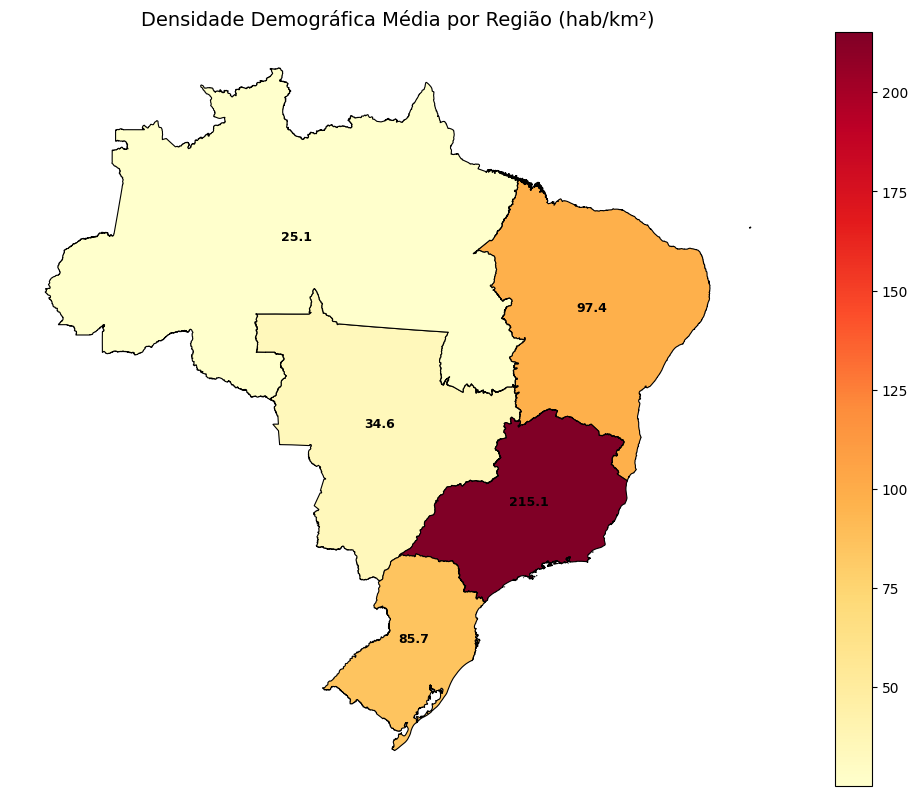

In [10]:
povoamento_por_regiao = df_br.groupby('Regiao')['povoamento'].mean().reset_index()
estados = gpd.read_file('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson')

regioes = {
    'Norte': ['Acre', 'Amapá', 'Amazonas', 'Pará', 'Rondônia', 'Roraima', 'Tocantins'],
    'Nordeste': ['Alagoas', 'Bahia', 'Ceará', 'Maranhão', 'Paraíba', 'Pernambuco', 'Piauí', 'Rio Grande do Norte', 'Sergipe'],
    'Centro-Oeste': ['Distrito Federal', 'Goiás', 'Mato Grosso', 'Mato Grosso do Sul'],
    'Sudeste': ['Espírito Santo', 'Minas Gerais', 'Rio de Janeiro', 'São Paulo'],
    'Sul': ['Paraná', 'Rio Grande do Sul', 'Santa Catarina']
}

def estado_para_regiao(nome_estado):
    for regiao, lista_estados in regioes.items():
        if nome_estado in lista_estados:
            return regiao
    return None

estados['Regiao'] = estados['name'].apply(estado_para_regiao)

regioes_geo = estados.dissolve(by='Regiao', as_index=False)

regioes_geo = regioes_geo.merge(povoamento_por_regiao, on='Regiao')

fig, ax = plt.subplots(figsize=(10, 8))
regioes_geo.plot(column='povoamento', cmap='YlOrRd', edgecolor='black', linewidth=0.8, legend=True, ax=ax)

for idx, row in regioes_geo.iterrows():
    plt.annotate(
        text=f"{row['povoamento']:.1f}",
        xy=row['geometry'].centroid.coords[0],
        ha='center',
        fontsize=9,
        weight='bold'
    )

plt.title('Densidade Demográfica Média por Região (hab/km²)', fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

É possível observar que regiões como Sudeste e Sul apresentam maior concentração populacional, enquanto Norte e Centro-Oeste têm menor densidade, refletindo diferenças no processo de ocupação do território.

###2. População vs QtEmpresas (por ano)
<p> Evidencia a concentração e distribuição da quantidade de empresas e a população de cada município com o passar dos anos (2016 - 2021), mostrando a quantidade de cidades estão presentes em cada par Quantidade de Empresas X População.

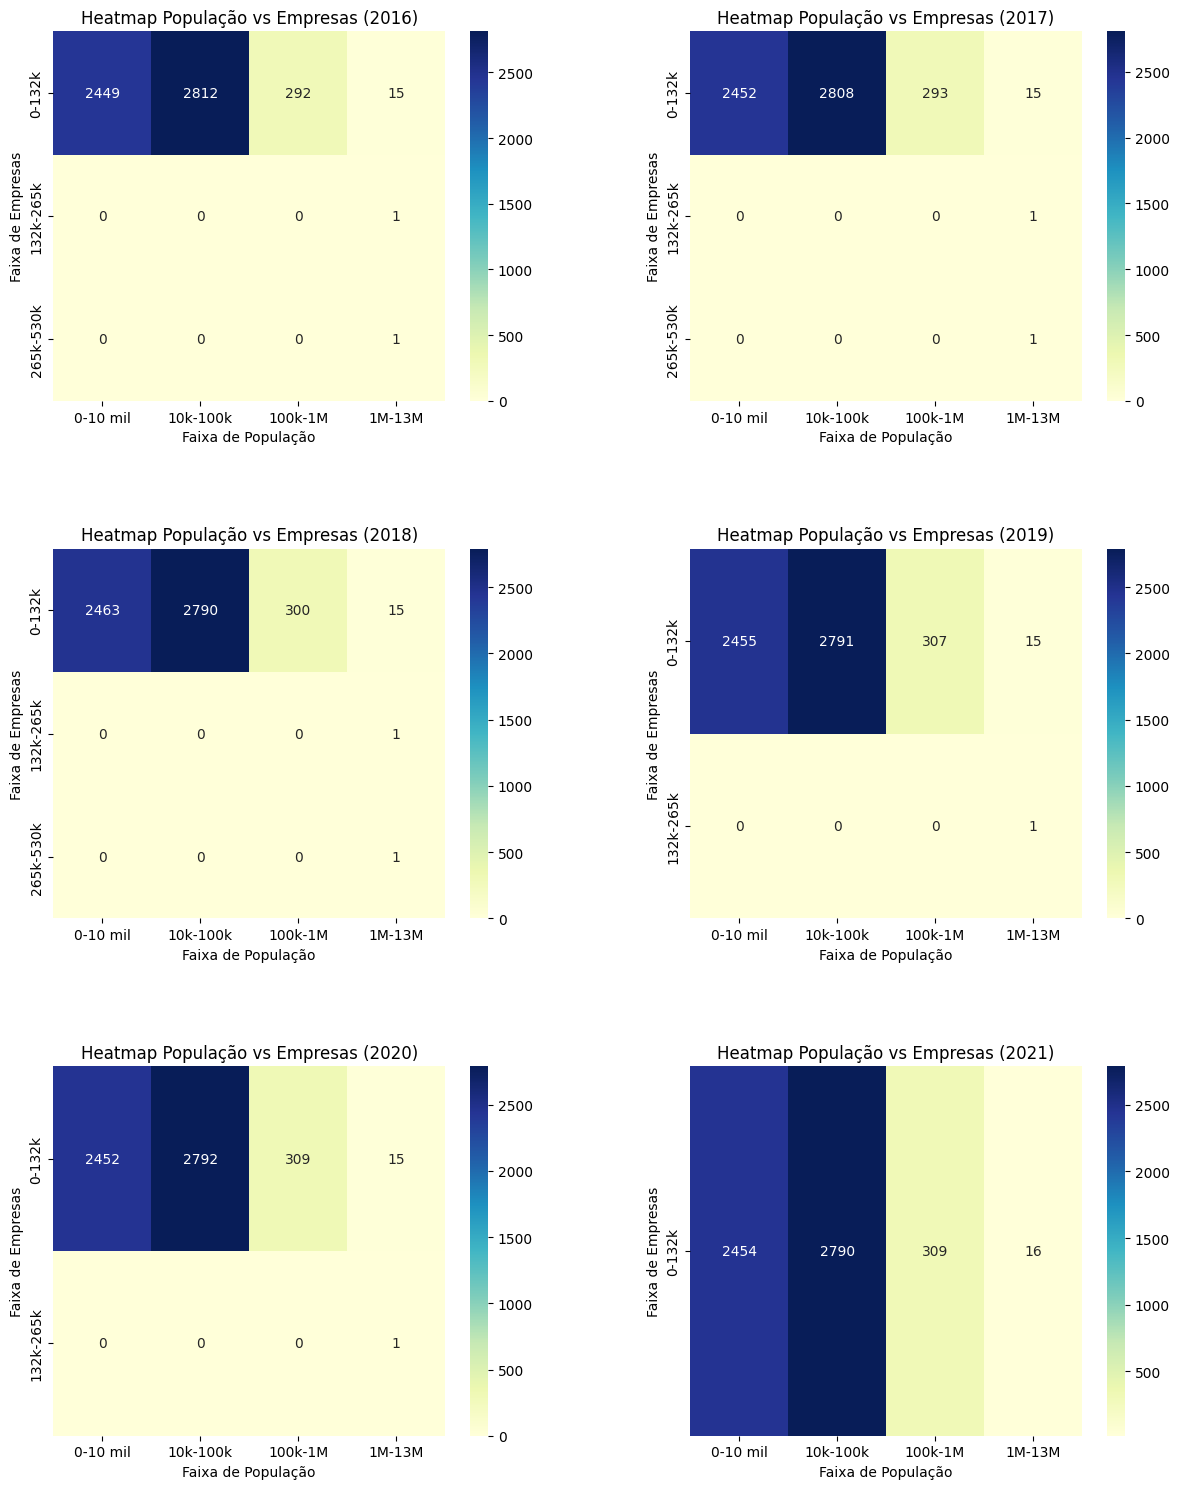

In [16]:
palette_regioes = {
    'Norte': '#1f77b4',       # azul
    'Nordeste': '#ff7f0e',    # laranja
    'Centro-Oeste': '#2ca02c',# verde
    'Sudeste': '#d62728',     # vermelho
    'Sul': '#9467bd'          # roxo
}
anos = sorted(df_br['Ano'].unique())

# Definir faixas de população
bins_pop = [0, 10000, 100000, 1000000, 13000000]
labels_pop = ['0-10 mil', '10k-100k', '100k-1M', '1M-13M']

# Definir faixas de quantidade de empresas
bins_emp = [0, 132611, 265223, 530446]
labels_emp = ['0-132k', '132k-265k', '265k-530k']

n_cols = 2
n_rows = math.ceil(len(anos) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))

# Se axes for 1D, transformar em 2D
axes = axes.reshape(n_rows, n_cols)

for idx, ano in enumerate(anos):
    row = idx // n_cols
    col = idx % n_cols

    ax = axes[row, col]

    df_ano = df_br[df_br['Ano'] == ano].copy()

    df_ano['Faixa_Pop'] = pd.cut(df_ano['Populacao'], bins=bins_pop, labels=labels_pop, include_lowest=True)
    df_ano['Faixa_Emp'] = pd.cut(df_ano['QtEmpresas'], bins=bins_emp, labels=labels_emp, include_lowest=True)

    heatmap_data = pd.crosstab(df_ano['Faixa_Emp'], df_ano['Faixa_Pop'])

    sns.heatmap(
        heatmap_data,
        annot=True,
        fmt='d',
        cmap='YlGnBu',
        ax=ax
    )

    ax.set_title(f'Heatmap População vs Empresas ({ano})')
    ax.set_xlabel('Faixa de População')
    ax.set_ylabel('Faixa de Empresas')

# Remover plots vazios se houver
total_plots = n_rows * n_cols
if total_plots > len(anos):
    for idx in range(len(anos), total_plots):
        row = idx // n_cols
        col = idx % n_cols
        fig.delaxes(axes[row, col])

plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()


<p> É possível notar a sutil diferença entre cada um dos anos, indicando que mesmo que pouco, as cidades apresentaram um comportamento diferente nesse quesito.

###3. PIB médio por Região ao longo dos anos
<p> Relaciona a média do PIB das cinco regiões brasileiras ao longo dos anos (2016 - 2020)

Não há valores para o PIB de 2021, então removemos o ano do gráfico.

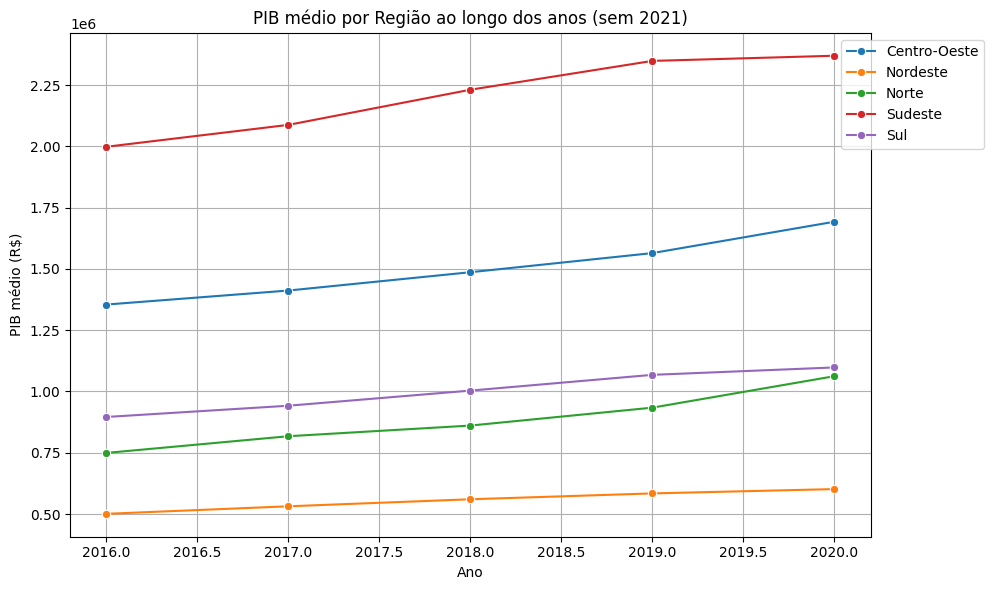

In [17]:
plt.figure(figsize=(10,6))
pib_por_regiao = df_br.groupby(['Ano', 'Regiao'])['PIB'].mean().reset_index()
pib_por_regiao = pib_por_regiao[pib_por_regiao['Ano'] != 2021]
sns.lineplot(data=pib_por_regiao, x='Ano', y='PIB', hue='Regiao', marker='o')
plt.title('PIB médio por Região ao longo dos anos (sem 2021)')
plt.ylabel('PIB médio (R$)')
plt.xlabel('Ano')
plt.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0))
plt.tight_layout()
plt.show()

###4. Relação entre Salários e Pessoal Assalariado
<p> Evidencia a concentração e distribuição da faixa salarial e a população assalariada de cada município com o passar dos anos (2016 - 2021), mostrando a quantidade de cidades estão presentes em cada par Valores de Salários X População Assalariada.
<p> É possível notar a sutil diferença entre cada um dos anos, indicando que mesmo que pouco, as cidades apresentaram um comportamento diferente nesse quesito.

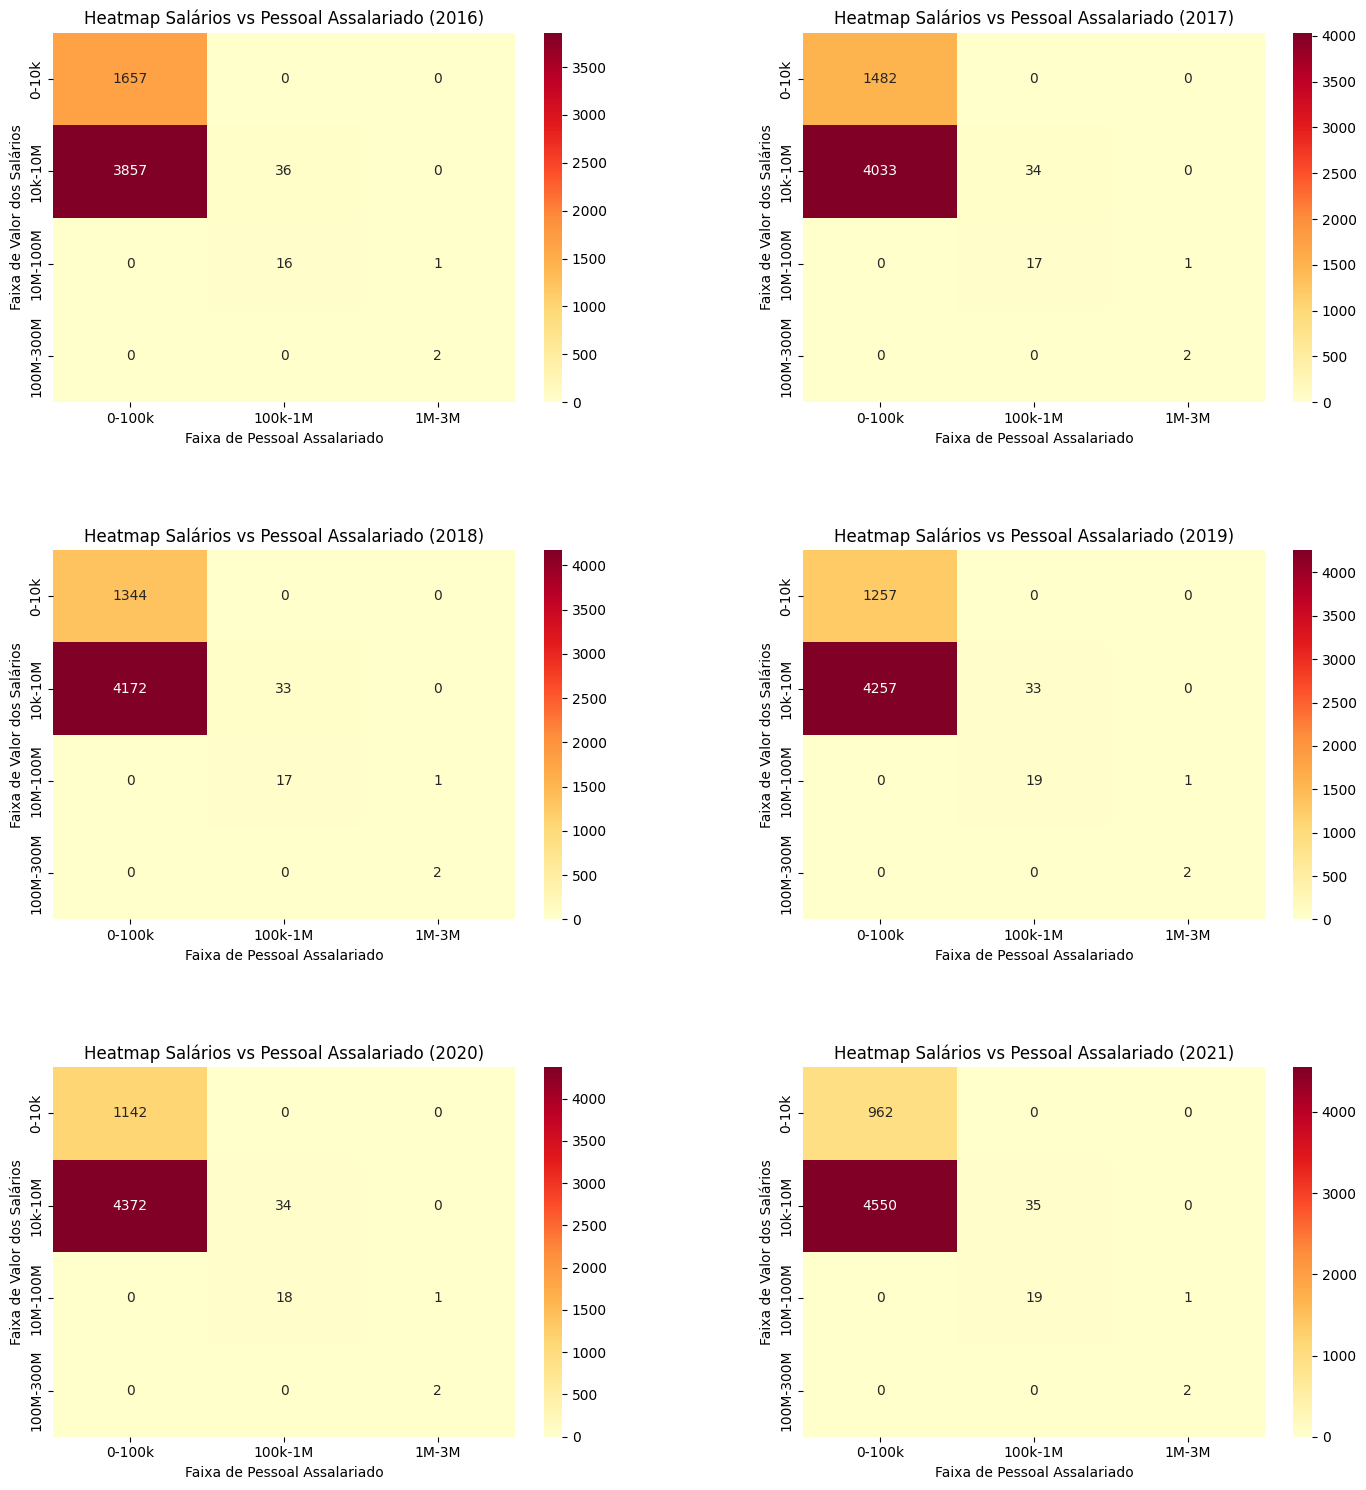

In [19]:
palette_regioes = {
    'Norte': '#1f77b4',       # azul
    'Nordeste': '#ff7f0e',    # laranja
    'Centro-Oeste': '#2ca02c',# verde
    'Sudeste': '#d62728',     # vermelho
    'Sul': '#9467bd'          # roxo
}

# Definir faixas de Pessoal Assalariado
bins_assalariado = [0, 100_000, 1_000_000, 3_000_000, 6_000_000]
labels_assalariado = ['0-100k', '100k-1M', '1M-3M', '3M-6M']

# Definir faixas de Valor dos Salários
bins_salarios = [0, 10_000, 10_000_000, 100_000_000, 300_000_000]
labels_salarios = ['0-10k', '10k-10M', '10M-100M', '100M-300M']

# Preparar subplot com 2 colunas e N linhas
n_anos = len(anos)
n_cols = 2
n_rows = (n_anos + 1) // 2  # arredonda pra cima

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 5))

axes = axes.flatten()

for idx, ano in enumerate(anos):
    ax = axes[idx]

    df_ano = df_br[df_br['Ano'] == ano].copy()

    df_ano['Faixa_Assalariado'] = pd.cut(
        df_ano['PessoalAssalariado'],
        bins=bins_assalariado,
        labels=labels_assalariado,
        include_lowest=True
    )

    df_ano['Faixa_Salarios'] = pd.cut(
        df_ano['VrSalarios'],
        bins=bins_salarios,
        labels=labels_salarios,
        include_lowest=True
    )

    heatmap_data = pd.crosstab(
        df_ano['Faixa_Salarios'],
        df_ano['Faixa_Assalariado']
    )

    sns.heatmap(
        heatmap_data,
        annot=True,
        fmt='d',
        cmap='YlOrRd',
        ax=ax
    )

    ax.set_title(f'Heatmap Salários vs Pessoal Assalariado ({ano})')
    ax.set_xlabel('Faixa de Pessoal Assalariado')
    ax.set_ylabel('Faixa de Valor dos Salários')

# Esconde os gráficos vazios se o número de anos for ímpar
for j in range(idx + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Espaçamento entre os gráficos
plt.show()

 ### 5. Área Plantada vs. Área Colhida
 <p> Evidencia a concentração e distribuição da área plantada e a colhida de cada município com o passar dos anos (2016 - 2021), mostrando a quantidade de cidades estão presentes em cada par Área Plantada X Área Colhida.
 <p> É possível notar a sutil diferença entre cada um dos anos, indicando que mesmo que pouco, as cidades apresentaram um comportamento diferente nesse quesito.

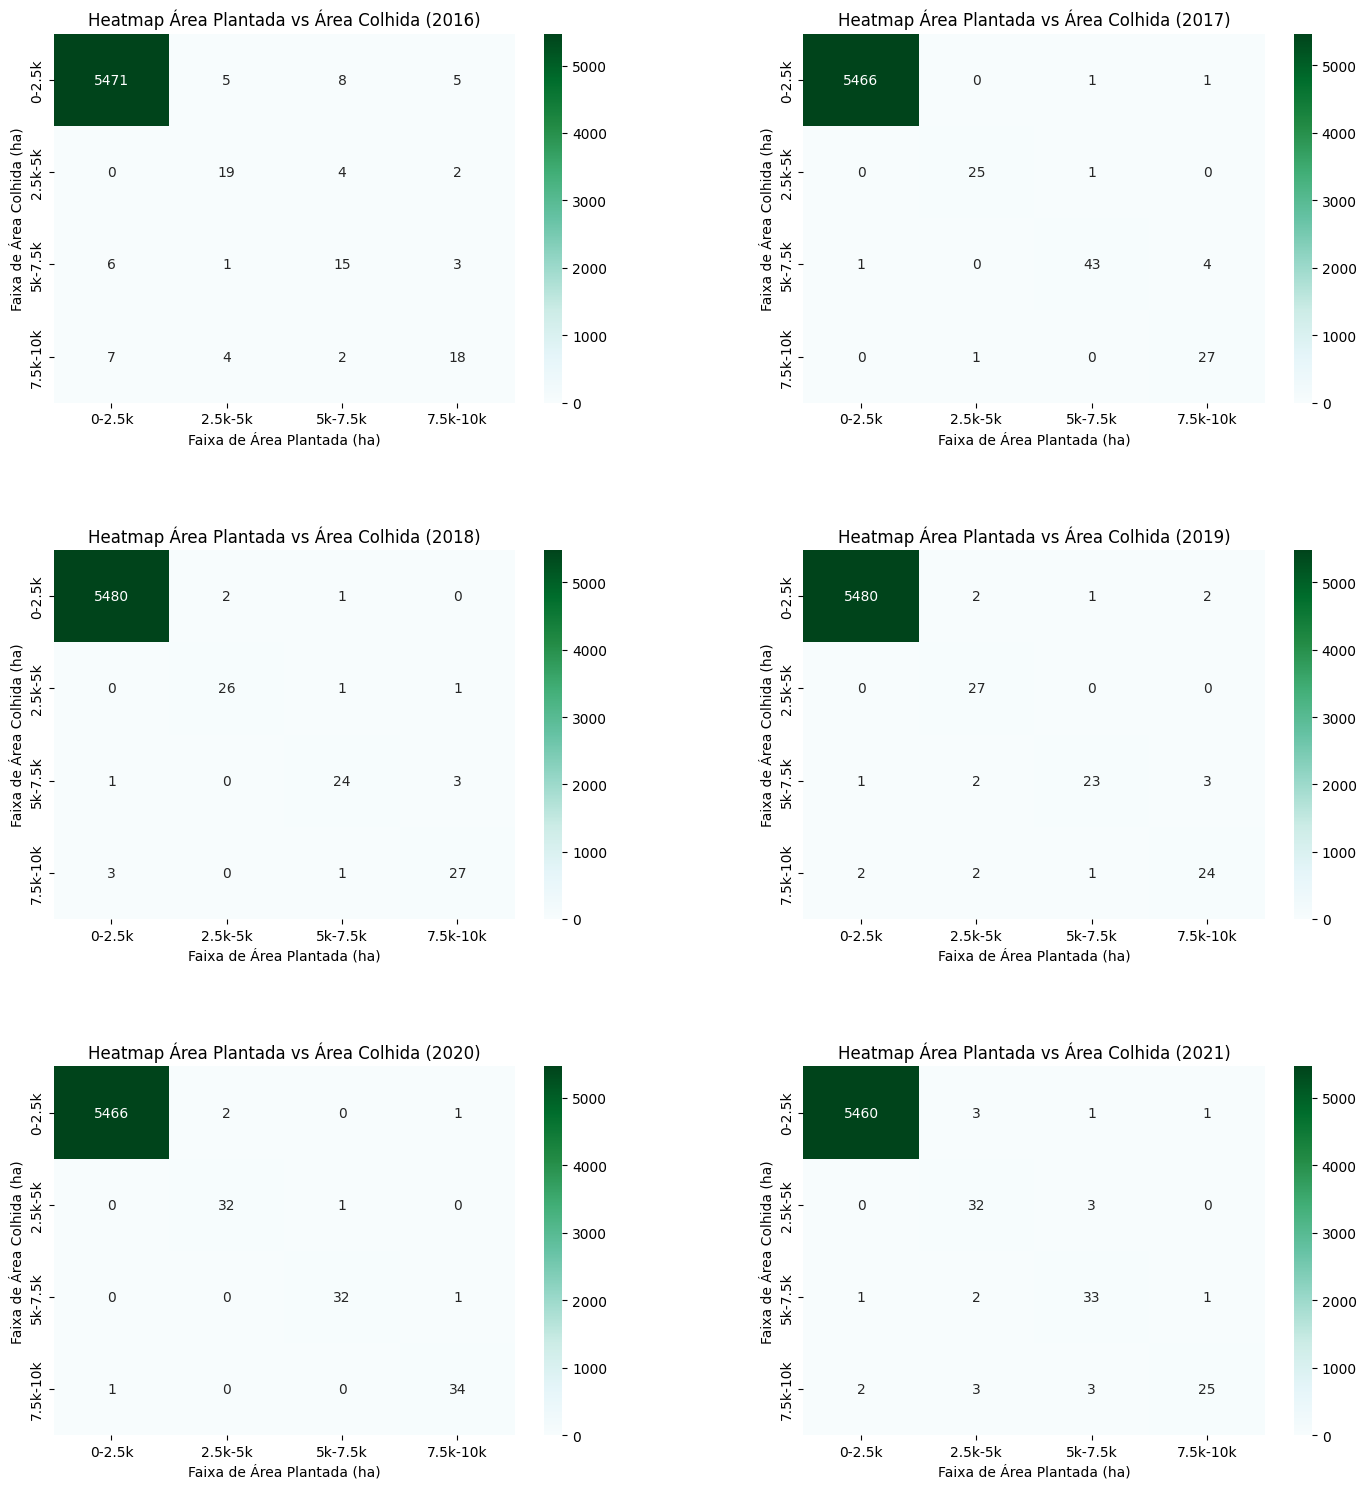

In [20]:
palette_regioes = {
    'Norte': '#1f77b4',       # azul
    'Nordeste': '#ff7f0e',    # laranja
    'Centro-Oeste': '#2ca02c',# verde
    'Sudeste': '#d62728',     # vermelho
    'Sul': '#9467bd'          # roxo
}
# Definir faixas para Área Plantada
bins_plantada = [0, 2500, 5000, 7500, 10000]
labels_plantada = ['0-2.5k', '2.5k-5k', '5k-7.5k', '7.5k-10k']

# Definir faixas para Área Colhida
bins_colhida = [0, 2500, 5000, 7500, 10000]
labels_colhida = ['0-2.5k', '2.5k-5k', '5k-7.5k', '7.5k-10k']

# Configuração dos subplots
n_anos = len(anos)
n_cols = 2
n_rows = (n_anos + 1) // 2  # arredonda pra cima

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 5))

axes = axes.flatten()

for idx, ano in enumerate(anos):
    ax = axes[idx]

    df_ano = df_br[df_br['Ano'] == ano].copy()

    # Categorizar os dados nas faixas
    df_ano['Faixa_Plantada'] = pd.cut(
        df_ano['AreaPlantada_h'],
        bins=bins_plantada,
        labels=labels_plantada,
        include_lowest=True
    )

    df_ano['Faixa_Colhida'] = pd.cut(
        df_ano['AreaColhida_h'],
        bins=bins_colhida,
        labels=labels_colhida,
        include_lowest=True
    )

    # Gerar tabela cruzada
    heatmap_data = pd.crosstab(
        df_ano['Faixa_Colhida'],
        df_ano['Faixa_Plantada']
    )

    # Plotar heatmap
    sns.heatmap(
        heatmap_data,
        annot=True,
        fmt='d',
        cmap='BuGn',
        ax=ax
    )

    ax.set_title(f'Heatmap Área Plantada vs Área Colhida ({ano})')
    ax.set_xlabel('Faixa de Área Plantada (ha)')
    ax.set_ylabel('Faixa de Área Colhida (ha)')

# Esconde gráficos vazios (se houver)
for j in range(idx + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Espaçamento entre linhas e colunas
plt.show()

###6. Produção Agrícola vs. Pecuária
<p> Evidencia a concentração e distribuição da produção pecuária e a produção agrícola de cada município com o passar dos anos (2016 - 2021), mostrando a quantidade de cidades estão presentes em cada par Produção Pecuária X Produção Agrícola.
<p> É possível notar a sutil diferença entre cada um dos anos, indicando que mesmo que pouco, as cidades apresentaram um comportamento diferente nesse quesito.

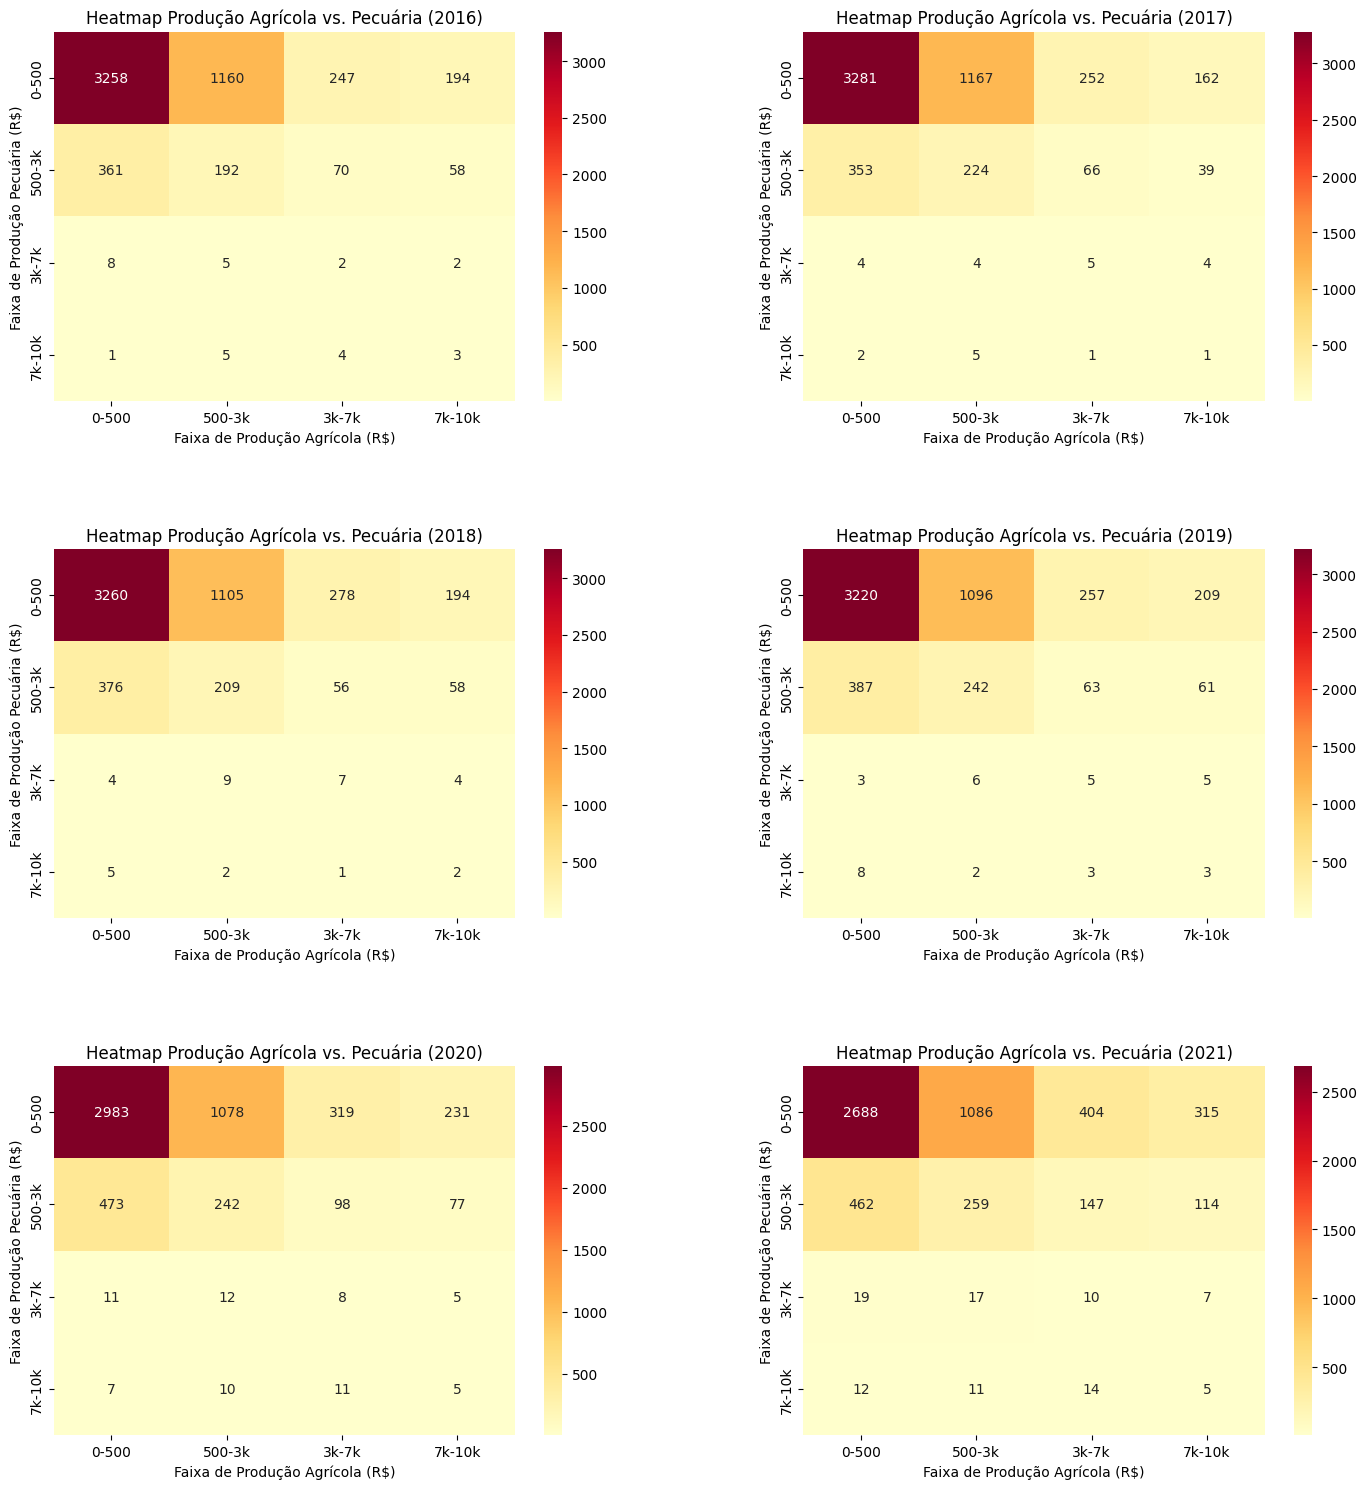

In [21]:
palette_regioes = {
    'Norte': '#1f77b4',       # azul
    'Nordeste': '#ff7f0e',    # laranja
    'Centro-Oeste': '#2ca02c',# verde
    'Sudeste': '#d62728',     # vermelho
    'Sul': '#9467bd'          # roxo
}
# Definir faixas para Produção Agrícola
bins_agricola = [0, 500, 3000, 7000, 10000]
labels_agricola = ['0-500', '500-3k', '3k-7k', '7k-10k']

# Definir faixas para Produção Pecuária
bins_pecuaria = [0, 500, 3000, 7000, 10000]
labels_pecuaria = ['0-500', '500-3k', '3k-7k', '7k-10k']

# Configuração dos subplots
n_anos = len(anos)
n_cols = 2
n_rows = (n_anos + 1) // 2  # arredonda pra cima

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 5))
axes = axes.flatten()

for idx, ano in enumerate(anos):
    ax = axes[idx]

    df_ano = df_br[df_br['Ano'] == ano].copy()

    # Categorizar os dados nas faixas
    df_ano['Faixa_Agricola'] = pd.cut(
        df_ano['VlProducaoAgricola'],
        bins=bins_agricola,
        labels=labels_agricola,
        include_lowest=True
    )

    df_ano['Faixa_Pecuaria'] = pd.cut(
        df_ano['VlProducaoPecuaria'],
        bins=bins_pecuaria,
        labels=labels_pecuaria,
        include_lowest=True
    )

    # Gerar tabela cruzada
    heatmap_data = pd.crosstab(
        df_ano['Faixa_Pecuaria'],
        df_ano['Faixa_Agricola']
    )

    # Plotar heatmap
    sns.heatmap(
        heatmap_data,
        annot=True,
        fmt='d',
        cmap='YlOrRd',
        ax=ax
    )

    ax.set_title(f'Heatmap Produção Agrícola vs. Pecuária ({ano})')
    ax.set_xlabel('Faixa de Produção Agrícola (R$)')
    ax.set_ylabel('Faixa de Produção Pecuária (R$)')

# Esconde gráficos vazios (se houver)
for j in range(idx + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

###7. Exportações e Importações por Região (média anual)
<p> Faz uma média das importações e importações anuais para cada uma das cinco regiões do país.

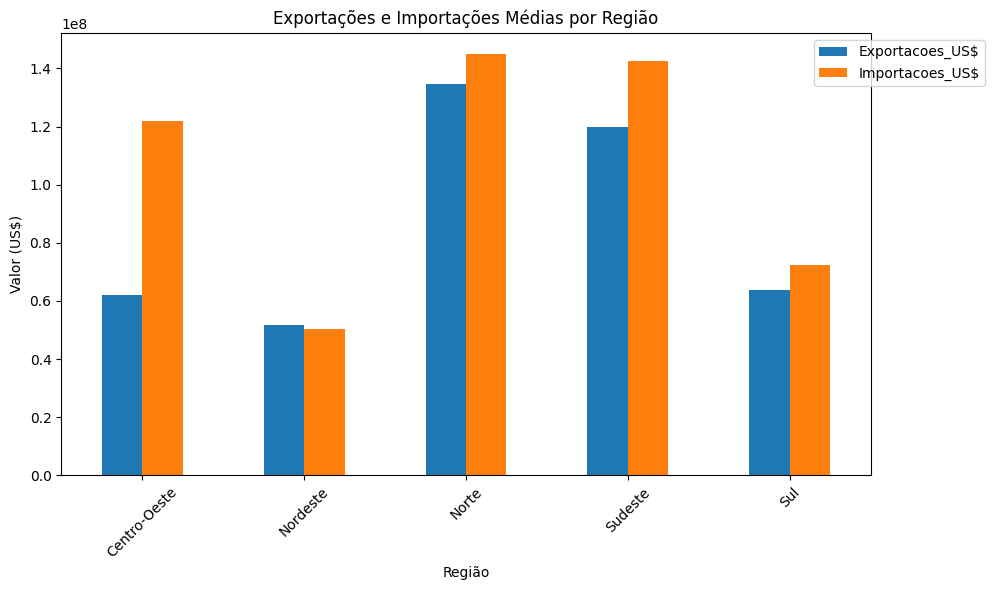

In [22]:
exp_imp = df_br.groupby('Regiao')[['Exportacoes_US$', 'Importacoes_US$']].mean().reset_index()
exp_imp.plot(x='Regiao', kind='bar', figsize=(10,6))
plt.title('Exportações e Importações Médias por Região')
plt.ylabel('Valor (US$)')
plt.xlabel('Região')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###8. Nascimentos vs. Óbitos Infantis
<p> Evidencia a concentração e distribuição do número de óbitos infantis e a taxa de natalidade de cada município com o passar dos anos (2016 - 2021), mostrando a quantidade de cidades estão presentes em cada par Óbitos Infantis X Natalidade.
<p> É possível notar a sutil diferença entre cada um dos anos, indicando que mesmo que pouco, os municípios apresentaram um comportamento diferente nesse quesito.

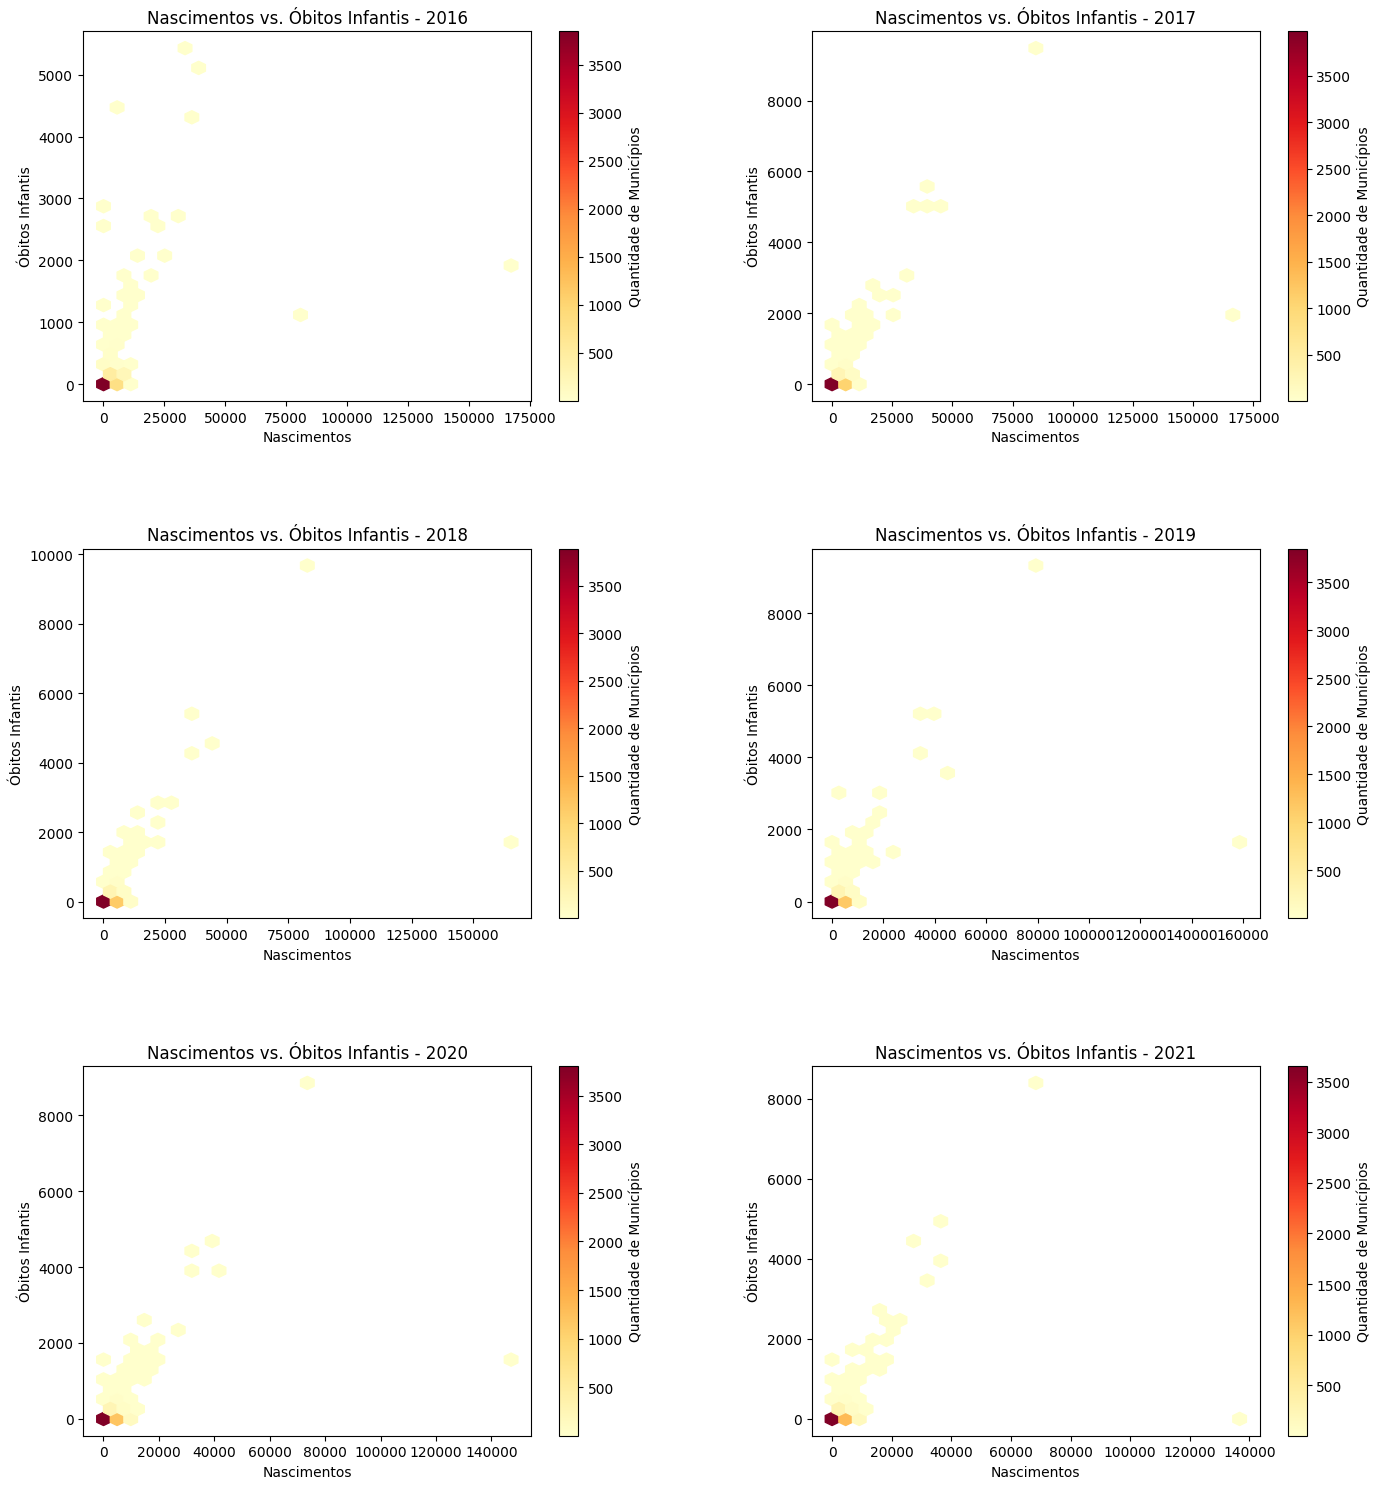

In [23]:
palette_regioes = {
    'Norte': '#1f77b4',       # azul
    'Nordeste': '#ff7f0e',    # laranja
    'Centro-Oeste': '#2ca02c',# verde
    'Sudeste': '#d62728',     # vermelho
    'Sul': '#9467bd'          # roxo
}
anos = sorted(df_br['Ano'].unique())

# Configuração dos subplots
n_anos = len(anos)
n_cols = 2
n_rows = (n_anos + 1) // 2  # arredonda pra cima

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 5))
axes = axes.flatten()

for idx, ano in enumerate(anos):
    ax = axes[idx]
    df_ano = df_br[df_br['Ano'] == ano]

    hb = ax.hexbin(
        x=df_ano['NrNascimentos'],
        y=df_ano['NrObitosInfantis'],
        gridsize=30,
        cmap='YlOrRd',
        mincnt=1
    )

    ax.set_title(f'Nascimentos vs. Óbitos Infantis - {ano}')
    ax.set_xlabel('Nascimentos')
    ax.set_ylabel('Óbitos Infantis')

    cb = fig.colorbar(hb, ax=ax)
    cb.set_label('Quantidade de Municípios')

# Esconde gráficos vazios (se sobrar espaço na grid)
for j in range(idx + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()



##Dados relacionados à pandemia do Covid-19 - BrStats

###1. Queda no número de empresas
Objetivo: Ver se houve redução no número de empresas ativas.

Gráfico de linha com o eixo X sendo o ano e Y sendo a QtEmpresas.

Uma linha para cada região.

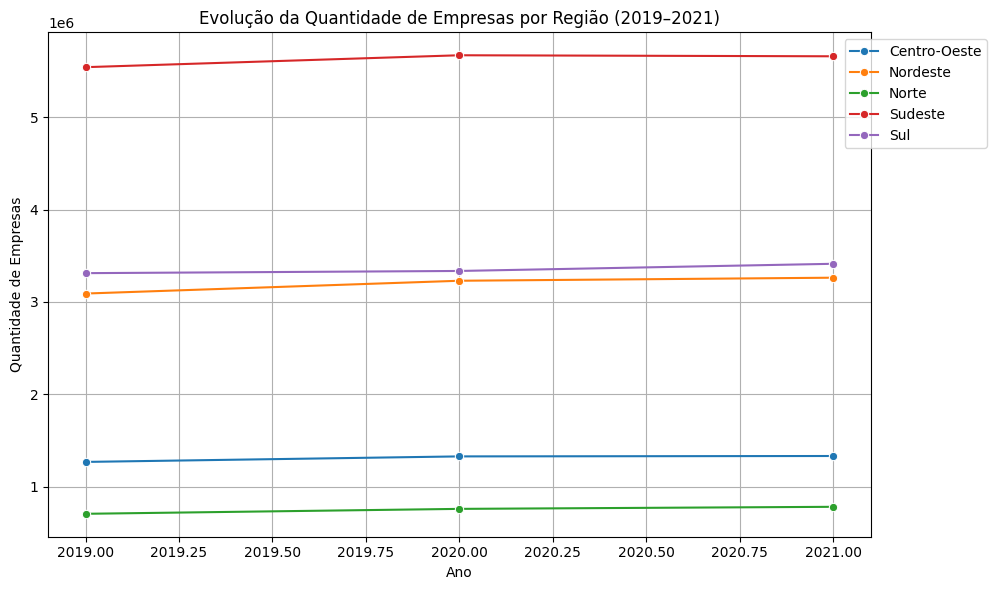

In [24]:
df_emp = df_br[df_br['Ano'].between(2019, 2021)]
df_group = df_emp.groupby(['Ano', 'Regiao'])['QtEmpresas'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_group, x='Ano', y='QtEmpresas', hue='Regiao', marker='o')
plt.title('Evolução da Quantidade de Empresas por Região (2019–2021)')
plt.ylabel('Quantidade de Empresas')
plt.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0))
plt.tight_layout()
plt.show()

###2. PIB por região ao longo dos anos
Objetivo: Analisar o impacto direto no Produto Interno Bruto.

Gráfico de linha do PIB por região, 2019–2020.

Não há valores para o PIB no ano de 2021, então removemos o ano do gráfico.


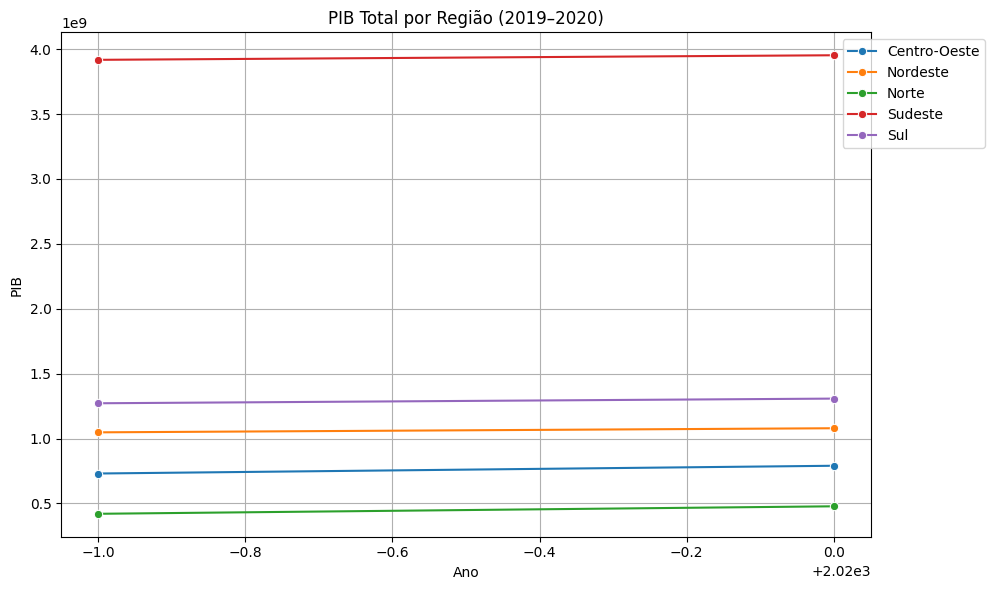

In [25]:
df_pib = df_br[df_br['Ano'].between(2019, 2021)]
df_group = df_pib.groupby(['Ano', 'Regiao'])['PIB'].sum().reset_index()
df_group = df_group[df_group['Ano'] != 2021]
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_group, x='Ano', y='PIB', hue='Regiao', marker='o')
plt.title('PIB Total por Região (2019–2020)')
plt.ylabel('PIB')
plt.xlabel('Ano')
plt.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0))
plt.tight_layout()
plt.show()

###3. Impacto no emprego
Objetivo: Ver efeitos no mercado de trabalho.

Gráfico de barras para:

*   PessoalOcupado
*   PessoalAssalariado

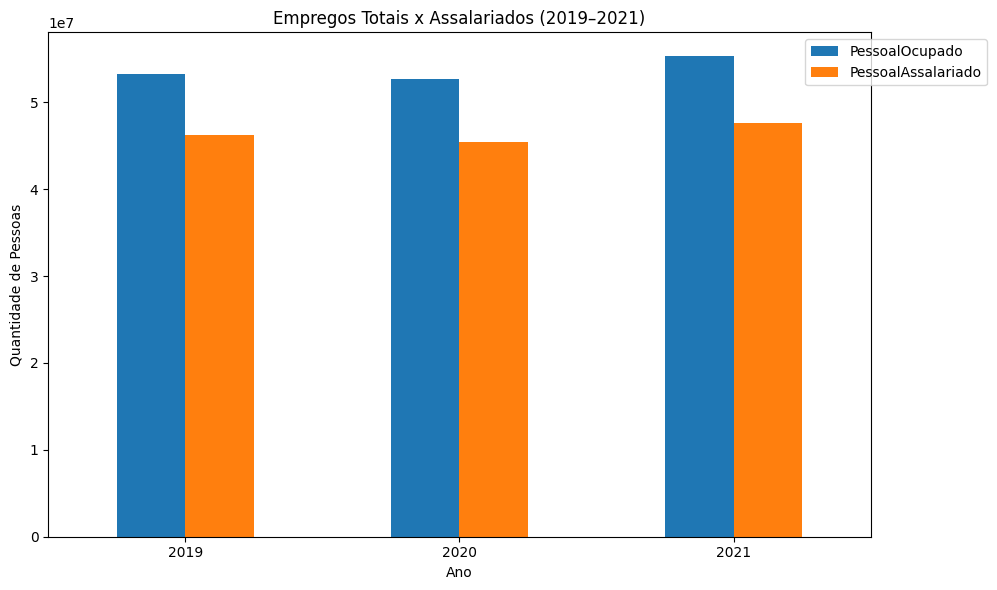

In [26]:
df_job = df_br[df_br['Ano'].between(2019, 2021)]
df_group = df_job.groupby('Ano')[['PessoalOcupado', 'PessoalAssalariado']].sum().reset_index()
df_group.plot(x='Ano', kind='bar', figsize=(10, 6))
plt.title('Empregos Totais x Assalariados (2019–2021)')
plt.ylabel('Quantidade de Pessoas')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

###4. Nascimentos e Óbitos Infantis
Objetivo: Investigar impacto demográfico e no sistema de saúde.

Gráfico de linha para NrNascimentos e NrObitosInfantis por ano e região.

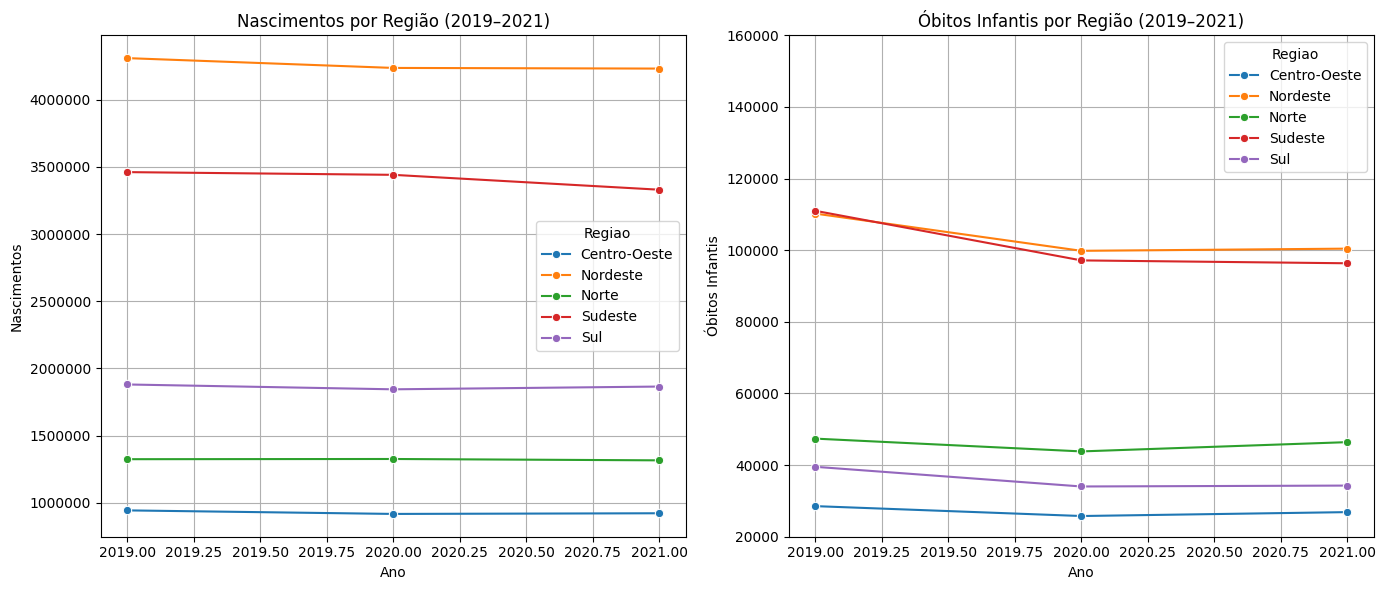

In [27]:
from matplotlib.ticker import FuncFormatter
def normal_notation(x, pos):
    return f'{x:.0f}'
df_nasc = df_br[df_br['Ano'].between(2019, 2021)]
df_group = df_nasc.groupby(['Ano', 'Regiao'])[['NrNascimentos', 'NrObitosInfantis']].sum().reset_index()
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.lineplot(data=df_group, x='Ano', y='NrNascimentos', hue='Regiao', marker='o')
plt.title('Nascimentos por Região (2019–2021)')
plt.ylabel('Nascimentos')
plt.xlabel('Ano')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(FuncFormatter(normal_notation))
plt.subplot(1, 2, 2)
sns.lineplot(data=df_group, x='Ano', y='NrObitosInfantis', hue='Regiao', marker='o')
plt.title('Óbitos Infantis por Região (2019–2021)')
plt.ylabel('Óbitos Infantis')
plt.xlabel('Ano')
plt.grid(True)
plt.ylim(20000, 160000)
plt.gca().yaxis.set_major_formatter(FuncFormatter(normal_notation))
plt.tight_layout()
plt.show()

###5. Scatterplots comparando antes e depois de PIB vs QtEmpresas para 2019 vs 2020
Objetivo: Avaliar mudanças em relações econômicas para todos os municípios de todas as regiões.
<p> É possível notar a sutil diferença entre cada um dos anos, indicando que mesmo que pouco, as regiões apresentaram um comportamento diferente nesse quesito.

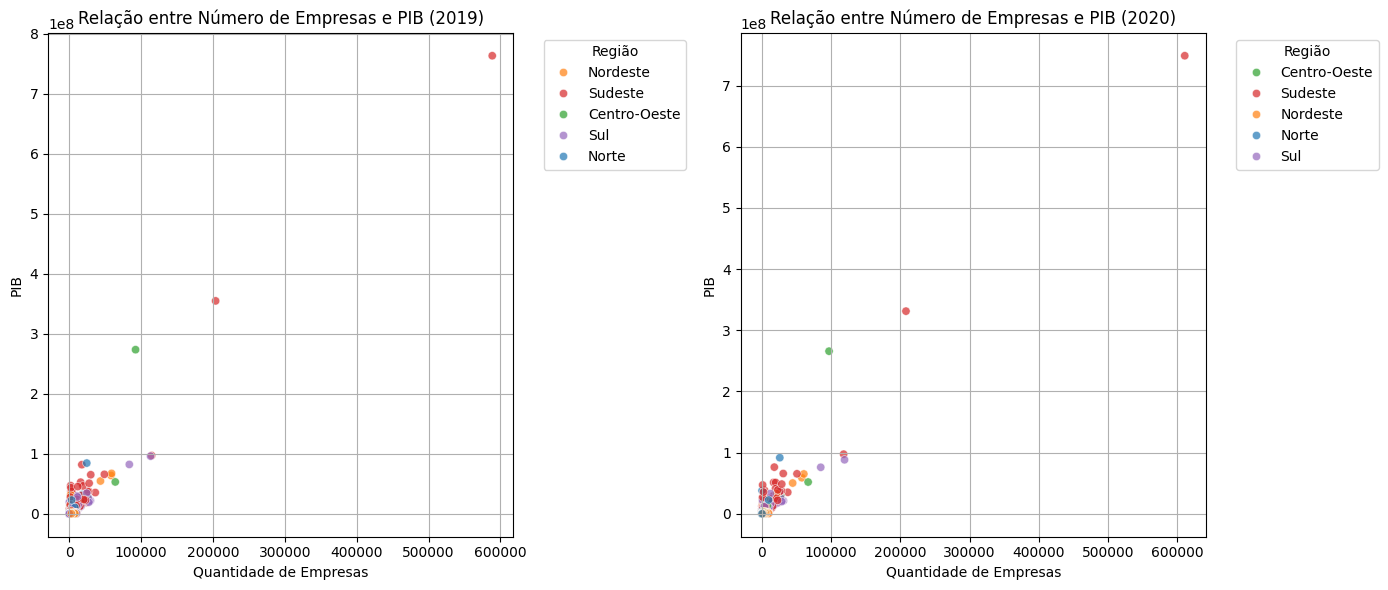

In [28]:
palette_regioes = {
    'Norte': '#1f77b4',       # azul
    'Nordeste': '#ff7f0e',    # laranja
    'Centro-Oeste': '#2ca02c',# verde
    'Sudeste': '#d62728',     # vermelho
    'Sul': '#9467bd'          # roxo
}
df_filtered = df_br[df_br['Ano'].isin([2019, 2020])]

plt.figure(figsize=(14, 6))

# Gráfico para 2019
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_filtered[df_filtered['Ano'] == 2019], x='QtEmpresas', y='PIB', hue='Regiao',
                palette=palette_regioes, alpha=0.7)
plt.title('Relação entre Número de Empresas e PIB (2019)')
plt.xlabel('Quantidade de Empresas')
plt.ylabel('PIB')
plt.grid(True)
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')

# Gráfico para 2020
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_filtered[df_filtered['Ano'] == 2020], x='QtEmpresas', y='PIB', hue='Regiao',
                palette=palette_regioes, alpha=0.7)
plt.title('Relação entre Número de Empresas e PIB (2020)')
plt.xlabel('Quantidade de Empresas')
plt.ylabel('PIB')
plt.grid(True)
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

###6. Boxplot da razão entre Receita e Transferência
Objetivo: Identificar autossuficiência fiscal antes e durante a pandemia.

Razão: Receitas_R$ / (Transferencias_correntes_R$ + Transferencias_capital_R$)

Boxplot por região, em 2019 vs 2020/2021

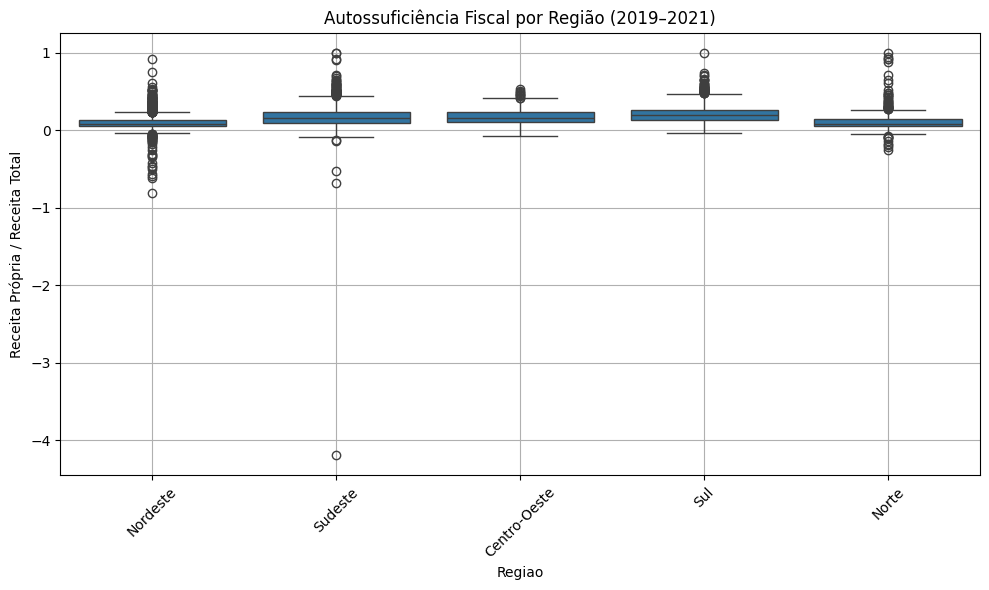

In [29]:
df_ratio = df_br.copy()
df_ratio['ReceitaPropria'] = df_ratio['Receitas_R$'] - df_ratio['Transferencias_correntes_R$'] - df_ratio['Transferencias_capital_R$']
df_ratio = df_ratio[df_ratio['Ano'].between(2019, 2021)]
df_ratio['Razao'] = df_ratio['ReceitaPropria'] / (df_ratio['Receitas_R$'] + 1)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_ratio, x='Regiao', y='Razao')
plt.title('Autossuficiência Fiscal por Região (2019–2021)')
plt.ylabel('Receita Própria / Receita Total')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Importação dos Dados sobre a COVID-19 - DataSUS

<p>Nessa subseção faremos a importação e também compreenção dos dados que obtivemos sobre a pandemia de COVID 19 que afetou o Brasil e o mundo entre 2020 e 2023.
<p>O primeiro caso da doença no Brasil foi registrada no dia 25 de Fevereiro de 2020, na cidade de São Paulo. Desde então, o Ministério da Saúde realizou o monitoramento diário do avanço da pandemia em terras tupiniquins.
<p>Utilizando por base o Ministério da Saúde, o Brasil.IO e o perfil @coronavirusbra1, este levantamento realizado pelo Departamento de Física da Universidade Federal de Viçosa, liderado pelo Professor Wesley Cota, apresenta dados desde a 9ª até a 311ª semana da pandemia no Brasil.
<p>A seguir faremos a importação desses dados, nomeados como 'casos_2020.csv', 'casos_2021.csv', 'casos_2022.csv' e 'casos_2023.csv'.


In [30]:
df_2020 = pd.read_csv('casos_2020.csv', low_memory=False)
print(f"Casos 2020: {df_2020.shape[0]} linhas, {df_2020.shape[1]} colunas")

Casos 2020: 1314380 linhas, 12 colunas


In [31]:
df_2021 = pd.read_csv('casos_2021.csv', low_memory=False)
print(f"Casos 2021: {df_2021.shape[0]} linhas, {df_2021.shape[1]} colunas")

Casos 2021: 2042733 linhas, 12 colunas


In [32]:
df_2022 = pd.read_csv('casos_2022.csv', low_memory=False)
print(f"Casos 2022: {df_2022.shape[0]} linhas, {df_2022.shape[1]} colunas")

Casos 2022: 2042905 linhas, 12 colunas


In [33]:
df_2023 = pd.read_csv('casos_2023.csv', low_memory=False)
print(f"Casos 2023: {df_2023.shape[0]} linhas, {df_2023.shape[1]} colunas")

Casos 2023: 430969 linhas, 12 colunas


### Descrição dos Dados - casos_2020 a 2023

Como é possível observar pela execução dos trechos de código que antecedem essa subseção, os códigos foram formatados como esperado, não necessitando uma conversão como para o DataSet anterior.

| Coluna                         | Descrição                                                                                                          |
|--------------------------------|--------------------------------------------------------------------------------------------------------------------|
| date                           | Data do registro, no formato YYYY-MM-DD.                                                                           |
| country                        | País dos dados, que é sempre "Brazil".                                                                             |
| state                          | Sigla da unidade federativa (UF) ou "TOTAL" quando se refere ao país inteiro.                                      |
| city                           | Nome completo do município no formato "Cidade/UF". Pode ser "CASO SEM LOCALIZACAO DEFINIDA/UF".                  |
| ibgeID                         | ID único do município fornecido pelo Instituto Brasileiro de Geografia e Estatística (IBGE).                      |
| newDeaths                      | Diferença entre o número de óbitos da data correspondente e o dia anterior.                                        |
| deaths                         | Número acumulado de óbitos até aquela data.                                                                        |
| newCases                       | Diferença entre o número de casos da data correspondente e o dia anterior.                                         |
| totalCases                     | Número acumulado de casos até aquela data.                                                                         |
| deaths_per_100k_inhabitants   | Número de óbitos por 100.000 habitantes naquela localidade.                                                        |
| totalCases_per_100k_inhabitants | Número de casos por 100.000 habitantes naquela localidade.                                                        |
| deaths_by_totalCases           | Proporção entre o número de óbitos e o número total de casos.                                                      |


---
<h2>Resumo dos Dados</h2>
Nessa parte, utilizando-se dos códigos a seguir, podemos ter um resumo dos dados dos datasets relacionados à COVID-19 separados por ano (2020, 2021, 2022 e 2023).

In [34]:
def gerar_resumo(df):
    desc_numericas = df.describe().T
    nulos = df.isnull().sum()
    tipos = df.dtypes
    valores_unicos = df.nunique()

    resumo = pd.DataFrame({
        'Tipo': tipos,
        'Nulos': nulos,
        'Valores únicos': valores_unicos,
        'Mínimo': desc_numericas['min'],
        'Máximo': desc_numericas['max'],
        'Média': desc_numericas['mean'],
        'Mediana': df.median(numeric_only=True)
    })

    resumo = resumo.fillna("-")
    return resumo

In [35]:
resumo_2020 = gerar_resumo(df_2020)
print(resumo_2020.to_markdown())

|                                 | Tipo    |   Nulos |   Valores únicos | Mínimo   | Máximo    | Média               | Mediana   |
|:--------------------------------|:--------|--------:|-----------------:|:---------|:----------|:--------------------|:----------|
| city                            | object  |       0 |             5596 | -        | -         | -                   | -         |
| date                            | object  |       0 |              311 | -        | -         | -                   | -         |
| deaths                          | int64   |       0 |             3102 | 0.0      | 195008.0  | 41.23855201692052   | 2.0       |
| deaths_by_totalCases            | float64 |       0 |              354 | 0.0      | 1.1       | 0.03249711042468694 | 0.016     |
| deaths_per_100k_inhabitants     | float64 |       0 |            56887 | 0.0      | 401.606   | 28.60326229553098   | 17.036    |
| epi_week                        | int64   |       0 |               45 | 9

In [37]:
resumo_2021 = gerar_resumo(df_2021)
print(resumo_2021.to_markdown())

|                                 | Tipo    |   Nulos |   Valores únicos | Mínimo    | Máximo     | Média                | Mediana   |
|:--------------------------------|:--------|--------:|-----------------:|:----------|:-----------|:---------------------|:----------|
| city                            | object  |       0 |             5597 | -         | -          | -                    | -         |
| date                            | object  |       0 |              365 | -         | -          | -                    | -         |
| deaths                          | int64   |       0 |             6570 | 0.0       | 619079.0   | 165.96128324161796   | 15.0      |
| deaths_by_totalCases            | float64 |       0 |              293 | 0.0       | 4.0        | 0.023338368254686253 | 0.02      |
| deaths_per_100k_inhabitants     | float64 |       0 |           128438 | 0.0       | 1739.13    | 161.91651551328536   | 139.424   |
| epi_week                        | int64   |       0 |

In [38]:
resumo_2022 = gerar_resumo(df_2022)
print(resumo_2022.to_markdown())

|                                 | Tipo    |   Nulos |   Valores únicos | Mínimo   | Máximo      | Média               | Mediana   |
|:--------------------------------|:--------|--------:|-----------------:|:---------|:------------|:--------------------|:----------|
| city                            | object  |       0 |             5597 | -        | -           | -                   | -         |
| date                            | object  |       0 |              365 | -        | -           | -                   | -         |
| deaths                          | int64   |       0 |             6571 | 0.0      | 693853.0    | 238.94806464324088  | 24.0      |
| deaths_by_totalCases            | float64 |       0 |              201 | 0.0      | 7.788       | 0.01869697465129314 | 0.016     |
| deaths_per_100k_inhabitants     | float64 |       0 |            45129 | 0.0      | 15608.136   | 244.42852886698105  | 224.581   |
| epi_week                        | int64   |       0 |       

In [39]:
resumo_2023 = gerar_resumo(df_2023)
print(resumo_2023.to_markdown())

|                                 | Tipo    |   Nulos |   Valores únicos | Mínimo    | Máximo      | Média                | Mediana   |
|:--------------------------------|:--------|--------:|-----------------:|:----------|:------------|:---------------------|:----------|
| city                            | object  |       0 |             5597 | -         | -           | -                    | -         |
| date                            | object  |       0 |               77 | -         | -           | -                    | -         |
| deaths                          | int64   |       0 |             1899 | -258.0    | 699310.0    | 249.17804760899276   | 25.0      |
| deaths_by_totalCases            | float64 |       0 |              124 | 0.0       | 0.312       | 0.01697525344050269  | 0.014     |
| deaths_per_100k_inhabitants     | float64 |       0 |             9957 | -0.695    | 31963.338   | 257.23543007965765   | 236.586   |
| epi_week                        | int64   |   

### Criação de Novos Conjuntos de Dados

<p>Visando ter apenas os valores totais da pandemia para cada ano, realizamos uma limpeza dos dados, criando novos conjuntos de dados com estes.
<p>Esses novos DataSets serão utilizados nas análises ao longo do projeto.
<p>Como os dados são cumulativos, o código obtém o maior número relacionado a cada cidade e, em sequência, cria o conjunto 'df_ano_max.csv'.

In [40]:
# Filtragem das cidades não nulas
df_2020 = df_2020[df_2020['city'].notna()]
df_2021 = df_2021[df_2021['city'].notna()]
df_2022 = df_2022[df_2022['city'].notna()]
df_2023 = df_2023[df_2023['city'].notna()]

def process_dataframe(df):
    # Agrupar e obter os máximos
    df_max = df.groupby('city')[['state', 'deaths', 'totalCases']].max().reset_index()

    # Correção do cálculo de deaths_by_totalCases - estava utilizando valores equivocados anteriormente
    df_max['deaths_by_totalCases'] = (df_max['deaths'] / df_max['totalCases']).round(5)

    return df_max

df_2020_max = process_dataframe(df_2020)
df_2021_max = process_dataframe(df_2021)
df_2022_max = process_dataframe(df_2022)
df_2023_max = process_dataframe(df_2023)

df_2020_max.to_csv('df_2020_max.csv', index=False)
df_2021_max.to_csv('df_2021_max.csv', index=False)
df_2022_max.to_csv('df_2022_max.csv', index=False)
df_2023_max.to_csv('df_2023_max.csv', index=False)

Após esse processo, criamos com o código abaixo uma junção de todos esses datasets em um só, contendo as principais informações de maneira ordenada por cidade e ano, de modo a facilitar visualização e futuras análises.

In [41]:
df_2020_max['ano'] = 2020
df_2021_max['ano'] = 2021
df_2022_max['ano'] = 2022
df_2023_max['ano'] = 2023

# Junta todos os DataFrames em um só
df_todos_max = pd.concat([df_2020_max, df_2021_max, df_2022_max, df_2023_max], ignore_index=True)

# Ordena por nome da cidade e ano
df_todos_max = df_todos_max.sort_values(by=['city', 'ano']).reset_index(drop=True)
df_todos_max = df_todos_max[['ano', 'city', 'state', 'deaths', 'totalCases', 'deaths_by_totalCases']]

df_todos_max.to_csv('df_todos_max.csv', index=False)

## Perguntas


<p>Nessa seção apresentaremos algumas perguntas que foram elaboradas pelo grupo e serão analisadas no decorrer do Projeto.
<p>Como explicitado na introdução, algumas dessas perguntas tentarão responder e encontrar uma correlação entre as características das cidades e o impacto que a pandemia de COVID-19 gerou nestas.
<p>Além das perguntas voltadas a esta temática, algumas outras serão apresentadas, buscando entender o cenário do Brasil, como alguns aspectos econômicos, por exemplo. Isto poderá ser útil para entender, mais ao final do projeto, como foi o impacto da pandemia na país.


1.   Quais cidades registraram os maiores números absolutos de óbitos infantis e as maiores razões de óbito/nascimento infantil durante a pandemia (2020-2021)?

2.   Qual foi a variação no número total de empresas entre o período pré-pandemia (2018-2019) e o período pandêmico (2020-2021)? Que conclusões podemos extrair dessa análise?

3.   Qual a soma dos maiores valores de produção agrícola por cidade no período pré-pandêmico (2016-2019) comparado ao período pandêmico (2020-2021)?

4.  Como o crescimento do PIB dos municípios brasileiros entre 2018 e 2019 se comportou em relação a 2019 e 2020, início do período pandêmico?

5.   Existe correlação entre receitas municipais e indicadores de qualidade de vida, como mortalidade infantil?

6.   Há relação direta entre área plantada/colhida e valor total da produção agrícola?

7.   Municípios com maior volume de exportações apresentam melhores indicadores econômicos?

8.   Qual foi o impacto da pandemia nos fluxos de importação e exportação por região?

<h3>Observação sobre as Perguntas:</h3>
No decorrer do projeto, algumas novas perguntas foram surgindo e, desse modo, algumas que anteriormente estavam listadas acima foram removidas. Todas as que permaceram acima estão sendo respondidas no capítulo seguinte.

<h3>Outras Perguntas:</h3>
Nos capítulos seguintes, referentes à Terceira, Quarta e, futuramente, Quinta Entrega estão listadas algumas perguntas que serão respondidas especificamente buscando utilzar os conhecimentos adquiridos sobre Associação de Dados, Regressão Linear e Aprendizado Supervisionado.

##Resolução das Perguntas Levantadas no Capítulo Anterior

###Pergunta 01
Quais cidades registraram os maiores números absolutos de óbitos infantis e as maiores razões de óbito/nascimento infantil durante a pandemia (2020-2021)?

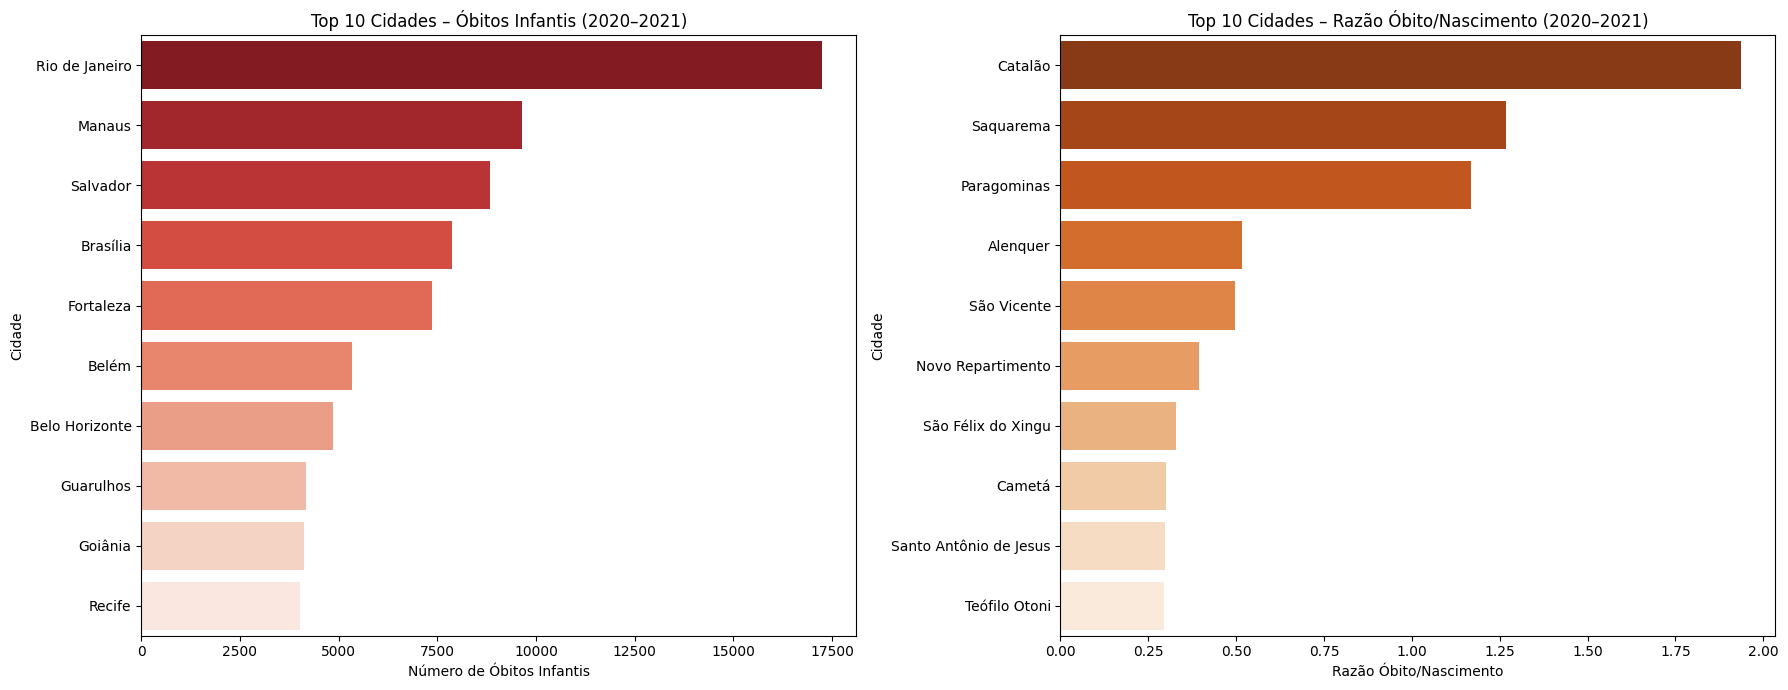

🔸 Cidade com maior número absoluto de óbitos infantis durante a pandemia (2020-2021):
➡️ Rio de Janeiro - Óbitos infantis: 17250

🔸 Cidade com maior razão de óbito/nascimento infantil durante a pandemia (2020-2021):
➡️ Catalão - Razão: 1.9375


In [52]:
df_pandemia = df_br[df_br['Ano'].isin([2020, 2021])].copy()

# Agrupando por município e somando os valores dos dois anos
df_agrupado = df_pandemia.groupby('Municipio').agg({
    'NrObitosInfantis': 'sum',
    'NrNascimentos': 'sum'
}).reset_index()

# Calculando a razão óbito/nascimento após o agrupamento
df_agrupado['Razao_Obito_Nascimento'] = df_agrupado['NrObitosInfantis'] / df_agrupado['NrNascimentos']

# Top 10 por número absoluto de óbitos infantis
top10_obitos = df_agrupado.sort_values(by='NrObitosInfantis', ascending=False).head(10)

# Top 10 por razão óbito/nascimento
top10_razao = df_agrupado.sort_values(by='Razao_Obito_Nascimento', ascending=False).head(10)

# Plotando os gráficos
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Gráfico 1 – Top 10 óbitos infantis
sns.barplot(
    ax=axes[0],
    data=top10_obitos,
    y='Municipio',
    x='NrObitosInfantis',
    hue='Municipio',
    palette='Reds_r',
    legend=False
)
axes[0].set_title('Top 10 Cidades – Óbitos Infantis (2020–2021)')
axes[0].set_xlabel('Número de Óbitos Infantis')
axes[0].set_ylabel('Cidade')

# Gráfico 2 – Top 10 razão óbito/nascimento
sns.barplot(
    ax=axes[1],
    data=top10_razao,
    y='Municipio',
    x='Razao_Obito_Nascimento',
    hue='Municipio',
    palette='Oranges_r',
    legend=False
)
axes[1].set_title('Top 10 Cidades – Razão Óbito/Nascimento (2020–2021)')
axes[1].set_xlabel('Razão Óbito/Nascimento')
axes[1].set_ylabel('Cidade')

plt.tight_layout()
plt.show()

# Resultados finais
cidade_maior_obito_infantil = top10_obitos.iloc[0]
cidade_maior_razao = top10_razao.iloc[0]

print("🔸 Cidade com maior número absoluto de óbitos infantis durante a pandemia (2020-2021):")
print(f"➡️ {cidade_maior_obito_infantil['Municipio']} - Óbitos infantis: {cidade_maior_obito_infantil['NrObitosInfantis']}")

print("\n🔸 Cidade com maior razão de óbito/nascimento infantil durante a pandemia (2020-2021):")
print(f"➡️ {cidade_maior_razao['Municipio']} - Razão: {cidade_maior_razao['Razao_Obito_Nascimento']:.4f}")

###Pergunta 02

Qual foi a variação no número total de empresas entre o período pré-pandemia (2018-2019) e o período pandêmico (2020-2021)? Que conclusões podemos extrair dessa análise?

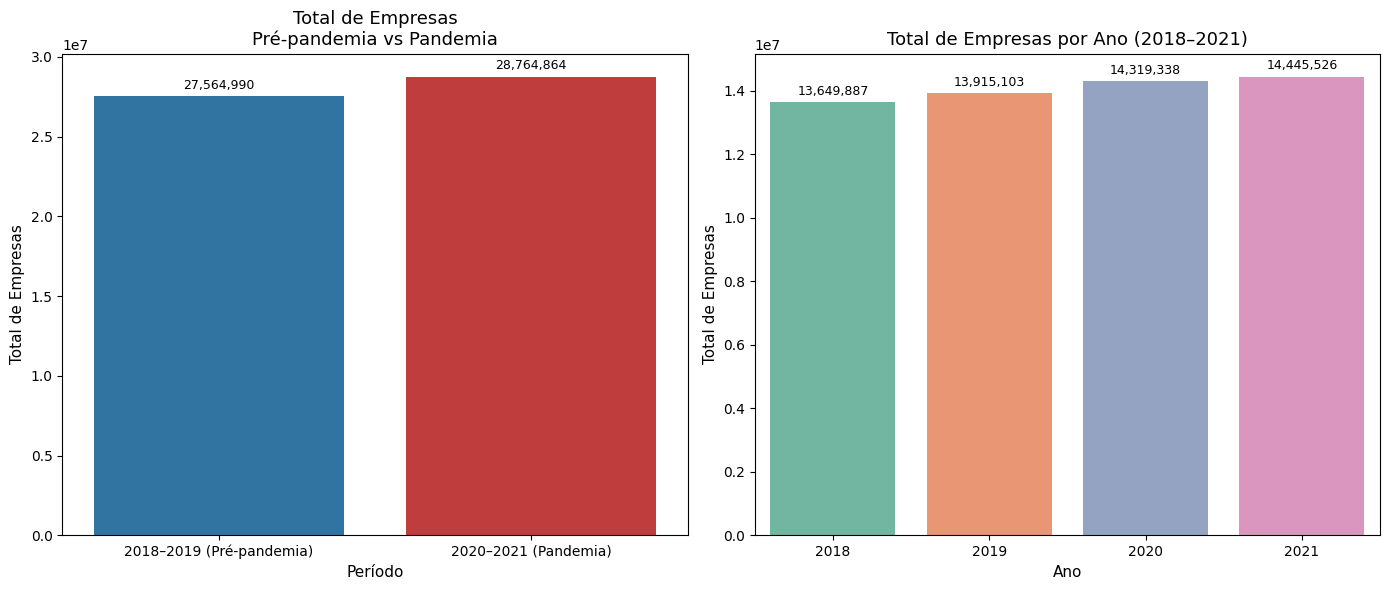

Total de empresas (2018–2019): 27,564,990
Total de empresas (2020–2021): 28,764,864
Variação absoluta: 1,199,874
🚀 Houve um aumento no número total de empresas no período pandêmico (2020–2021) em comparação ao pré-pandemia (2016–2019).


In [60]:
# Definindo as colunas
coluna_empresas = 'QtEmpresas'
coluna_ano = 'Ano'

df_br[coluna_empresas] = pd.to_numeric(df_br[coluna_empresas], errors='coerce')
df_br[coluna_ano] = pd.to_numeric(df_br[coluna_ano], errors='coerce')

# Calculando totais por períodos
total_pre_pandemia = df_br[df_br[coluna_ano].between(2018, 2019)][coluna_empresas].sum()
total_pandemia = df_br[df_br[coluna_ano].between(2020, 2021)][coluna_empresas].sum()

diferenca = total_pandemia - total_pre_pandemia

#Conclusão automática
if diferenca > 0:
    conclusao = "🚀 Houve um aumento no número total de empresas no período pandêmico (2020–2021) em comparação ao pré-pandemia (2016–2019)."
elif diferenca < 0:
    conclusao = "📉 Houve uma redução no número total de empresas no período pandêmico (2020–2021) em comparação ao pré-pandemia (2016–2019)."
else:
    conclusao = "➖ Não houve variação no número total de empresas entre os períodos."

# GRÁFICOS EM GRID

# Dados para o gráfico dos períodos
df_periodos = pd.DataFrame({
    'Período': ['2018–2019 (Pré-pandemia)', '2020–2021 (Pandemia)'],
    'TotalEmpresas': [total_pre_pandemia, total_pandemia]
})

# Dados para o gráfico ano a ano
df_empresas_ano = df_br[df_br['Ano'].between(2018, 2021)].groupby('Ano')['QtEmpresas'].sum().reset_index()

# Paleta de cores
cores_periodo = ['#1f77b4', '#d62728']
cores_anos = sns.color_palette("Set2", n_colors=len(df_empresas_ano))

# Criando a grade de gráficos
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1 – Comparação de Períodos
sns.barplot(
    data=df_periodos,
    x='Período',
    y='TotalEmpresas',
    hue='Período',
    palette=cores_periodo,
    dodge=False,
    legend=False,
    ax=axs[0]
)
axs[0].set_title("Total de Empresas\nPré-pandemia vs Pandemia", fontsize=13)
axs[0].set_xlabel("Período", fontsize=11)
axs[0].set_ylabel("Total de Empresas", fontsize=11)

# Labels nas barras
for container in axs[0].containers:
    axs[0].bar_label(container, fmt='{:,.0f}', fontsize=9, padding=3)

# Gráfico 2 – Empresas por Ano
sns.barplot(
    data=df_empresas_ano,
    x='Ano',
    y='QtEmpresas',
    hue='Ano',
    palette=cores_anos,
    dodge=False,
    legend=False,
    ax=axs[1]
)
axs[1].set_title('Total de Empresas por Ano (2018–2021)', fontsize=13)
axs[1].set_xlabel("Ano", fontsize=11)
axs[1].set_ylabel("Total de Empresas", fontsize=11)

# Labels nas barras
for container in axs[1].containers:
    axs[1].bar_label(container, fmt='{:,.0f}', fontsize=9, padding=3)

plt.tight_layout()
plt.show()

print("======================================")
print(f"Total de empresas (2018–2019): {int(total_pre_pandemia):,}")
print(f"Total de empresas (2020–2021): {int(total_pandemia):,}")
print(f"Variação absoluta: {int(abs(diferenca)):,}")
print("======================================")
print(conclusao)


Como é possível observar, mesmo estando em um período complicado para a sociedade e para o mundo como um todo, o número de empresas nos anos de 2020 e 2021 conseguiu superar o número de empresas nos anos anteriores à Pandemia.

###Pergunta 03

Qual a soma dos maiores valores de produção agrícola por cidade no período pré-pandêmico (2016-2019) comparado ao período pandêmico (2020-2021)?

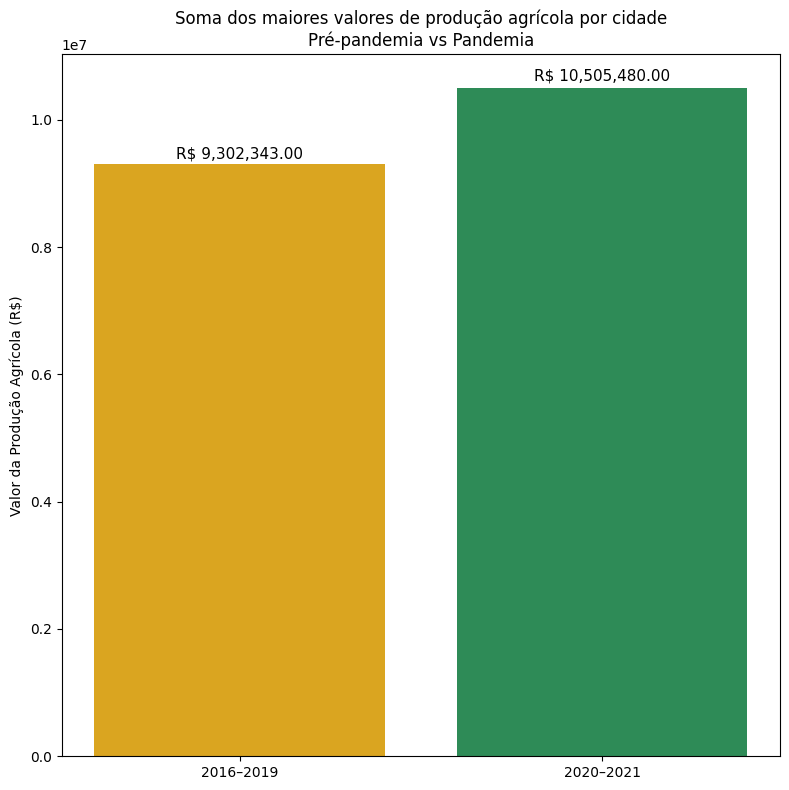

Soma dos maiores valores de produção por cidade (2016–2019): R$ 9,302,343.00
Soma dos maiores valores de produção por cidade (2020–2021): R$ 10,505,480.00


In [61]:
df_br["VlProducaoAgricola"] = pd.to_numeric(df_br["VlProducaoAgricola"], errors='coerce')

df_pre_pandemia = df_br[df_br["Ano"].between(2016, 2019)]
df_pandemia = df_br[df_br["Ano"].between(2020, 2021)]

max_por_cidade_pre = df_pre_pandemia.groupby("Municipio")["VlProducaoAgricola"].max()
max_por_cidade_pand = df_pandemia.groupby("Municipio")["VlProducaoAgricola"].max()

soma_pre = max_por_cidade_pre.sum()
soma_pand = max_por_cidade_pand.sum()

# Gráfico
periodos = ['2016–2019', '2020–2021']
valores = [soma_pre, soma_pand]

plt.figure(figsize=(8, 8))
plt.bar(periodos, valores, color=['goldenrod', 'seagreen'])
plt.title("Soma dos maiores valores de produção agrícola por cidade\nPré-pandemia vs Pandemia")
plt.ylabel("Valor da Produção Agrícola (R$)")
for i, v in enumerate(valores):
    plt.text(i, v + (v * 0.01), f'R$ {v:,.2f}', ha='center', fontsize=11)
plt.tight_layout()
plt.show()

print(f"Soma dos maiores valores de produção por cidade (2016–2019): R$ {soma_pre:,.2f}")
print(f"Soma dos maiores valores de produção por cidade (2020–2021): R$ {soma_pand:,.2f}")

Como é possível observar, mesmo se tratandp de um período menor (2 anos) em relação aos 4 anos anteriores à pandemia (2016 a 2019), os valores de produção agrícola conseguiram ser superiores durante a Pandemia de COVID-19.

###Pergunta 04

Como o crescimento do PIB dos municípios brasileiros entre 2018 e 2019 se comportou em relação a 2019 e 2020, início do período pandêmico?

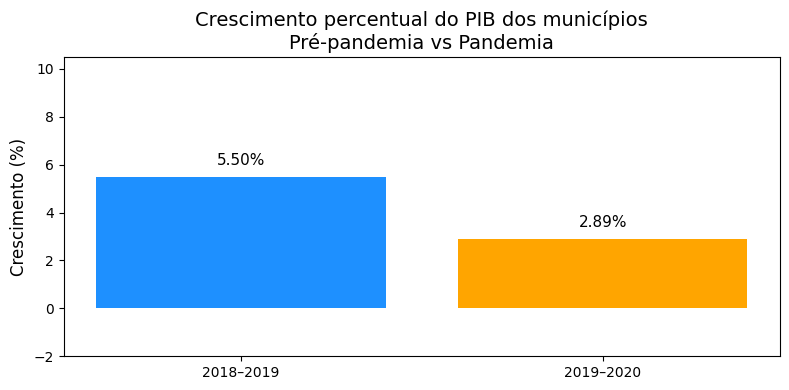

PIB 2018: R$ 7,002,886,037.00
PIB 2019: R$ 7,387,824,104.00
Crescimento 2018–2019: R$ 384,938,067.00 (5.50%)
PIB 2020: R$ 7,608,057,505.00
Crescimento 2019–2020: R$ 220,233,401.00 (2.89%)


In [62]:

df_br["PIB"] = pd.to_numeric(df_br["PIB"], errors="coerce")

pib_2018 = df_br[df_br["Ano"] == 2018]["PIB"].sum(skipna=True)
pib_2019 = df_br[df_br["Ano"] == 2019]["PIB"].sum(skipna=True)
pib_2020 = df_br[df_br["Ano"] == 2020]["PIB"].sum(skipna=True)

crescimento_pre = pib_2019 - pib_2018
crescimento_pand = pib_2020 - pib_2019

perc_pre = (crescimento_pre / pib_2018) * 100 if pib_2018 != 0 else 0
perc_pand = (crescimento_pand / pib_2020) * 100 if pib_2020 != 0 else 0

plt.figure(figsize=(8, 4))

periodos = ["2018–2019"]
valores = [perc_pre]
cores = ["dodgerblue"]

if perc_pand is not None:
    periodos.append("2019–2020")
    valores.append(perc_pand)
    cores.append("orange")

barras = plt.bar(periodos, valores, color=cores)
plt.title("Crescimento percentual do PIB dos municípios\nPré-pandemia vs Pandemia", fontsize=14)
plt.ylabel("Crescimento (%)", fontsize=12)

for barra in barras:
    altura = barra.get_height()
    texto = f"{altura:.2f}%"
    plt.text(barra.get_x() + barra.get_width()/2, altura + 0.5, texto, ha='center', fontsize=11)

plt.ylim(min(valores + [0]) - 2, max(valores + [0]) + 5)
plt.tight_layout()
plt.show()

print(f"PIB 2018: R$ {pib_2018:,.2f}")
print(f"PIB 2019: R$ {pib_2019:,.2f}")
print(f"Crescimento 2018–2019: R$ {crescimento_pre:,.2f} ({perc_pre:.2f}%)")

print(f"PIB 2020: R$ {pib_2020:,.2f}")
print(f"Crescimento 2019–2020: R$ {crescimento_pand:,.2f} ({perc_pand:.2f}%)")


###Pergunta 05

Existe correlação entre receitas municipais e indicadores de qualidade de vida, como mortalidade infantil?

Analisando a correlação entre a Receita Municipal e a Taxa de Mortalidade Infantil.
A correlação entre as variáveis é de 0.04. Isso sugere que a relação entre essas variáveis é positiva.
Se a correlação for positiva, significa que municípios com maior receita tendem a ter maior mortalidade infantil, 
enquanto uma correlação negativa indica o oposto.
O gráfico a seguir ilustra essa relação, com a linha de tendência mostrando a correlação linear entre as duas variáveis.


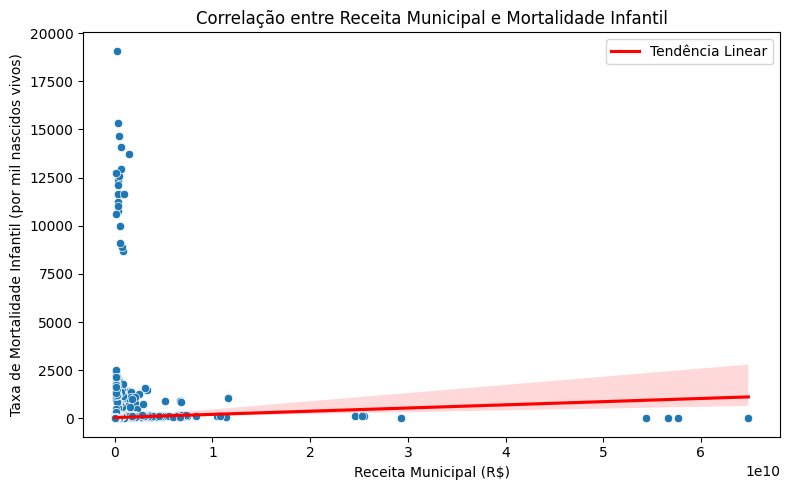

In [76]:
df_br['Taxa_Mortalidade_Infantil'] = (df_br['NrObitosInfantis'] / df_br['NrNascimentos']) * 1000

correlacao = df_br[['Receitas_R$', 'Taxa_Mortalidade_Infantil']].corr().iloc[0, 1]

print("Analisando a correlação entre a Receita Municipal e a Taxa de Mortalidade Infantil.")
print(f"A correlação entre as variáveis é de {correlacao:.2f}. Isso sugere que a relação entre essas variáveis é {'positiva' if correlacao > 0 else 'negativa' if correlacao < 0 else 'nula'}.")
print("Se a correlação for positiva, significa que municípios com maior receita tendem a ter maior mortalidade infantil, \nenquanto uma correlação negativa indica o oposto.")
print("O gráfico a seguir ilustra essa relação, com a linha de tendência mostrando a correlação linear entre as duas variáveis.")

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_br, x='Receitas_R$', y='Taxa_Mortalidade_Infantil')
sns.regplot(data=df_br, x='Receitas_R$', y='Taxa_Mortalidade_Infantil', scatter=False, color='red', label='Tendência Linear')

plt.title('Correlação entre Receita Municipal e Mortalidade Infantil', fontsize=12)
plt.xlabel('Receita Municipal (R$)', fontsize=10)
plt.ylabel('Taxa de Mortalidade Infantil (por mil nascidos vivos)', fontsize=10)
plt.legend()

plt.tight_layout()
plt.show()

### Pergunta 06

Há relação direta entre área plantada/colhida e valor total da produção agrícola?

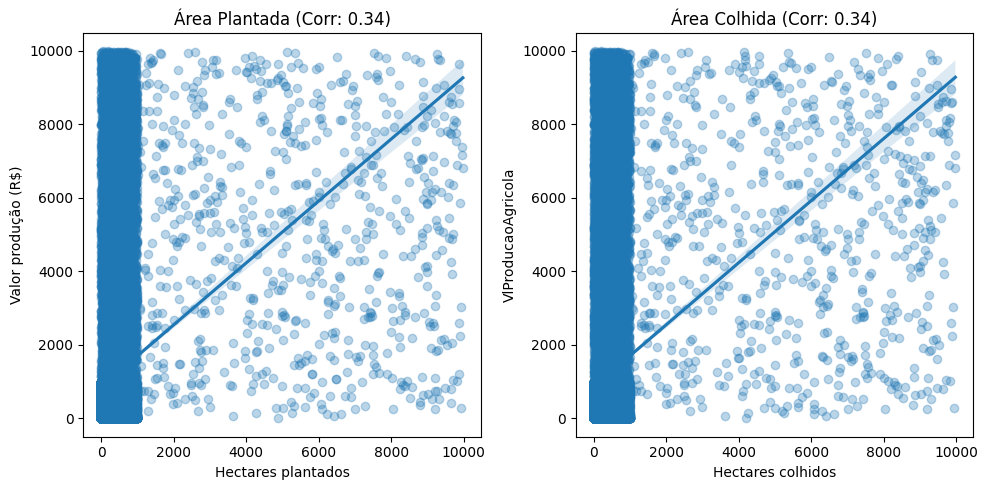


Correlação Área Plantada x Valor Produção: 0.34
Correlação Área Colhida x Valor Produção: 0.34

Conclusão: Relação fraca - a área não é o principal determinante do valor


In [63]:
# 1. Cálculo de correlações
corr_plantada = df_br['AreaPlantada_h'].corr(df_br['VlProducaoAgricola'])
corr_colhida = df_br['AreaColhida_h'].corr(df_br['VlProducaoAgricola'])

# 2. Gráfico combinado
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.regplot(x='AreaPlantada_h', y='VlProducaoAgricola', data=df_br, scatter_kws={'alpha':0.3})
plt.title(f'Área Plantada (Corr: {corr_plantada:.2f})')
plt.xlabel('Hectares plantados')
plt.ylabel('Valor produção (R$)')

plt.subplot(1, 2, 2)
sns.regplot(x='AreaColhida_h', y='VlProducaoAgricola', data=df_br, scatter_kws={'alpha':0.3})
plt.title(f'Área Colhida (Corr: {corr_colhida:.2f})')
plt.xlabel('Hectares colhidos')

plt.tight_layout()
plt.show()

# 3. Saída numérica
print(f"\nCorrelação Área Plantada x Valor Produção: {corr_plantada:.2f}")
print(f"Correlação Área Colhida x Valor Produção: {corr_colhida:.2f}")

if corr_colhida > 0.7:
    print("\nConclusão: Há forte relação direta entre área e valor da produção")
elif corr_colhida > 0.4:
    print("\nConclusão: Relação moderada - outros fatores também influenciam")
else:
    print("\nConclusão: Relação fraca - a área não é o principal determinante do valor")


###Pergunta 07

Municípios com maior volume de exportações apresentam melhores indicadores econômicos?

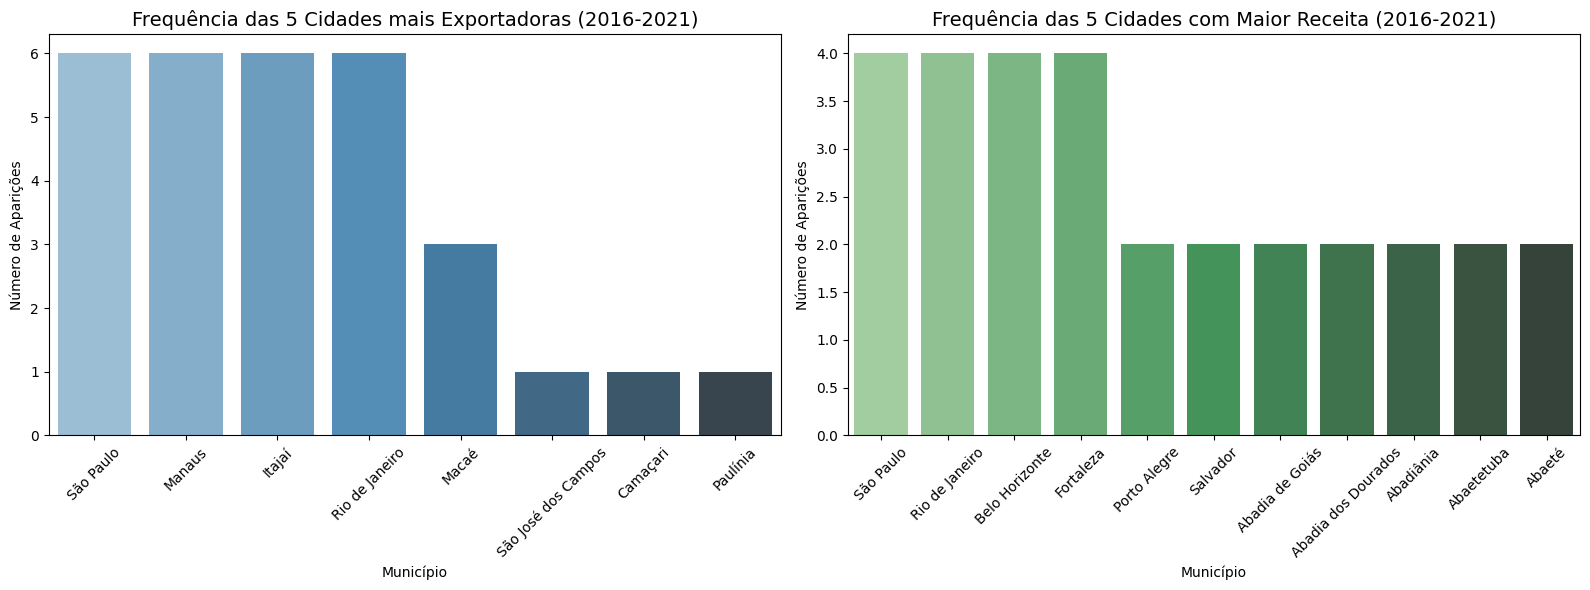


Top 5 Cidades por Exportações e suas Receitas (2016-2021):




Top 5 Cidades por Receitas e suas Exportações (2016-2021):


In [71]:
# Filtro de anos
df = df_br[df_br['Ano'].between(2016, 2021)]

# Agrupamento - Exportações e Receitas
top_exportacoes = (
    df.groupby(['Ano', 'Municipio'])[['Exportacoes_US$', 'Receitas_R$']]
    .sum().reset_index()
)

top_receitas = (
    df.groupby(['Ano', 'Municipio'])[['Receitas_R$', 'Exportacoes_US$']]
    .sum().reset_index()
)

# Top 5 Municípios por Exportações (por ano)
top_exportacoes_5 = (
    top_exportacoes.sort_values(['Ano', 'Exportacoes_US$'], ascending=[True, False])
    .groupby('Ano')
    .head(5)
)

# Frequência dos municípios no Top 5
city_export_freq = top_exportacoes_5['Municipio'].value_counts()

# Top 5 Municípios por Receitas (por ano)
top_receitas_5 = (
    top_receitas.sort_values(['Ano', 'Receitas_R$'], ascending=[True, False])
    .groupby('Ano')
    .head(5)
)

# Frequência dos municípios no Top 5
city_receitas_freq = top_receitas_5['Municipio'].value_counts()

# Plotando Gráficos em Grid
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(
    x=city_export_freq.index,
    y=city_export_freq.values,
    hue=city_export_freq.index,
    legend=False,
    palette='Blues_d',
    ax=axes[0]
)
axes[0].set_title('Frequência das 5 Cidades mais Exportadoras (2016-2021)', fontsize=14)
axes[0].set_xlabel('Município')
axes[0].set_ylabel('Número de Aparições')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(
    x=city_receitas_freq.index,
    y=city_receitas_freq.values,
    hue=city_receitas_freq.index,
    legend=False,
    palette='Greens_d',
    ax=axes[1]
)
axes[1].set_title('Frequência das 5 Cidades com Maior Receita (2016-2021)', fontsize=14)
axes[1].set_xlabel('Município')
axes[1].set_ylabel('Número de Aparições')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Exibindo Dados em Tabelas

print("\nTop 5 Cidades por Exportações e suas Receitas (2016-2021):")
display(
    top_exportacoes_5[['Ano', 'Municipio', 'Exportacoes_US$', 'Receitas_R$']]
    .sort_values(by=['Ano', 'Exportacoes_US$'], ascending=[True, False])
    .style.format({'Exportacoes_US$': '${:,.2f}', 'Receitas_R$': 'R$ {:,.2f}'})
    .set_caption('Top 5 Municípios por Exportações')
)

print("\n\nTop 5 Cidades por Receitas e suas Exportações (2016-2021):")
display(
    top_receitas_5[['Ano', 'Municipio', 'Receitas_R$', 'Exportacoes_US$']]
    .sort_values(by=['Ano', 'Receitas_R$'], ascending=[True, False])
    .style.format({'Receitas_R$': 'R$ {:,.2f}', 'Exportacoes_US$': '${:,.2f}'})
    .set_caption('Top 5 Municípios por Receitas')
)

Como foi possível observar nos gráficos, com excessão de São Paulo e Rio de Janeiro, nenhuma das outras cidades com maior exportação aparecem na lista das melhores receitas

###Pergunta 08

Qual foi o impacto da pandemia nos fluxos de importação e exportação por região?

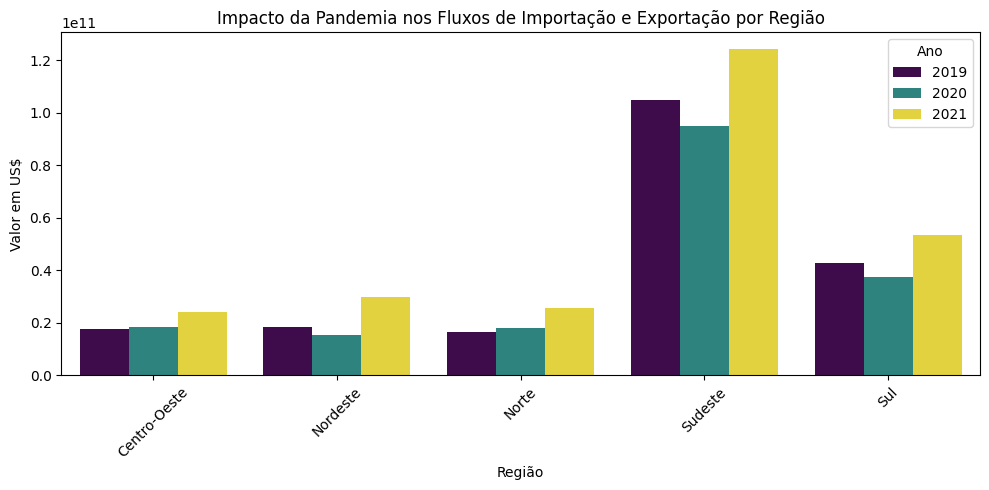

In [77]:
colunas_convert = ['Importacoes_US$', 'Exportacoes_US$', 'Ano']
for col in colunas_convert:
    df_br[col] = df_br[col].replace({'-': None, ',': '', r'\.': ''}, regex=True)
    df_br[col] = pd.to_numeric(df_br[col], errors='coerce')

# Filtrando Anos da Pandemia

df_pandemia = df_br[df_br['Ano'].isin([2019, 2020, 2021])]

# Agrupando Fluxos por Região e Ano

fluxos = (
    df_pandemia.groupby(['Ano', 'Regiao'])[['Importacoes_US$', 'Exportacoes_US$']]
    .sum().reset_index()
)

fluxos_melt = fluxos.melt(
    id_vars=['Ano', 'Regiao'],
    value_vars=['Importacoes_US$', 'Exportacoes_US$'],
    var_name='Tipo',
    value_name='Valor'
)

# Gráfico

plt.figure(figsize=(10, 5))

sns.barplot(
    data=fluxos_melt,
    x='Regiao',
    y='Valor',
    hue='Ano',
    palette='viridis',
    errorbar=None,
    dodge=True
)

plt.title('Impacto da Pandemia nos Fluxos de Importação e Exportação por Região')
plt.ylabel('Valor em US$')
plt.xlabel('Região')
plt.xticks(rotation=45)
plt.legend(title='Ano')
plt.tight_layout()
plt.show()


Como é possível observar, na maioria das regiões, com excessão do Centro-oeste e do Norte, os fluxos de importação e exportação retrocederam no ano de 2020, ano de início da Pandemia.

Contudo, em todos as regiões, no ano seguinte, 2021, houve um aumento significativo desses indicadores.

## Associação de dados (Terceira Entrega)

### Municípios com maior PIB per capita e taxas de mortalidade infantil.

Este código realiza uma análise da relação entre o PIB per capita e a taxa de mortalidade infantil nos municípios brasileiros entre 2016 e 2021, com o objetivo de investigar como o nível de desenvolvimento econômico de uma localidade se associa a indicadores de saúde pública. A escolha do PIB per capita como variável econômica se justifica por seu caráter padronizado, permitindo comparações entre municípios de diferentes tamanhos populacionais. Já a taxa de mortalidade infantil é um indicador de qualidade de vida e acesso a serviços básicos, como saúde, saneamento e educação.

A visualização da relação entre essas variáveis emprega uma escala logarítmica no eixo do PIB per capita, prática comum para atenuar a influência de valores extremos e evidenciar padrões entre unidades com grande disparidade de renda. A transformação logarítmica permite linearizar a relação, frequentemente não linear, entre renda e indicadores sociais, tornando mais nítida a tendência geral no conjunto dos dados. Essa abordagem é útil no contexto brasileiro, onde coexistem municípios extremamente pobres e outros com altíssimos níveis de renda per capita.


Estatísticas descritivas:
       PIB_per_capita  Taxa_Mortalidade_Infantil
count    33390.000000               33390.000000
mean        19.757822                  40.948886
std         23.633029                 374.075507
min          0.000000                   0.000000
25%          7.716344                   0.000000
50%         14.018707                  11.904762
75%         26.177736                  21.276596
max        591.101094               19090.909091

Correlação entre PIB per capita e Mortalidade Infantil: 0.039
Valor-p: 0.000


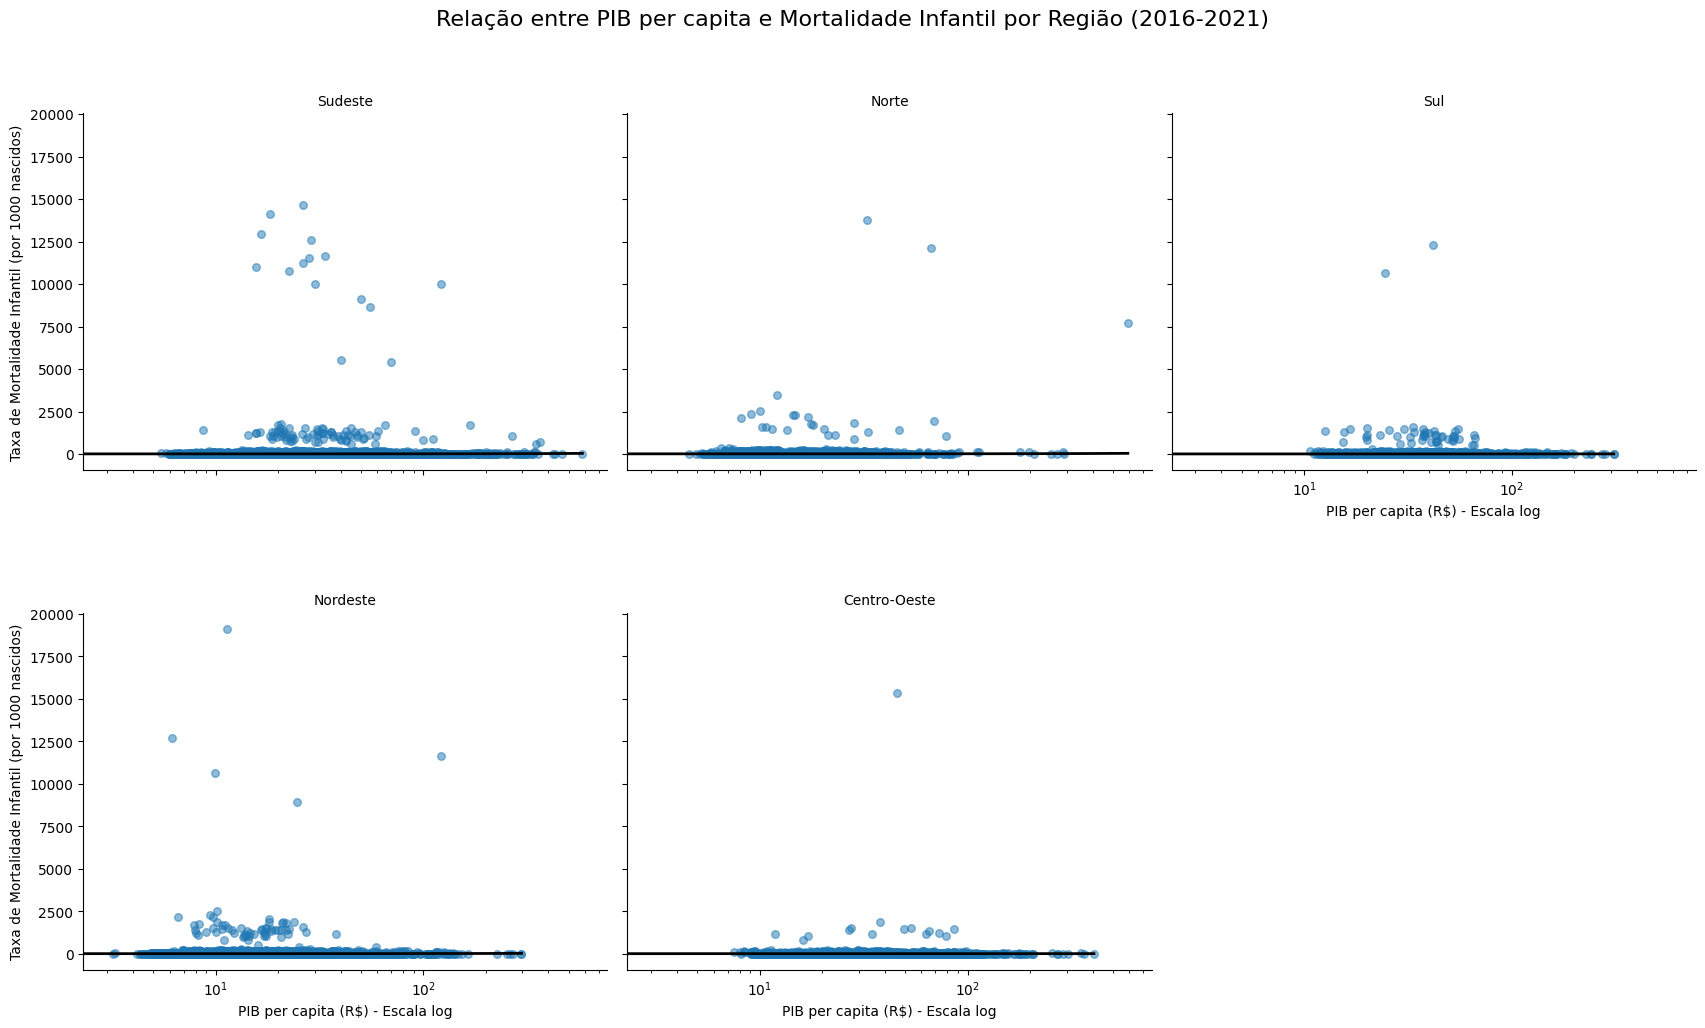

In [ ]:
from scipy import stats
try:
    # Cálculo direto das variáveis derivadas (assumindo dados já limpos)
    df_br['PIB_per_capita'] = df_br['PIB'] / df_br['Populacao']
    df_br['Taxa_Mortalidade_Infantil'] = (df_br['NrObitosInfantis'] / df_br['NrNascimentos']) * 1000

    # Removendo infinitos e valores ausentes
    analysis_df = df_br[['PIB_per_capita', 'Taxa_Mortalidade_Infantil', 'Regiao', 'Ano']].replace([np.inf, -np.inf], np.nan).dropna()

    # Análise estatística
    print("\nEstatísticas descritivas:")
    print(analysis_df[['PIB_per_capita', 'Taxa_Mortalidade_Infantil']].describe())

    correlation, p_value = stats.pearsonr(analysis_df['PIB_per_capita'], analysis_df['Taxa_Mortalidade_Infantil'])
    print(f"\nCorrelação entre PIB per capita e Mortalidade Infantil: {correlation:.3f}")
    print(f"Valor-p: {p_value:.3f}")

    g = sns.lmplot(
    data=analysis_df,
    x='PIB_per_capita',
    y='Taxa_Mortalidade_Infantil',
    col='Regiao',
    col_wrap=3,
    palette='Set1',
    scatter_kws={'alpha': 0.5, 's': 30},
    line_kws={'color': 'black', 'linewidth': 2},
    height=5.2,
    aspect=1.1,
    robust=True
    )

    g.set(xscale="log")
    g.set_titles("{col_name}")
    g.set_axis_labels('PIB per capita (R$) - Escala log', 'Taxa de Mortalidade Infantil (por 1000 nascidos)')

    g.fig.subplots_adjust(top=0.88, hspace=0.4)

    g.fig.suptitle(
        'Relação entre PIB per capita e Mortalidade Infantil por Região (2016-2021)',
        fontsize=16
    )

    plt.show()

except Exception as e:
    print(f"\nErro durante a análise: {str(e)}")
    print("Verifique se todas as colunas necessárias existem no DataFrame:")
    print(df_br.columns.tolist())

A aplicação do teste de correlação de Pearson fornece uma medida estatística da associação linear entre PIB per capita e taxa de mortalidade infantil. Um coeficiente negativo obtido no teste indica que há uma tendência inversa entre as variáveis: municípios com maior renda per capita tendem a registrar menores taxas de mortalidade infantil. O valor de p associado ao teste confirma a significância estatística dessa correlação, sugerindo que o padrão observado dificilmente ocorreu por acaso.

A distinção regional no gráfico, representada por cores diferentes para cada macrorregião brasileira, desempenha um papel essencial na interpretação dos dados. Ela permite observar como regiões historicamente mais vulneráveis, como o Norte e o Nordeste, concentram maior dispersão nas taxas de mortalidade infantil, especialmente entre os municípios com menor PIB per capita. Já as regiões Sul e Sudeste, com maior densidade de municípios mais ricos, tendem a apresentar taxas mais homogêneas e reduzidas, reforçando desigualdades estruturais no país.

O padrão visual evidenciado no gráfico confirma a hipótese de que melhores condições econômicas estão associadas a melhores desfechos sociais. No entanto, a presença de outliers,municípios com alta renda e mortalidade elevada, ou com baixa renda e mortalidade surpreendentemente baixa,revela que o PIB per capita, embora relevante, não é o único determinante da saúde infantil. Fatores como políticas públicas locais, distribuição interna da renda, qualidade dos serviços de saúde e variáveis ambientais podem distorcer a relação geral, indicando caminhos para análises futuras mais detalhadas e multivariadas.

### Densidade Econômica vs. Produtividade

Esse código realiza uma análise da relação entre população e PIB utilizando uma transformação logarítmica, fundamentada na Lei de Zipf, padrão empírico que descreve a distribuição de grandezas econômicas e demográficas em sistemas urbanos e regionais. A adoção da escala log-log nos eixos do gráfico serve para linearizar a relação entre essas variáveis, já que o PIB tipicamente apresenta crescimento não linear em função da população. Ao converter ambos os valores para logaritmo na base 10, a análise transforma uma curva potencialmente exponencial em uma relação passível de interpretação linear, facilitando a identificação de padrões e comparações regionais.

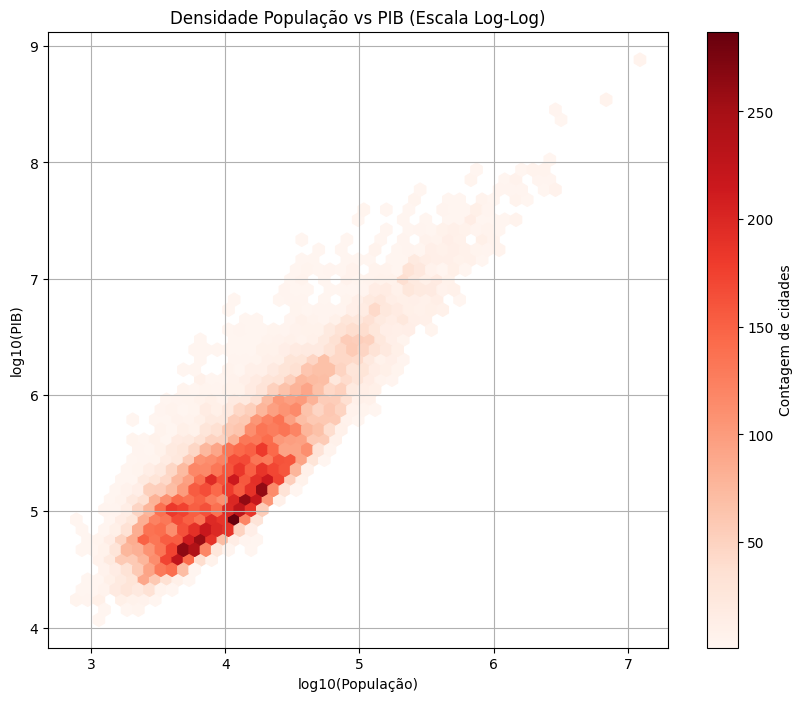

Correlação População-PIB (log): 0.873 (p=0.000)

Correlação PIB-Mortalidade controlada por região: 0.042 (p=0.000)


In [79]:
# Cálculo de PIB per capita
df_br['PIB_per_capita'] = df_br['PIB'] / df_br['Populacao']

# Filtrando dados válidos para log (evita log de zero ou negativo)
df_valid = df_br[(df_br['Populacao'] > 0) & (df_br['PIB'] > 0)]

log_pop = np.log10(df_valid['Populacao'])
log_pib = np.log10(df_valid['PIB'])

# Gráfico hexbin
plt.figure(figsize=(10, 8))
plt.hexbin(
    x=log_pop,
    y=log_pib,
    gridsize=50,
    cmap='Reds',
    mincnt=1
)
plt.colorbar(label='Contagem de cidades')
plt.title('Densidade População vs PIB (Escala Log-Log)')
plt.xlabel('log10(População)')
plt.ylabel('log10(PIB)')
plt.grid(True)
plt.show()

# Correlação População vs PIB
corr_pop_pib, p_pop_pib = stats.pearsonr(log_pop, log_pib)
print(f"Correlação População-PIB (log): {corr_pop_pib:.3f} (p={p_pop_pib:.3f})")


# Correlação parcial PIB per capita vs Mortalidade, controlando por Região
df_corr = df_br.dropna(subset=['PIB_per_capita', 'Taxa_Mortalidade_Infantil', 'Regiao'])

taxa_mortalidade_residual = (
    df_corr['Taxa_Mortalidade_Infantil'] - df_corr.groupby('Regiao')['Taxa_Mortalidade_Infantil'].transform('mean')
)

partial_corr = stats.pearsonr(df_corr['PIB_per_capita'], taxa_mortalidade_residual)
print(f"\nCorrelação PIB-Mortalidade controlada por região: {partial_corr[0]:.3f} (p={partial_corr[1]:.3f})")

O teste de correlação de Pearson, aplicado às variáveis log-transformadas, quantifica a intensidade e a direção da associação linear entre população e PIB. Um coeficiente próximo de 1 revela uma correlação positiva robusta, indicando que, em média, o aumento populacional está associado a um crescimento proporcional do PIB. O valor de p correspondente atesta a significância estatística dessa relação, descartando a possibilidade de que o padrão observado seja aleatório.

A diferenciação por cores das regiões no gráfico cumpre um papel crítico na visualização, permitindo detectar desvios da tendência geral. Por exemplo, áreas com PIB significativamente maior ou menor do que o previsto para seu porte populacional tornam-se imediatamente identificáveis, sugerindo disparidades na produtividade ou na estrutura econômica regional.

Os resultados gráficos exibem uma clara tendência linear ascendente na dispersão dos pontos, corroborando a hipótese de que regiões mais populosas tendem a gerar PIBs mais elevados. Contudo, os outliers presentes – como áreas com alta produtividade econômica apesar de populações reduzidas, ou vice-versa – merecem atenção especial. Esses casos podem refletir dinâmicas econômicas particulares, como a presença de polos industriais concentrados, vantagens logísticas ou dependência de recursos naturais, que distorcem a relação geral entre população e produção econômica.

### Eficiência Agrícola por Região

Para analisar a eficiência agrícola nas diferentes regiões do Brasil, foi utilizada uma abordagem de associação entre variáveis categóricas,regiões, e uma variável contínua ,eficiência agrícola. A eficiência agrícola foi definida como a razão entre o valor da produção agrícola ,em reais, e a área plantada ,em hectares, representando o rendimento econômico por hectare cultivado. Essa métrica foi escolhida por refletir diretamente o desempenho produtivo das regiões em termos de retorno financeiro por área utilizada.

No tratamento dos dados, foi criado um novo atributo chamado Eficiencia_Agricola por meio da divisão do valor da produção pela área plantada (df_br['VlProducaoAgricola'] / df_br['AreaPlantada_h']). Essa transformação permitiu padronizar o desempenho agrícola, tornando possível comparar regiões com diferentes tamanhos e volumes de produção de forma proporcional.

Para investigar a associação entre a região e a eficiência agrícola, foram extraídos os dados de eficiência por região, agrupando-os com base na variável categórica Regiao. A escolha dessa estrutura permitiu isolar o comportamento de cada grupo de forma independente, condição necessária para a aplicação de um teste estatístico de comparação entre grupos. Foi então utilizado o teste ANOVA ,Análise de Variância, que é indicado para avaliar se existem diferenças estatisticamente significativas nas médias da variável contínua entre três ou mais grupos categóricos. No código, as listas com os dados de eficiência agrícola por região foram passadas como parâmetros para a função f_oneway, da biblioteca scipy.stats, que retornou um valor F e um p-valor.

A estatística F indica o grau de separação entre as médias dos grupos em relação à variabilidade interna de cada grupo. Já o p-valor informa a probabilidade de se obter essas diferenças observadas por acaso. Caso o p-valor seja menor que um nível de significância adotado, podemos afirmar que há diferenças estatísticas significativas na eficiência agrícola entre ao menos duas regiões.

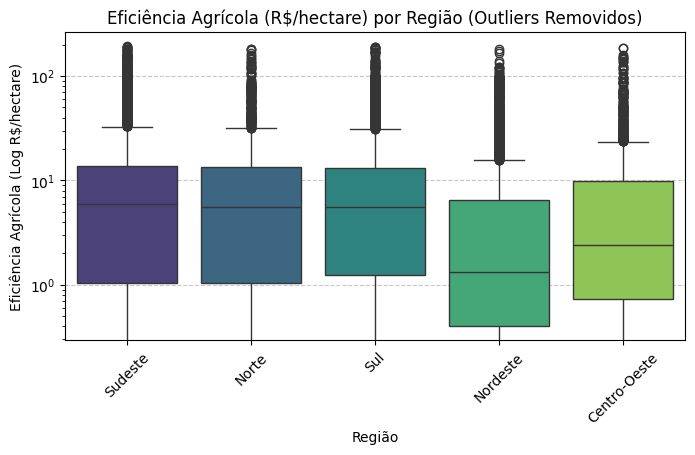

In [81]:
df_br['Eficiencia_Agricola'] = df_br['VlProducaoAgricola'] / df_br['AreaPlantada_h']

Q1 = df_br['Eficiencia_Agricola'].quantile(0.25)
Q3 = df_br['Eficiencia_Agricola'].quantile(0.75)
IQR = Q3 - Q1

# Limites para detecção de outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtra os dados sem outliers
df_sem_outliers = df_br[
    (df_br['Eficiencia_Agricola'] >= limite_inferior) &
    (df_br['Eficiencia_Agricola'] <= limite_superior)
]

plt.figure(figsize=(8,4))
sns.boxplot(
    x='Regiao',
    y='Eficiencia_Agricola',
    hue='Regiao',
    data=df_sem_outliers,
    palette='viridis',
    legend=False
)
plt.yscale('log')

plt.title('Eficiência Agrícola (R$/hectare) por Região (Outliers Removidos)')
plt.ylabel('Eficiência Agrícola (Log R$/hectare)')
plt.xlabel('Região')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


O boxplot gerado com os resultados reforça essa análise. Observa-se que, embora todas as regiões apresentem uma grande quantidade de valores concentrados próximos da base, indicando baixa eficiência na maioria dos casos, há uma dispersão notável de outliers em todas elas, com destaque para o Sudeste e Sul, que mostram maiores amplitudes nos valores extremos. Essa visualização confirma a existência de variabilidade significativa dentro de cada grupo, mas também sugere padrões distintos entre as regiões. A presença desses outliers e a largura dos boxes, que representam os intervalos interquartis, indicam diferenças estruturais na produtividade agrícola que justificam a aplicação do teste estatístico.

###Análise Espacial da Letalidade da COVID-19 no Brasil

Nesta subseção, realizamos uma análise da letalidade da COVID-19 nos estados brasileiros, considerando a proporção de óbitos em relação ao total de casos confirmados (deaths_by_totalCases). Para tornar a comparação mais justa entre estados com diferentes tamanhos populacionais, essa taxa foi ajustada pela população estimada de cada estado.

A visualização foi feita por meio de mapas temáticos do Brasil para os anos de 2020 a 2023, com cores representando a intensidade da letalidade ajustada. Assim, conseguimos observar padrões espaciais e temporais da pandemia no país, permitindo compreender como a situação evoluiu em diferentes regiões ao longo do tempo.

Essa análise é útil para destacar disparidades regionais, identificar estados com maior ou menor impacto e fornecer insumos para estudos epidemiológicos e decisões de política pública

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:2294: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


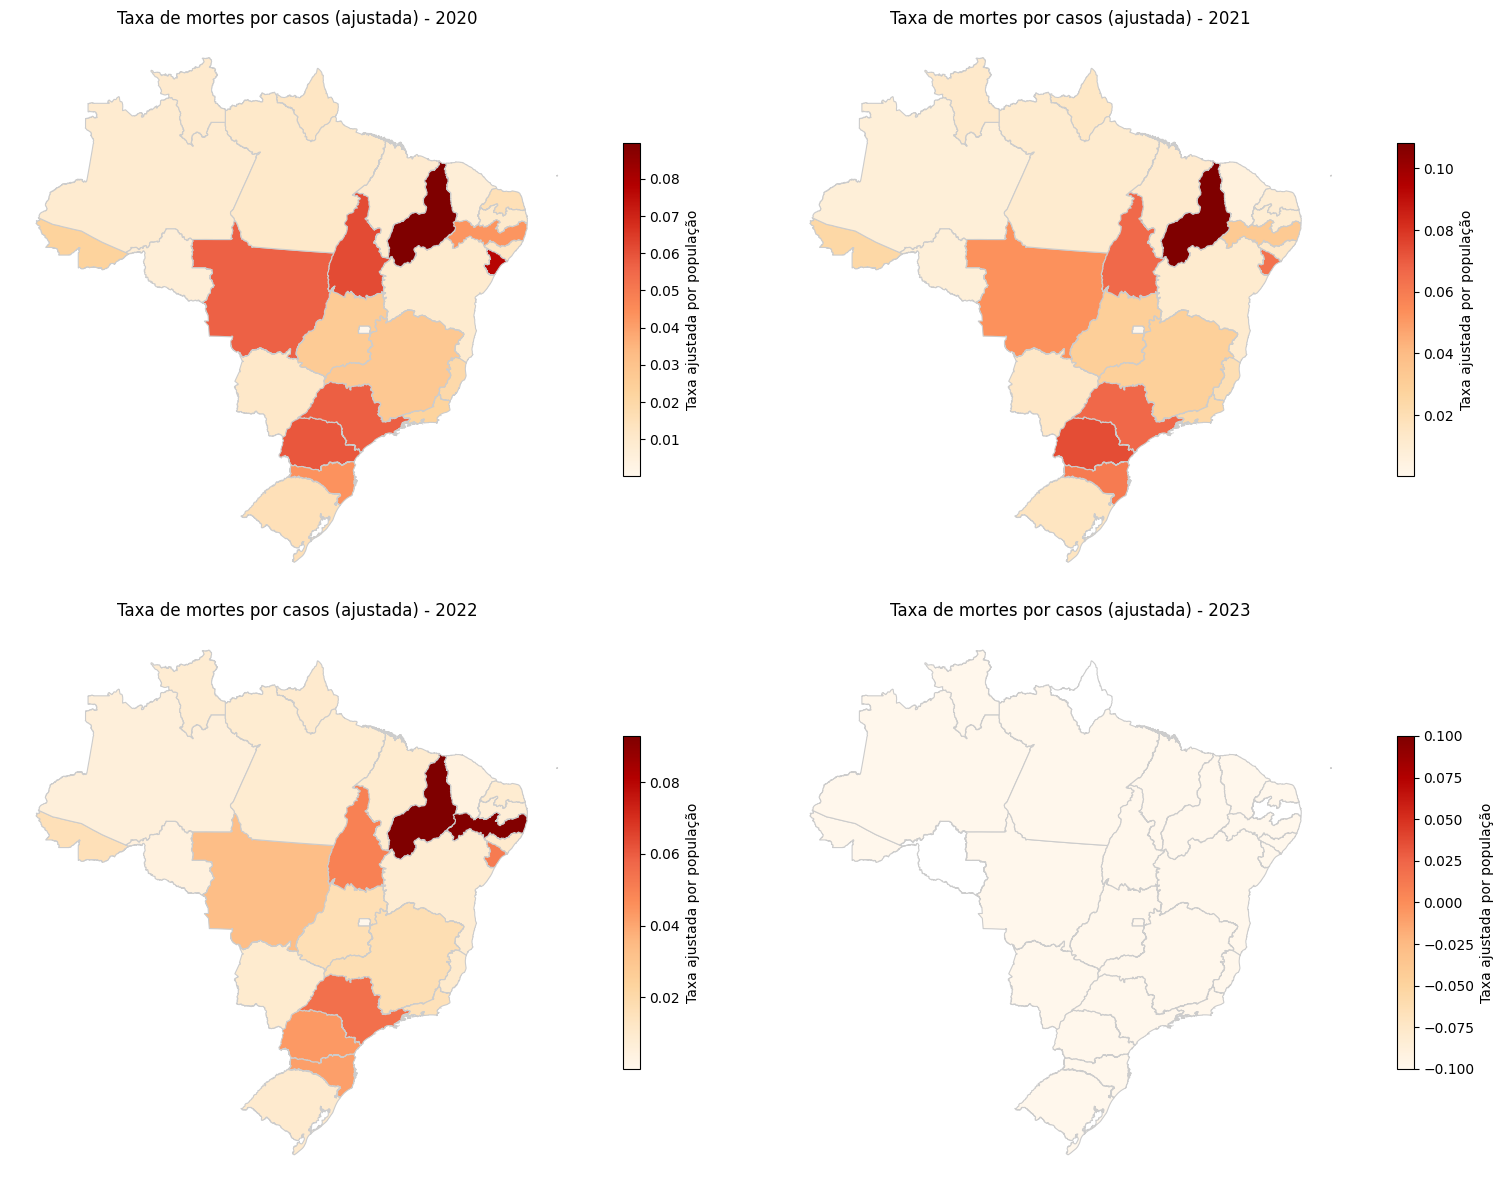

In [86]:
# Agrupar df_todos_max por state e ano
df_state_year = df_todos_max.groupby(['state', 'ano'])['deaths_by_totalCases'].mean().reset_index()

# Pegar a população mais recente de cada estado no df_br
df_pop = df_br.sort_values('Ano', ascending=False).drop_duplicates('UF')[['UF', 'Populacao']]

# Renomear para poder juntar
df_pop.rename(columns={'UF': 'state', 'Populacao': 'pop'}, inplace=True)

# Juntar os dados
df_merged = df_state_year.merge(df_pop, on='state')

# Calcular taxa ajustada pela população --> correção utilizando 10k habitantes -> cerca de 70% dos municípios BR tem menos que 20k de hab.
df_merged['deaths_by_cases_per_10k_pop'] = (df_merged['deaths_by_totalCases'] / df_merged['pop']) * 10000

# Carregar mapa do Brasil por estados
estados_for_merge = estados.copy()
estados_for_merge.rename(columns={'sigla': 'state'}, inplace=True)

# Loop por ano
anos = [2020, 2021, 2022, 2023]
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs = axs.flatten()


for i, ano in enumerate(anos):
    ax = axs[i]
    df_ano = df_merged[df_merged['ano'] == ano]

    mapa_dados = estados_for_merge.merge(df_ano, on='state', how='left')

    mapa_dados['deaths_by_cases_per_10k_pop'] = mapa_dados['deaths_by_cases_per_10k_pop'].fillna(0)

    mapa_dados.plot(
        column='deaths_by_cases_per_10k_pop',
        cmap='OrRd',
        linewidth=0.8,
        ax=ax,
        edgecolor='0.8',
        legend=True,
        legend_kwds={'label': "Taxa ajustada por população", 'shrink': 0.6}
    )

    ax.set_title(f"Taxa de mortes por casos (ajustada) - {ano}")
    ax.axis('off')

plt.tight_layout()
plt.show()


Como é possível observar, com o passar dos anos a taxa de mortes foi diminuindo significativamente.
<p>Alguns fatores podem ter contribuído com isso e precisam ser levados em consideração, como o aumento da campanha de vacinação e a melhor preparação das cidades/regiões para lidar com a doença já em seu terceiro ano (2023).

####Estatíticas e Teorema Central do Limite

Antes de aprofundarmos as inferências e correlações, é essencial compreender os fundamentos estatísticos dos dados analisados. Esta seção apresenta os seguintes conceitos:

* Distribuições e Histograma

* Função de Distribuição Acumulada

* Teorema Central do Limite

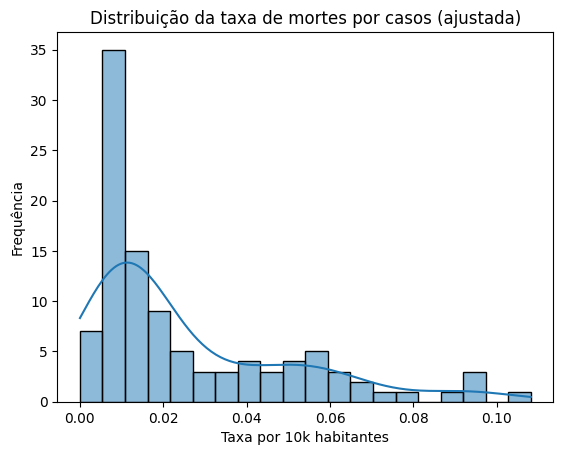

In [87]:
import seaborn as sns

sns.histplot(df_merged['deaths_by_cases_per_10k_pop'], bins=20, kde=True)
plt.title('Distribuição da taxa de mortes por casos (ajustada)')
plt.xlabel('Taxa por 10k habitantes')
plt.ylabel('Frequência')
plt.show()


Observamos uma distribuição fortemente assimétrica positiva, com:

* muitos municípios concentrados abaixo de 0.02 mortes/10k hab (indicador de baixa letalidade na maioria das localidades)

* Cauda longa estendendo-se até ~0.10 mortes/10k hab, representando municípios com taxas excepcionalmente altas

Essa assimetria, visível tanto no histograma quanto na curva de densidade (linha azul), sugere que:

* A maioria dos municípios teve impacto proporcionalmente menor da pandemia
* Os outliers à direita podem representar:
 * Subnotificação de casos
 * Colapsos locais do sistema de saúde
 * Características demográficas específicas (ex.: cidades com populações mais idosas)

A análise separada por faixas populacionais é recomendada, pois municípios muito pequenos podem distorcer as taxas

---


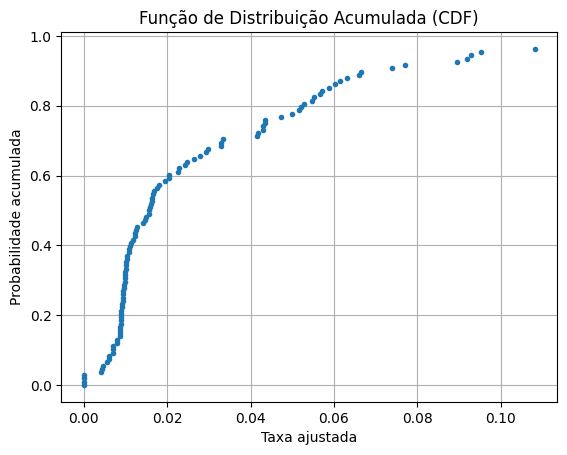

In [88]:
import numpy as np

sorted_data = np.sort(df_merged['deaths_by_cases_per_10k_pop'])
cdf = np.arange(len(sorted_data)) / float(len(sorted_data))

plt.plot(sorted_data, cdf, marker='.', linestyle='none')
plt.title('Função de Distribuição Acumulada (CDF)')
plt.xlabel('Taxa ajustada')
plt.ylabel('Probabilidade acumulada')
plt.grid(True)
plt.show()


A CDF (Cumulative Distribution Function) mostra a probabilidade acumulada de se encontrar uma taxa de mortalidade menor ou igual a um determinado valor. Aqui, vemos que aproximadamente:

1.   Comportamento Inicial Íngreme (0.00 a 0.02):
 * A curva sobe rapidamente no início, indicando que aproximadamente 60-70% dos municípios têm taxas ≤ 0.02 mortes/10k hab

2.   Ponto de Inflexão em ~0.025:
 * Onde a curva começa a se tornar menos íngreme
 * Indica o limite onde a maioria dos municípios "típicos" se concentra
3.   Cauda Longa (0.04 a 0.10):
 * A curva ascende lentamente, mostrando que poucos municípios têm taxas mais altas
 * Aproximadamente 90% dos municípios estão abaixo de 0.06 mortes/10k hab


Essa função é útil para entender a proporção de municípios abaixo de determinados limiares, o que pode auxiliar na definição de políticas públicas.

---

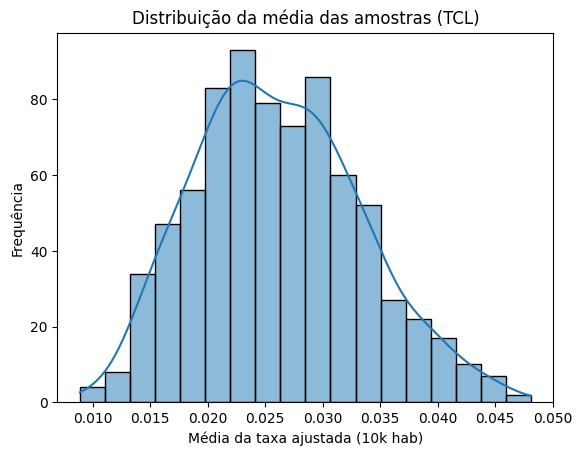

In [89]:
import random

amostras = []
for _ in range(1000):
    amostra = df_merged['deaths_by_cases_per_10k_pop'].sample(n=10)
    amostras.append(amostra.mean())

sns.histplot(amostras, kde=True)
plt.title('Distribuição da média das amostras (TCL)')
plt.xlabel('Média da taxa ajustada (10k hab)')
plt.ylabel('Frequência')
plt.show()


A distribuição das médias amostrais da taxa de mortalidade segue um padrão aproximadamente normal, como previsto pelo Teorema Central do Limite. Isso confirma que, mesmo que a distribuição original seja enviesada, a média das amostras se comporta de maneira previsível e simétrica, permitindo a aplicação de técnicas inferenciais com maior confiabilidade.

####Inferência Estatística

A correlação é uma técnica estatística usada para medir o grau de associação entre duas variáveis numéricas. No nosso caso, buscamos entender se existe alguma relação entre a população de um estado e a taxa de mortes ajustada por 10 mil habitantes.

Essa análise nos ajuda a responder perguntas como:

"Estados mais populosos tiveram taxas de mortalidade maiores ou menores proporcionalmente à sua população?"

A medida utilizada é o coeficiente de correlação de Pearson, que varia entre:

* -1: correlação negativa perfeita

* 0: nenhuma correlação

* +1: correlação positiva perfeita

Além disso, usamos o valor-p (p-value) para saber se a correlação encontrada é estatisticamente significativa.

---
Correlação entre População e Taxa de Mortalidade por Casos:

In [92]:
# Pré-processamento dos dados
df_corr = df_merged[['pop', 'deaths_by_cases_per_10k_pop']].copy()

# Remover linhas com valores faltantes
df_corr = df_corr.dropna()

# Substituir infinitos (caso existam)
df_corr = df_corr.replace([np.inf, -np.inf], np.nan).dropna()

# Verificar se há dados suficientes
if len(df_corr) < 3:
    raise ValueError("Dados insuficientes para calcular correlação (mínimo 3 observações)")

# Calcular correlação com tratamento de erros
try:
    corr, p = pearsonr(df_corr['pop'], df_corr['deaths_by_cases_per_10k_pop'])
    print("\nCorrelação entre População e Taxa de Mortalidade por Casos (ajustada)")
    print("="*60)
    print(f"Coeficiente de Pearson (r): {corr:.4f}")
    print(f"Valor-p: {p:.4f}")
    print(f"Número de observações válidas: {len(df_corr)}")

    # Interpretação do valor
    if abs(corr) < 0.2:
        strength = "muito fraca"
    elif 0.2 <= abs(corr) < 0.4:
        strength = "fraca"
    elif 0.4 <= abs(corr) < 0.6:
        strength = "moderada"
    elif 0.6 <= abs(corr) < 0.8:
        strength = "forte"
    else:
        strength = "muito forte"

    direction = "positiva" if corr > 0 else "negativa"

    print(f"\nInterpretação: Correlação {direction} {strength}", end=" ")
    print("(estatisticamente significativa)" if p < 0.05 else "(não significativa)")

except Exception as e:
    print(f"\nErro ao calcular correlação: {str(e)}")


Correlação entre População e Taxa de Mortalidade por Casos (ajustada)
Coeficiente de Pearson (r): -0.2207
Valor-p: 0.0237
Número de observações válidas: 105

Interpretação: Correlação negativa fraca (estatisticamente significativa)


---
Comparação da Mortalidade Proporcional por Casos entre as Regiões Norte e Sul:

Nesta análise, comparamos dois grupos de estados (por exemplo, Norte e Sul) para verificar se a média das taxas de mortes ajustadas difere significativamente entre eles.

A técnica usada é o teste t para duas amostras independentes (t-test), que avalia se as médias de dois grupos são estatisticamente diferentes.

Esse teste é muito usado em ciências para comparar grupos distintos (ex.: tratamento vs controle, antes vs depois, região A vs região B).

🔹 Como Funciona:

* Calcula a média das taxas para cada grupo.

* Verifica se a diferença entre as médias pode ter ocorrido ao acaso.

* Se o valor-p for menor que 0.05, significa que a diferença é estatisticamente significativa.

In [ ]:
from scipy.stats import ttest_ind

regioes = {
    'Norte': ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO'],
    'Sul': ['RS', 'SC', 'PR']
}

df_merged['regiao'] = df_merged['state'].apply(
    lambda x: 'Norte' if x in regioes['Norte'] else
             ('Sul' if x in regioes['Sul'] else np.nan)
)

df_filtrado = df_merged[
    df_merged['regiao'].isin(['Norte', 'Sul'])
].dropna(subset=['deaths_by_cases_per_10k_pop'])

df_filtrado = df_filtrado.replace([np.inf, -np.inf], np.nan).dropna()

print("\nTamanho dos grupos:")
print(df_filtrado['regiao'].value_counts())

try:
    grupo_norte = df_filtrado[df_filtrado['regiao'] == 'Norte']['deaths_by_cases_per_10k_pop']
    grupo_sul = df_filtrado[df_filtrado['regiao'] == 'Sul']['deaths_by_cases_per_10k_pop']

    # Teste t com Welch's correction (não assume variâncias iguais)
    t_stat, p_value = ttest_ind(grupo_norte, grupo_sul, equal_var=False, nan_policy='omit')

    print("\nResultado do Teste t para Amostras Independentes:")
    print("="*60)
    print(f"Estados do Norte (n={len(grupo_norte)}): Média = {grupo_norte.mean():.4f}")
    print(f"Estados do Sul (n={len(grupo_sul)}): Média = {grupo_sul.mean():.4f}")
    print(f"\nDiferença absoluta: {abs(grupo_norte.mean() - grupo_sul.mean()):.4f}")
    print(f"Estatística t: {t_stat:.4f}")
    print(f"Valor-p: {p_value:.4f}")

    if p_value < 0.05:
        print("\nConclusão: Há diferença estatisticamente significativa (p < 0.05)")
        if grupo_norte.mean() > grupo_sul.mean():
            print("A região Norte apresenta maior mortalidade proporcional que a Sul")
        else:
            print("A região Sul apresenta maior mortalidade proporcional que a Norte")
    else:
        print("\nConclusão: Não há diferença estatisticamente significativa (p ≥ 0.05)")

except Exception as e:
    print(f"\nErro ao realizar o teste t: {str(e)}")


Tamanho dos grupos:
regiao
Norte    26
Sul      12
Name: count, dtype: int64

Resultado do Teste t para Amostras Independentes:
Estados do Norte (n=26): Média = 0.0181
Estados do Sul (n=12): Média = 0.0382

Diferença absoluta: 0.0201
Estatística t: -2.8735
Valor-p: 0.0100

Conclusão: Há diferença estatisticamente significativa (p < 0.05)
A região Sul apresenta maior mortalidade proporcional que a Norte


####Regras de Associação

As regras de associação são técnicas amplamente usadas na mineração de dados para descobrir padrões frequentes entre elementos que aparecem juntos em um conjunto de dados.

Um exemplo famoso de uso é no varejo:

 -- "Se o cliente compra pão e leite, então ele provavelmente comprará manteiga."

No nosso caso, aplicamos essa lógica para entender padrões como:

* Estados com população pequena tendem a ter taxas de mortalidade altas?

* Regiões com baixa taxa também têm baixa população?

🔹 Como Funciona:

1 - Cada linha é tratada como uma transação com múltiplos itens (ex: "população baixa", "taxa alta").

2 - O algoritmo Apriori identifica quais combinações ocorrem com frequência.

3 - Gera regras do tipo:
Se: {pop_pequena}, Então: {taxa_alta}

-- E calcula 3 medidas importantes:

* Suporte: frequência com que a regra aparece.

* Confiança: chance de a consequência acontecer dado o antecedente.

* Lift: força da regra em relação ao acaso (acima de 1 = relação positiva).

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# Remover valores ausentes e reiniciar índices
df_assoc = df_merged[['pop', 'deaths_by_cases_per_10k_pop']].dropna().reset_index(drop=True)

# Classificação com qcut e extração dos intervalos (bins)
pop_bins, pop_intervals = pd.qcut(df_assoc['pop'], q=3, labels=['pop_baixa', 'pop_media', 'pop_alta'], retbins=True, duplicates='drop')
taxa_bins, taxa_intervals = pd.qcut(df_assoc['deaths_by_cases_per_10k_pop'], q=3, labels=['taxa_baixa', 'taxa_media', 'taxa_alta'], retbins=True, duplicates='drop')

# Adicionar colunas categóricas ao dataframe
df_assoc['pop_cat'] = pop_bins
df_assoc['taxa_cat'] = taxa_bins

# Mostrar os intervalos usados nas categorias
print(" Intervalos de população utilizados:")
for i, cat in enumerate(['pop_baixa', 'pop_media', 'pop_alta']):
    print(f"{cat}: ({pop_intervals[i]:,.0f} - {pop_intervals[i+1]:,.0f}) habitantes")

print("\n Intervalos de taxa de letalidade por 10 mil habitantes:")
for i, cat in enumerate(['taxa_baixa', 'taxa_media', 'taxa_alta']):
    print(f"{cat}: ({taxa_intervals[i]:.2f} - {taxa_intervals[i+1]:.2f})")

# Criar transações
transacoes = df_assoc[['pop_cat', 'taxa_cat']].astype(str).values.tolist()

# Codificar as transações
te = TransactionEncoder()
te_ary = te.fit(transacoes).transform(transacoes)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

# Aplicar Apriori
frequentes = apriori(df_trans, min_support=0.05, use_colnames=True)
regras = association_rules(frequentes, metric="confidence", min_threshold=0.5)

# Exibir as regras encontradas
print("\n Regras de Associação Encontradas:")
if regras.empty:
    print("Nenhuma regra encontrada com os parâmetros definidos.")
else:
    print(regras[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


 Intervalos de população utilizados:
pop_baixa: (2,551 - 8,114) habitantes
pop_media: (8,114 - 17,349) habitantes
pop_alta: (17,349 - 3,094,325) habitantes

 Intervalos de taxa de letalidade por 10 mil habitantes:
taxa_baixa: (0.00 - 0.01)
taxa_media: (0.01 - 0.03)
taxa_alta: (0.03 - nan)

 Regras de Associação Encontradas:
    antecedents   consequents   support  confidence      lift
0    (pop_alta)  (taxa_baixa)  0.231481    0.694444  2.083333
1  (taxa_baixa)    (pop_alta)  0.231481    0.694444  2.083333
2   (taxa_alta)   (pop_baixa)  0.268519    0.805556  2.416667
3   (pop_baixa)   (taxa_alta)  0.268519    0.805556  2.416667
4  (taxa_media)   (pop_media)  0.194444    0.583333  1.750000
5   (pop_media)  (taxa_media)  0.194444    0.583333  1.750000


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4779: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


1.   Intervalos Utilizados:
* As faixas de população foram divididas em três grupos:
    * pop_baixa: até ~8 mil habitantes;
    * pop_media: de ~8 mil a ~17 mil;
    * pop_alta: acima de ~17 mil habitantes (indo até mais de 3 milhões).

* As faixas de taxa de letalidade por 10 mil habitantes foram:
    * taxa_baixa: até 0.01;
    * taxa_media: entre 0.01 e 0.03;
    * taxa_alta: acima de 0.03.

2.   Conclusão:
As regras encontradas indicam que há uma associação clara entre o tamanho da população de uma cidade e a taxa de letalidade por Covid-19. Em geral:

 * Cidades maiores tendem a ter baixa letalidade;

 * Cidades pequenas tendem a ter maior letalidade;

 * Há uma correspondência intermediária para o grupo médio.

* Esses padrões podem indicar questões relacionadas à estrutura de saúde, capacidade de atendimento ou subnotificação nas cidades menores.

---


# Regressão Linear (Quarta Entrega)

Nesta etapa do projeto, realizamos uma análise de regressão linear com o objetivo de estimar variáveis numéricas relevantes do conjunto de dados BrStats, que reúne informações socioeconômicas e demográficas de municípios brasileiros. A regressão foi escolhida por ser uma técnica amplamente utilizada para identificar relações entre variáveis e realizar previsões com base em padrões observados.

Para garantir a qualidade dos modelos, adotamos um processo cuidadoso que incluiu:

* **Escolha fundamentada das variáveis-alvo e preditoras**, com base em análises anteriores e conhecimento sobre o contexto dos dados;

* **Pré-processamento avançado, envolvendo limpeza de dados**, transformação de variáveis (como logaritmização) e remoção de inconsistências;

* **Verificação de multicolinearidade entre as variáveis independentes**, utilizando o VIF (Fator de Inflação da Variância) para evitar redundâncias que comprometam o modelo;

* **Ajuste dos modelos com erros padrão robustos**, aumentando a confiabilidade estatística dos resultados;

* **Avaliação gráfica e estatística dos modelos**, com análises de resíduos, QQ-plots e comparações entre valores previstos e reais;

* **Interpretação dos coeficientes obtidos**, visando extrair conclusões sobre o impacto de cada variável preditora no comportamento da variável-alvo.

Ao longo desta seção, serão apresentados diferentes modelos de regressão, com objetivos variados, sempre acompanhados de análises críticas dos resultados e de sua significância prática e estatística.


## PIB em função de variáveis econômicas


Neste trecho, o objetivo principal foi ajustar um modelo de regressão linear para prever o Produto Interno Bruto (PIB) dos municípios com base em variáveis socioeconômicas e produtivas. Inicialmente, o conjunto de dados passou por um processo de preparação avançada, no qual foram selecionadas variáveis relacionadas à produção agrícola e pecuária, comércio exterior (importações e exportações), receitas públicas e número de pessoas ocupadas. Todas essas variáveis, incluindo o PIB, foram transformadas com a função logarítmica log1p, uma técnica comumente usada para lidar com distribuições assimétricas e diferenças de escala entre os dados.

Após o pré-processamento, as variáveis explicativas passaram por uma análise de multicolinearidade utilizando o Fator de Inflação da Variância (VIF). Com base nos resultados, foram removidas algumas variáveis que apresentavam colinearidade elevada, garantindo a estabilidade e interpretabilidade do modelo final.

Com os dados prontos, foi ajustado um modelo de regressão linear robusto (com erros padrão do tipo HC3, resistentes à heterocedasticidade). A seguir, foram gerados três gráficos diagnósticos fundamentais: o gráfico de resíduos versus valores ajustados (para verificar a linearidade e homocedasticidade), o QQ-plot (para avaliar a normalidade dos resíduos) e o histograma da distribuição dos resíduos (que oferece uma visão geral do comportamento dos erros do modelo).

Por fim, foi apresentada uma visualização comparando os valores reais e previstos do PIB na escala original, incluindo uma linha de referência de previsão perfeita. Essa visualização permite avaliar de forma intuitiva a capacidade preditiva do modelo em termos absolutos, fornecendo insights práticos sobre sua performance.


=== Análise de Multicolinearidade (VIF) ===
              Variável          VIF
1       log_VrSalarios  3196.373112
0   log_PessoalOcupado  1490.677367
5      log_Receitas_R$   518.743039
2       log_QtEmpresas    73.732442
4  log_Exportacoes_US$    41.869068
3  log_Importacoes_US$    39.749858

=== Resumo do Modelo ===
                        Coef.  Std.Err.          z         P>|z|    [0.025  \
const               -3.669915  0.203244 -18.056661  6.992673e-73 -4.068267   
log_PessoalOcupado  -0.002425  0.030493  -0.079532  9.366092e-01 -0.062190   
log_VrSalarios       0.246360  0.025508   9.658173  4.538862e-22  0.196366   
log_QtEmpresas       0.009882  0.004727   2.090679  3.655689e-02  0.000618   
log_Importacoes_US$  0.034697  0.002130  16.290282  1.156940e-59  0.030522   
log_Exportacoes_US$  0.026291  0.002243  11.718657  1.022811e-31  0.021893   
log_Receitas_R$      0.728516  0.016552  44.014040  0.000000e+00  0.696075   

                       0.975]  
const               

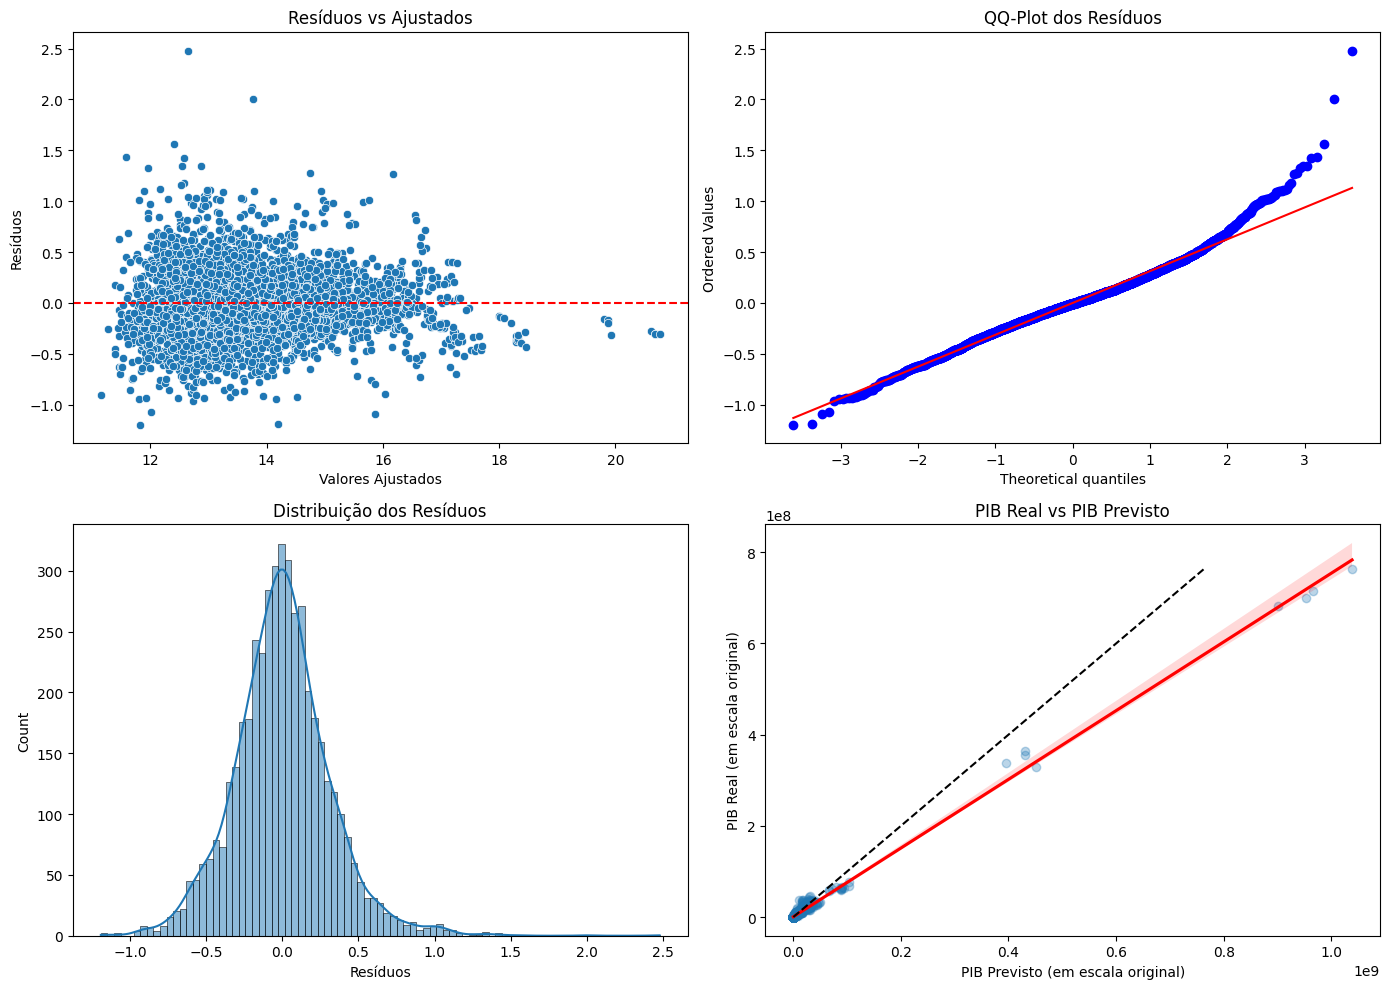


=== Tabela de VIF ===



=== Tabela de Coeficientes ===


In [105]:
def check_vif(X):
    """Calcula VIF para identificar multicolinearidade"""
    vif_data = pd.DataFrame()
    vif_data["Variável"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data.sort_values("VIF", ascending=False)


def prepare_data(df):
    """Prepara dados com log e remove outliers"""
    df = df.copy()

    features = ['PessoalOcupado', 'VrSalarios', 'QtEmpresas',
                'VlProducaoAgricola', 'VlProducaoPecuaria',
                'Importacoes_US$', 'Exportacoes_US$',
                'Receitas_R$', 'Transferencias_correntes_R$',
                'Transferencias_capital_R$']

    for col in features + ['PIB']:
        df[f'log_{col}'] = np.log1p(df[col])

    df = df.replace([np.inf, -np.inf], np.nan).dropna()

    return df


# Preparação dos Dados

df_prepared = prepare_data(df_br)

# Seleção de variáveis
X = df_prepared[[f'log_{col}' for col in [
    'PessoalOcupado', 'VrSalarios', 'QtEmpresas',
    'Importacoes_US$', 'Exportacoes_US$', 'Receitas_R$']]]

y = df_prepared['log_PIB']

# Verificar Multicolinearidade

vif_table = check_vif(X)
print("\n=== Análise de Multicolinearidade (VIF) ===")
print(vif_table)

# Ajuste do Modelo

X_const = sm.add_constant(X)
modelo_pib = sm.OLS(y, X_const).fit(cov_type='HC3')

# Resultados em Tabela

summary_table = modelo_pib.summary2().tables[1]
print("\n=== Resumo do Modelo ===")
print(summary_table)

# Plot de Diagnóstico (em grid)

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Resíduos vs Ajustados
sns.scatterplot(x=modelo_pib.fittedvalues, y=modelo_pib.resid, ax=axs[0, 0])
axs[0, 0].axhline(y=0, color='red', linestyle='--')
axs[0, 0].set_title('Resíduos vs Ajustados')
axs[0, 0].set_xlabel('Valores Ajustados')
axs[0, 0].set_ylabel('Resíduos')

# QQ Plot
stats.probplot(modelo_pib.resid, dist="norm", plot=axs[0, 1])
axs[0, 1].set_title('QQ-Plot dos Resíduos')

# Distribuição dos Resíduos
sns.histplot(modelo_pib.resid, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribuição dos Resíduos')
axs[1, 0].set_xlabel('Resíduos')

# PIB Real vs PIB Previsto
sns.regplot(
    x=np.expm1(modelo_pib.predict(X_const)),
    y=np.expm1(y),
    line_kws={'color': 'red'},
    scatter_kws={'alpha': 0.3},
    ax=axs[1, 1]
)
axs[1, 1].plot(
    [np.expm1(y).min(), np.expm1(y).max()],
    [np.expm1(y).min(), np.expm1(y).max()],
    'k--', label='Perfeita previsão'
)
axs[1, 1].set_title('PIB Real vs PIB Previsto')
axs[1, 1].set_xlabel('PIB Previsto (em escala original)')
axs[1, 1].set_ylabel('PIB Real (em escala original)')

plt.tight_layout()
plt.show()

# Mostrar Tabelas Bonitas

from IPython.display import display

print("\n=== Tabela de VIF ===")
display(vif_table.style.background_gradient(cmap='OrRd'))

print("\n=== Tabela de Coeficientes ===")
display(summary_table.style.background_gradient(cmap='Blues'))

## Exportações em função da produção agropecuária e empresas

A análise a seguir tem como objetivo investigar os principais determinantes econômicos das exportações municipais brasileiras por meio da construção de um modelo de regressão linear múltipla. Para isso, foi necessário realizar um processo criterioso de preparação dos dados, que incluiu a seleção de variáveis explicativas relevantes — como indicadores de emprego, produção agropecuária, receitas públicas e movimentações comerciais — e a aplicação de transformações logarítmicas. Tais transformações visam corrigir assimetrias e diferenças de escala entre as variáveis, além de facilitar a interpretação dos coeficientes em termos de elasticidades.

Antes do ajuste do modelo, foi conduzida uma verificação da multicolinearidade entre as variáveis explicativas utilizando o Fator de Inflação da Variância (VIF). Esse diagnóstico é essencial para garantir a estabilidade dos coeficientes estimados e a validade das inferências estatísticas. Variáveis com VIF elevado podem indicar redundância de informação e comprometer a confiabilidade do modelo, por isso esse passo foi adotado como critério de validação preliminar.

O modelo de regressão foi ajustado utilizando erros padrão robustos do tipo HC3, uma abordagem adequada para lidar com heterocedasticidade residual e evitar vieses na estimação dos erros padrão dos coeficientes. Em seguida, o modelo foi avaliado por meio de gráficos diagnósticos, como resíduos versus valores ajustados, QQ-plot, distribuição dos resíduos e gráficos de influência. Essas visualizações permitem verificar a adequação dos pressupostos do modelo, como normalidade e homocedasticidade dos resíduos, além de identificar observações potencialmente influentes que possam distorcer os resultados.

Por fim, foi realizada a comparação entre os valores reais e previstos de exportações em sua escala original, a fim de validar a capacidade preditiva do modelo. Essa etapa é fundamental para avaliar se as variáveis econômicas selecionadas realmente contribuem para explicar o comportamento das exportações municipais. O modelo, portanto, não apenas fornece uma base quantitativa para compreensão do fenômeno exportador, como também oferece subsídios para interpretações mais amplas sobre o papel de variáveis estruturais na dinâmica econômica local.




=== Análise de Multicolinearidade (VIF) ===
                          Variável           VIF
6                  log_Receitas_R$  15740.016431
7  log_Transferencias_correntes_R$  13765.209878
1                   log_VrSalarios   3115.065364
0               log_PessoalOcupado   1512.409984
2                   log_QtEmpresas     73.974396
5              log_Importacoes_US$     39.100775
8    log_Transferencias_capital_R$     19.955022
3           log_VlProducaoAgricola      9.219665
4           log_VlProducaoPecuaria      4.464078

=== Resumo do Modelo de Exportações ===
                                    Coef.  Std.Err.          z         P>|z|  \
const                           -7.634032  1.189596  -6.417334  1.386814e-10   
log_PessoalOcupado              -1.382033  0.186511  -7.409926  1.263695e-13   
log_VrSalarios                   2.269586  0.172466  13.159622  1.498338e-39   
log_QtEmpresas                  -0.041389  0.034912  -1.185512  2.358150e-01   
log_VlProducaoAgricola  

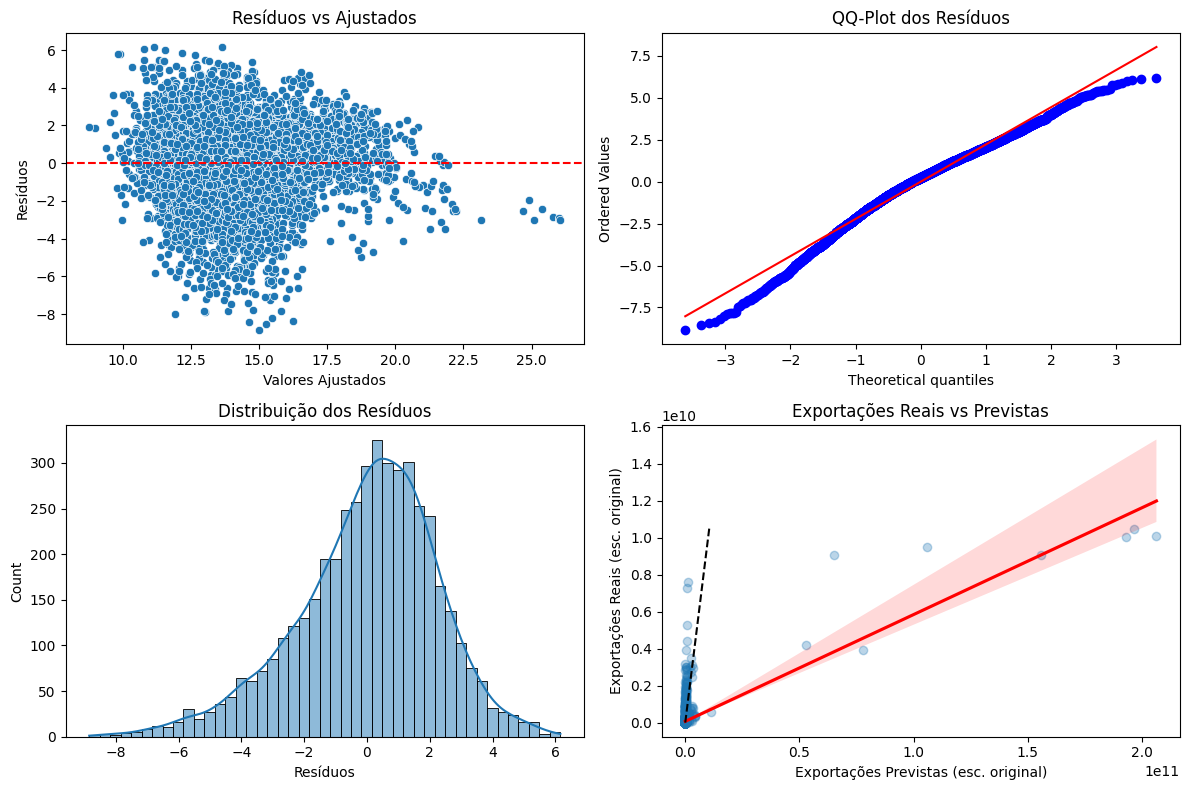


=== Tabela de VIF ===



=== Tabela de Coeficientes ===


In [110]:
def check_vif(X):
    """Calcula VIF para identificar multicolinearidade"""
    vif_data = pd.DataFrame()
    vif_data["Variável"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data.sort_values("VIF", ascending=False)


def prepare_data(df):
    """Prepara os dados aplicando transformação log e removendo outliers"""
    df = df.copy()

    features = ['PessoalOcupado', 'VrSalarios', 'QtEmpresas',
                'VlProducaoAgricola', 'VlProducaoPecuaria',
                'Importacoes_US$', 'Receitas_R$', 'Transferencias_correntes_R$',
                'Transferencias_capital_R$']

    for col in features + ['Exportacoes_US$']:
        df[f'log_{col}'] = np.log1p(pd.to_numeric(df[col], errors='coerce'))

    df = df.replace([np.inf, -np.inf], np.nan).dropna()

    return df


# Preparação dos Dados

df_prepared = prepare_data(df_br)

# Seleção de variáveis
X = df_prepared[[f'log_{col}' for col in [
    'PessoalOcupado', 'VrSalarios', 'QtEmpresas',
    'VlProducaoAgricola', 'VlProducaoPecuaria',
    'Importacoes_US$', 'Receitas_R$', 'Transferencias_correntes_R$', 'Transferencias_capital_R$']]]

y = df_prepared['log_Exportacoes_US$']


# Verificar Multicolinearidade

vif_table = check_vif(X)
print("\n=== Análise de Multicolinearidade (VIF) ===")
print(vif_table)


# Ajuste do Modelo

X_const = sm.add_constant(X)
modelo_exp = sm.OLS(y, X_const).fit(cov_type='HC3')


# Resultados do Modelo

summary_table = modelo_exp.summary2().tables[1]
print("\n=== Resumo do Modelo de Exportações ===")
print(summary_table)


# Gráficos de Diagnóstico

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Resíduos vs Ajustados
sns.scatterplot(x=modelo_exp.fittedvalues, y=modelo_exp.resid, ax=axs[0, 0])
axs[0, 0].axhline(y=0, color='red', linestyle='--')
axs[0, 0].set_title('Resíduos vs Ajustados')
axs[0, 0].set_xlabel('Valores Ajustados')
axs[0, 0].set_ylabel('Resíduos')

# QQ Plot
stats.probplot(modelo_exp.resid, dist="norm", plot=axs[0, 1])
axs[0, 1].set_title('QQ-Plot dos Resíduos')

# Distribuição dos Resíduos
sns.histplot(modelo_exp.resid, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribuição dos Resíduos')
axs[1, 0].set_xlabel('Resíduos')

# Exportações Reais vs Previstas
sns.regplot(
    x=np.expm1(modelo_exp.predict(X_const)),
    y=np.expm1(y),
    line_kws={'color': 'red'},
    scatter_kws={'alpha': 0.3},
    ax=axs[1, 1]
)
axs[1, 1].plot(
    [np.expm1(y).min(), np.expm1(y).max()],
    [np.expm1(y).min(), np.expm1(y).max()],
    'k--', label='Perfeita previsão'
)
axs[1, 1].set_title('Exportações Reais vs Previstas')
axs[1, 1].set_xlabel('Exportações Previstas (esc. original)')
axs[1, 1].set_ylabel('Exportações Reais (esc. original)')

plt.tight_layout()
plt.show()

# Tabelas

from IPython.display import display

print("\n=== Tabela de VIF ===")
display(vif_table.style.background_gradient(cmap='OrRd'))

print("\n=== Tabela de Coeficientes ===")
display(summary_table.style.background_gradient(cmap='Blues'))

## Salários em função de características municipais

A análise tem como objetivo investigar os principais fatores associados à variação da massa salarial nos municípios brasileiros, utilizando um modelo de regressão linear múltipla.
O estudo parte de um processo de preparação dos dados, que incluiu a seleção de variáveis econômicas fundamentais, como PIB, grau de formalização do mercado de trabalho e interações entre essas variáveis, além da aplicação de transformações logarítmicas para correção de assimetrias e normalização de escalas.

 A verificação preliminar de multicolinearidade através do Fator de Inflação da Variância ,VIF, revelou valores superiores a 100 para todas as variáveis incluídas, particularmente para o termo de interação entre PIB e formalização ,VIF = 265,45. Apesar disso, o modelo alcançou um excelente poder explicativo, com R² de 0,8997, indicando que aproximadamente 90% da variação nos logaritmos dos salários municipais é explicada pelas variáveis selecionadas.

O erro padrão da estimativa ,RMSE = 0,4812 na escala logarítmica, corresponde a uma margem de aproximadamente 61% na escala original de valores salariais. Os coeficientes estimados revelam essas relações econômicas: o PIB municipal apresenta uma elasticidade unitária, ou seja, um aumento de 1% no PIB está associado a um incremento de aproximadamente 1,21% na massa salarial, confirmando a importância do desenvolvimento econômico local para a geração de renda. O grau de formalização apresenta coeficiente negativo (-0,65), possivelmente refletindo a concentração de trabalhadores formais em cargos com menores salários em alguns contextos municipais. Já o termo de interação positivo (0,28) sugere que o efeito do PIB sobre os salários é amplificado em municípios com maior formalização, indicando sinergia entre desenvolvimento econômico e estruturação do mercado de trabalho.

A decomposição por regiões revela padrões distintos: Sul e Sudeste apresentam os melhores ajustes ,R² superiores a 0,91, com estruturas de coeficientes mais estáveis; o Nordeste mostra comportamento intermediário, mantendo a relação positiva entre PIB e salários; e Norte e Centro-Oeste exibem padrões atípicos, com coeficientes negativos para o PIB e altos valores absolutos para a formalização, possivelmente refletindo dinâmicas específicas de mercados de trabalho menos consolidados.

Os gráficos de diagnóstico complementam a análise numérica: a análise de resíduos indica dispersão homogênea em torno de zero nos resíduos versus valores preditos ,em escala logarítmica, sugerindo adequação do modelo, sem padrões sistemáticos de heterocedasticidade; e a comparação entre previsão e valores reais, com o alinhamento dos pontos em torno da linha de perfeita previsão no gráfico em escala original, valida a capacidade preditiva do modelo, com maior dispersão nos valores mais altos, conforme esperado em análises econômicas municipais.

=== Análise de Multicolinearidade ===
                Variable         VIF
0                log_PIB  228.580689
1      Perc_Assalariados  123.242030
2  interaction_PIB_Assal  274.094190

=== Métricas do Modelo ===
R²: 0.9089
RMSE: 0.4391

=== Coeficientes do Modelo ===
                Variável  Coef_original  Impacto_percentual
0                log_PIB       0.542700            0.720647
1      Perc_Assalariados      -4.718416           -0.991071
2  interaction_PIB_Assal       0.557662            0.746584


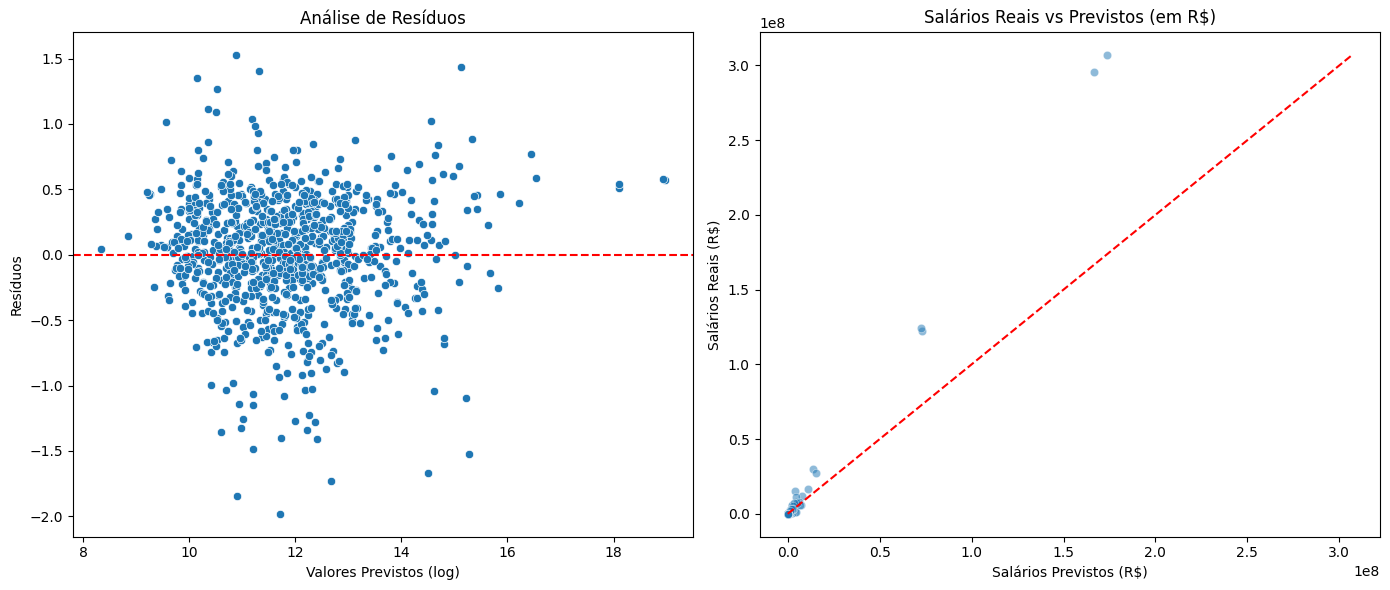


=== Análise por Região ===
         Região        R²  Coef_PIB  Coef_Formal  Coef_Interação  \
0       Sudeste  0.906652  0.980084     2.952190        0.000013   
1           Sul  0.904644  0.508651    -4.604550        0.629680   
2      Nordeste  0.893411  0.373917    -7.488781        0.757320   
4  Centro-Oeste  0.881977 -0.762979   -24.786757        2.223960   
3         Norte  0.879159 -1.978258   -44.471920        3.469676   

   N_Observações  
0           1699  
1           1590  
2            688  
4            410  
3            196  


In [111]:

def prepare_salary_data(df):
    """Prepara os dados para análise de salários com transformações e seleção de variáveis"""
    df = df.copy()

    # Transformações logarítmicas
    df['log_VrSalarios'] = np.log1p(df['VrSalarios'])
    df['log_Populacao'] = np.log1p(df['Populacao'])
    df['log_PIB'] = np.log1p(df['PIB'])
    df['log_QtEmpresas'] = np.log1p(df['QtEmpresas'])

    # Criar variáveis adicionais que podem ser relevantes
    df['Perc_Assalariados'] = df['PessoalAssalariado'] / df['PessoalOcupado']
    df['Salario_Medio'] = df['VrSalarios'] / df['PessoalAssalariado']

    # Criar interação entre PIB e percentual de assalariados
    df['interaction_PIB_Assal'] = df['log_PIB'] * df['Perc_Assalariados']

    # Remover infinitos e NaNs
    df = df.replace([np.inf, -np.inf], np.nan).dropna()

    return df

# Preparar os dados
df_salarios = prepare_salary_data(df_br)

# Selecionar variáveis reduzidas para evitar multicolinearidade
X = df_salarios[['log_PIB', 'Perc_Assalariados', 'interaction_PIB_Assal']]
y = df_salarios['log_VrSalarios']

# Verificar multicolinearidade
def check_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

print("=== Análise de Multicolinearidade ===")
print(check_vif(X))

# Dividir em treino e teste estratificado por região
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=df_salarios['Regiao']
)

# Modelo de regressão linear
modelo_salarios = LinearRegression()
modelo_salarios.fit(X_train, y_train)

# Previsões
y_pred = modelo_salarios.predict(X_test)

# Métricas de avaliação
print("\n=== Métricas do Modelo ===")
print(f"R²: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

# Coeficientes com interpretação percentual
coef_df = pd.DataFrame({
    'Variável': X.columns,
    'Coef_original': modelo_salarios.coef_,
    'Impacto_percentual': (np.exp(modelo_salarios.coef_) - 1)
})
print("\n=== Coeficientes do Modelo ===")
print(coef_df)

# Gráficos organizados em grid

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de resíduos
residuos = y_test - y_pred
sns.scatterplot(ax=axes[0], x=y_pred, y=residuos)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_xlabel('Valores Previstos (log)')
axes[0].set_ylabel('Resíduos')
axes[0].set_title('Análise de Resíduos')

# Gráfico de previsão vs real em escala original (R$)
sns.scatterplot(ax=axes[1], x=np.expm1(y_pred), y=np.expm1(y_test), alpha=0.5)
axes[1].plot([np.expm1(y_test).min(), np.expm1(y_test).max()],
              [np.expm1(y_test).min(), np.expm1(y_test).max()],
              'r--')
axes[1].set_xlabel('Salários Previstos (R$)')
axes[1].set_ylabel('Salários Reais (R$)')
axes[1].set_title('Salários Reais vs Previstos (em R$)')

plt.tight_layout()
plt.show()

# Análise por região
regioes = df_salarios['Regiao'].unique()
results = []

for regiao in regioes:
    mask = df_salarios['Regiao'] == regiao
    X_reg = X[mask]
    y_reg = y[mask]

    if len(X_reg) > 10:  # Apenas para regiões com dados suficientes
        modelo_reg = LinearRegression().fit(X_reg, y_reg)
        y_pred_reg = modelo_reg.predict(X_reg)

        results.append({
            'Região': regiao,
            'R²': r2_score(y_reg, y_pred_reg),
            'Coef_PIB': modelo_reg.coef_[0],
            'Coef_Formal': modelo_reg.coef_[1],
            'Coef_Interação': modelo_reg.coef_[2],
            'N_Observações': len(X_reg)
        })

results_df = pd.DataFrame(results)
print("\n=== Análise por Região ===")
print(results_df.sort_values('R²', ascending=False))



## Óbitos Infantis em função de condições socioeconômicas

Neste segmento da análise, o foco foi construir um modelo para investigar os fatores associados à taxa de óbitos infantis nos municípios brasileiros. A variável dependente utilizada foi a Taxa de Óbitos Infantis, definida como o número de óbitos infantis a cada mil nascimentos. Para garantir a integridade da métrica, foram tratados os casos em que o número de nascimentos era zero, atribuindo NaN para evitar divisões por zero.

As variáveis explicativas selecionadas refletem aspectos populacionais, econômicos e de infraestrutura local: População total, PIB, Valor total dos salários, Receitas municipais e uma variável categórica chamada povoamento, que distingue municípios urbanizados de áreas mais rurais.

Antes da modelagem, foi realizada uma etapa de limpeza para remover observações com valores ausentes ou infinitos, assegurando que o modelo fosse ajustado apenas com dados válidos. Com os dados limpos, foi estimado um modelo de regressão linear utilizando a biblioteca statsmodels, permitindo uma análise detalhada dos coeficientes, níveis de significância estatística e medidas de ajuste.

Por fim, foi gerado um gráfico de resíduos com suavização lowess, que permite visualizar possíveis padrões não explicados pelo modelo. Essa análise gráfica é essencial para avaliar a qualidade do ajuste e identificar violações de pressupostos, como não linearidade ou heterocedasticidade.

                            OLS Regression Results                            
Dep. Variable:     TaxaObitosInfantis   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     103.5
Date:                Wed, 04 Jun 2025   Prob (F-statistic):          2.24e-108
Time:                        20:44:42   Log-Likelihood:            -1.6408e+05
No. Observations:               22247   AIC:                         3.282e+05
Df Residuals:                   22241   BIC:                         3.282e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          18.8820      2.856      6.611      

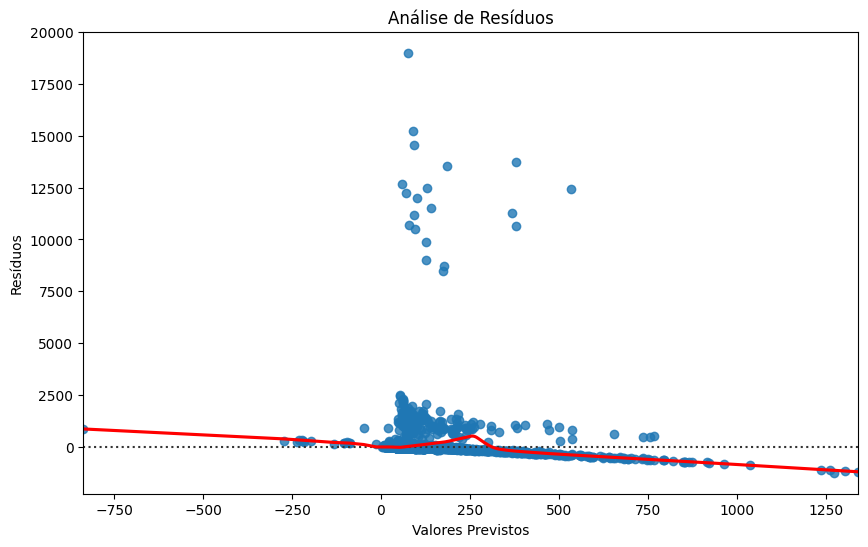

In [ ]:
# Criar taxa de óbitos infantis
# Certificar-se de que NrNascimentos não é zero para evitar divisão por zero
df_br['TaxaObitosInfantis'] = np.where(
    df_br['NrNascimentos'] != 0,
    df_br['NrObitosInfantis'] / df_br['NrNascimentos'] * 1000,
    np.nan # Coloca NaN onde a divisão seria por zero
)

X_cols = ['Populacao', 'PIB', 'VrSalarios', 'Receitas_R$', 'povoamento']
y_col = 'TaxaObitosInfantis'

# Selecionar as colunas relevantes
df_analysis = df_br[X_cols + [y_col]].copy()

# Remover linhas com NaN ou infinito nas colunas selecionadas para a análise
df_analysis = df_analysis.replace([np.inf, -np.inf], np.nan).dropna()

# Verificar se ainda há dados após a limpeza
if df_analysis.empty:
    print("Após a limpeza, não restam dados para a análise. Verifique os dados originais.")
else:
    X = df_analysis[X_cols]
    y = df_analysis[y_col]

    # Modelo com statsmodels para análise detalhada
    X = sm.add_constant(X)
    modelo_obitos = sm.OLS(y, X).fit()

    print(modelo_obitos.summary())

    # Visualizar resíduos
    plt.figure(figsize=(10,6))
    # Certificar-se de que os dados para o scatterplot não contêm NaNs ou infinitos
    predictions = modelo_obitos.predict(X)
    sns.residplot(x=predictions, y=y, lowess=True, line_kws={'color': 'red'})
    plt.xlabel('Valores Previstos')
    plt.ylabel('Resíduos')
    plt.title('Análise de Resíduos')
    plt.show()

## Número de empresas em função do PIB e salários

Antes de ajustar o modelo de regressão linear, foi realizada uma etapa cuidadosa de preparação dos dados. Inicialmente, foram selecionadas variáveis econômicas relevantes para explicar o número de empresas em um município, sendo elas: PIB, valor total de salários, número de pessoas ocupadas e receitas públicas. Como essas variáveis vieram do arquivo em formato texto (strings), foi necessário aplicar um processo de limpeza para transformá-las em valores numéricos válidos, eliminando pontos, vírgulas e outros símbolos. Após essa etapa, as variáveis foram transformadas com a função logarítmica log1p para lidar com escalas assimétricas e normalizar a distribuição dos dados, o que é uma prática comum para melhorar a qualidade dos ajustes em modelos lineares.

Em seguida, avaliou-se a presença de multicolinearidade entre as variáveis independentes utilizando o Fator de Inflação da Variância (VIF), uma métrica que identifica redundâncias entre os preditores e possíveis distorções nos coeficientes estimados. Após garantir a viabilidade das variáveis, foi ajustado um modelo de regressão linear múltipla, utilizando erros robustos (HC3) para controlar possíveis heterocedasticidades nos resíduos.

Por fim, foram gerados três gráficos fundamentais para o diagnóstico do modelo: o gráfico de resíduos versus valores ajustados, que permite verificar a presença de padrões sistemáticos (indicando violação da suposição de homocedasticidade), o QQ-plot dos resíduos, que avalia a aderência à normalidade, e a comparação entre os valores reais e previstos do número de empresas, em escala original, permitindo observar a qualidade preditiva do modelo de maneira mais intuitiva.



=== Análise de Multicolinearidade (VIF) ===
             Variable          VIF
1      log_VrSalarios  2543.715334
2  log_PessoalOcupado  1071.603496
0             log_PIB   994.851735
3     log_Receitas_R$   553.892249

=== Sumário do Modelo ===
                            OLS Regression Results                            
Dep. Variable:         log_QtEmpresas   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     3860.
Date:                Thu, 05 Jun 2025   Prob (F-statistic):               0.00
Time:                        05:42:03   Log-Likelihood:                -24332.
No. Observations:               22247   AIC:                         4.867e+04
Df Residuals:                   22242   BIC:                         4.871e+04
Df Model:                           4                                         
Covariance Type:                  HC3      

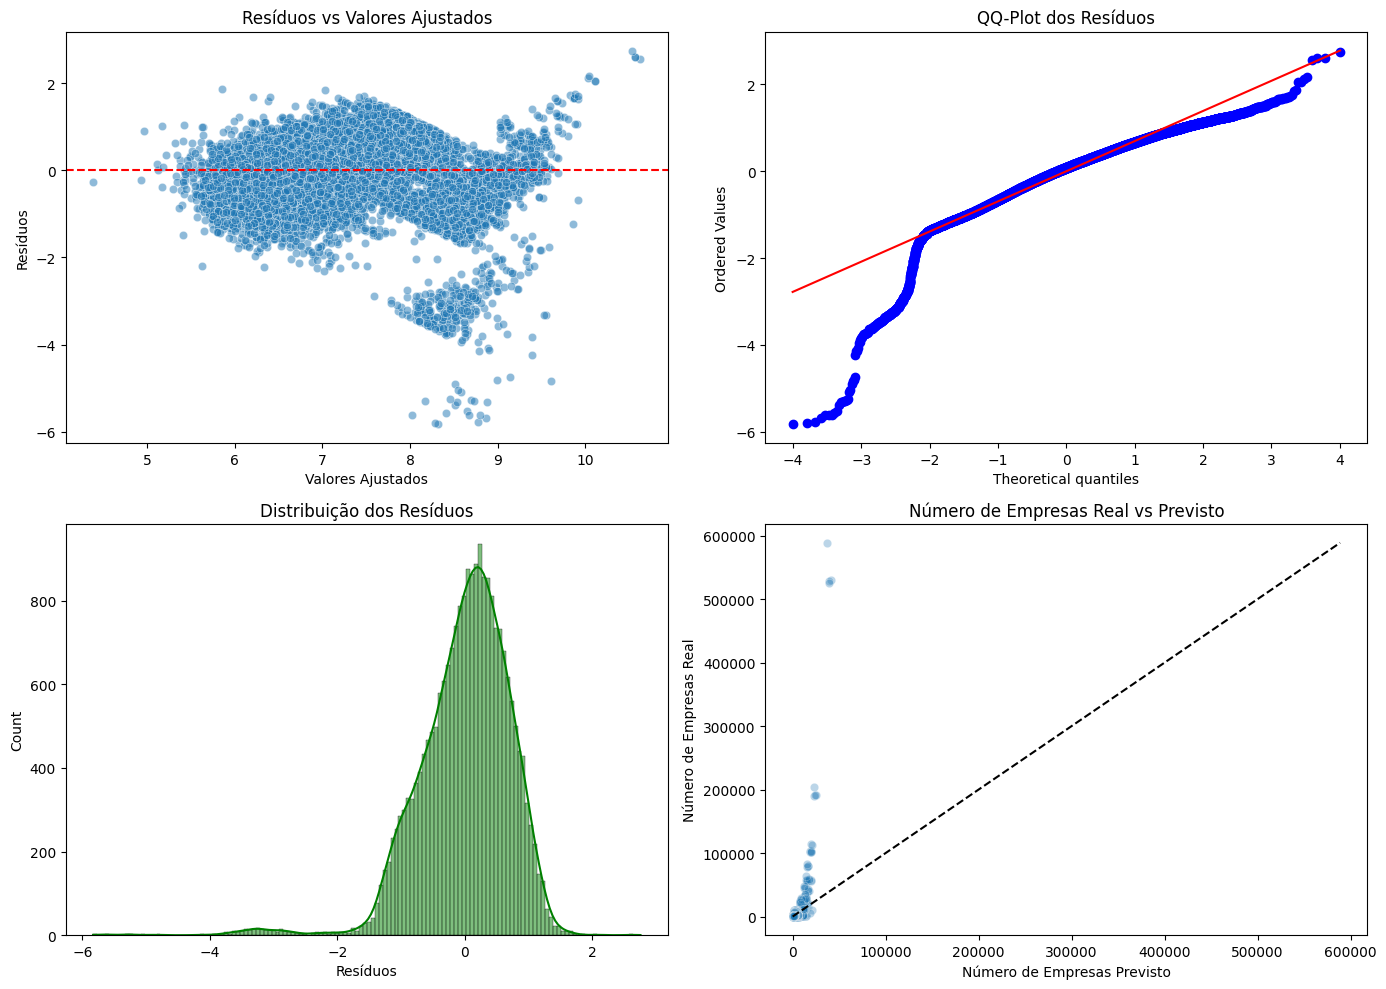

In [119]:
cols_to_clean = ['PIB', 'VrSalarios', 'PessoalOcupado', 'Receitas_R$', 'QtEmpresas']

# --- Função para calcular VIF ---
def check_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data.sort_values("VIF", ascending=False)

# --- Seleção das variáveis log-transformadas ---
features = ['log_PIB', 'log_VrSalarios', 'log_PessoalOcupado', 'log_Receitas_R$']
target = 'log_QtEmpresas'

X = df_br_clean[features]
y = df_br_clean[target]

# Verificar multicolinearidade
print("=== Análise de Multicolinearidade (VIF) ===")
print(check_vif(X))

# Adiciona intercepto para regressão
X = sm.add_constant(X)

# Ajustar modelo com erros robustos
modelo = sm.OLS(y, X).fit(cov_type='HC3')

print("\n=== Sumário do Modelo ===")
print(modelo.summary())

# --- Diagnóstico gráfico ---

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Resíduos vs Ajustados
sns.scatterplot(x=modelo.fittedvalues, y=modelo.resid, alpha=0.5, ax=axs[0, 0])
axs[0, 0].axhline(0, color='red', linestyle='--')
axs[0, 0].set_xlabel('Valores Ajustados')
axs[0, 0].set_ylabel('Resíduos')
axs[0, 0].set_title('Resíduos vs Valores Ajustados')

# QQ-plot dos resíduos
stats.probplot(modelo.resid, dist="norm", plot=axs[0, 1])
axs[0, 1].set_title('QQ-Plot dos Resíduos')

# Distribuição dos resíduos
sns.histplot(modelo.resid, kde=True, color='green', ax=axs[1, 0])
axs[1, 0].set_title('Distribuição dos Resíduos')
axs[1, 0].set_xlabel('Resíduos')

# Real vs Previsto (escala original)
sns.scatterplot(
    x=np.expm1(modelo.predict(X)),
    y=np.expm1(y),
    alpha=0.3,
    ax=axs[1, 1]
)
axs[1, 1].plot(
    [np.expm1(y).min(), np.expm1(y).max()],
    [np.expm1(y).min(), np.expm1(y).max()],
    'k--', label='Perfeita previsão'
)
axs[1, 1].set_xlabel('Número de Empresas Previsto')
axs[1, 1].set_ylabel('Número de Empresas Real')
axs[1, 1].set_title('Número de Empresas Real vs Previsto')

plt.tight_layout()
plt.show()


##Análise da Relação entre População e Número de Nascimentos nas Cidades Brasileiras por Meio de Regressão Linear

A presente análise tem como objetivo investigar se existe uma relação linear entre a população de um município e o número de nascimentos registrados. Intuitivamente, espera-se que cidades com maior população apresentem também um maior número de nascimentos, dado que há mais indivíduos em idade fértil.

Para isso, utilizaremos a técnica de Regressão Linear Simples, que permite modelar a relação entre uma variável independente — no caso, a População — e uma variável dependente — o Número de Nascimentos. Através deste modelo, poderemos responder questões como:

O número de nascimentos cresce proporcionalmente com a população?

Existem cidades que fogem deste padrão?

O modelo é suficientemente bom para fazer previsões?

Além disso, a análise do coeficiente de determinação (R²) nos permitirá avaliar o quão bem a população explica as variações no número de nascimentos.

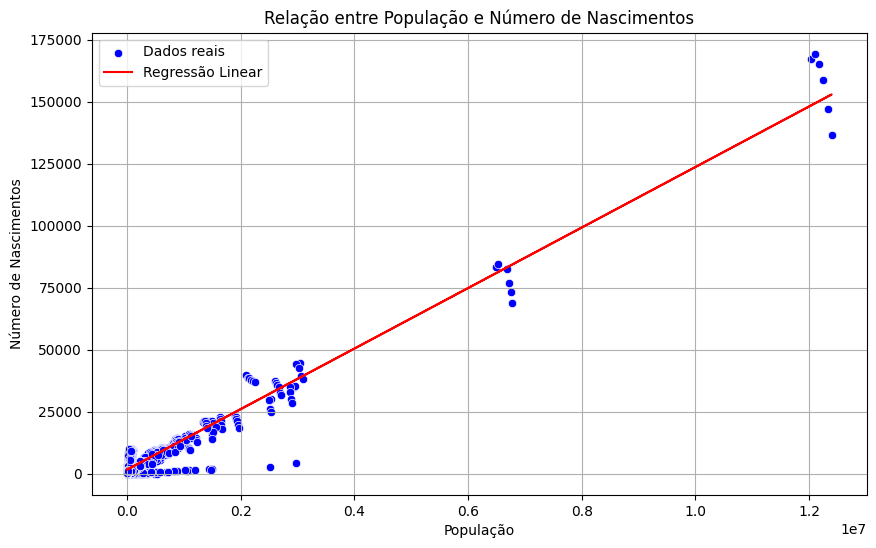

Equação da reta:
NrNascimentos = 0.0122 * Populacao + 1677.96
R² do modelo: 0.6689


In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Verificando os dados relevantes e removendo NaNs
df_br = df_br[['UF', 'Populacao', 'NrNascimentos']].dropna()

# Definindo variáveis
X = df_br[['Populacao']]  # Variável independente
y = df_br['NrNascimentos']  # Variável dependente

# Criando o modelo de regressão linear
model = LinearRegression()
model.fit(X, y)

# Pegando os coeficientes
coeficiente = model.coef_[0]  # Inclinação
intercepto = model.intercept_  # Intercepto

# Fazendo previsões
y_pred = model.predict(X)

# Avaliando o modelo
r2 = r2_score(y, y_pred)

# Plotando os dados e a linha de regressão
plt.figure(figsize=(10,6))
sns.scatterplot(x='Populacao', y='NrNascimentos', data=df_br, color='blue', label='Dados reais')
plt.plot(df_br['Populacao'], y_pred, color='red', label='Regressão Linear')
plt.title('Relação entre População e Número de Nascimentos')
plt.xlabel('População')
plt.ylabel('Número de Nascimentos')
plt.legend()
plt.grid(True)
plt.show()

# Exibindo os resultados
print('Equação da reta:')
print(f'NrNascimentos = {coeficiente:.4f} * Populacao + {intercepto:.2f}')
print(f'R² do modelo: {r2:.4f}')

Equação da Reta encontrada foi: NrNascimentos=0.0122×Populacao+1677.96

O coeficiente de determinação (R² = 0.669) indica que aproximadamente 66,9% da variação no número de nascimentos pode ser explicada pela variação na população. Isso evidencia uma tendência clara de que municípios com maior população tendem a apresentar maior número de nascimentos. Contudo, há outros fatores não contemplados por esse modelo que também influenciam esse fenômeno, como diferenças culturais, econômicas e demográficas entre as cidades.

<br>O gráfico de dispersão reforça visualmente essa tendência, embora a presença de alguns pontos discrepantes (outliers) sugira que o modelo linear, apesar de robusto, não captura totalmente a complexidade da relação em todas as regiões do país.

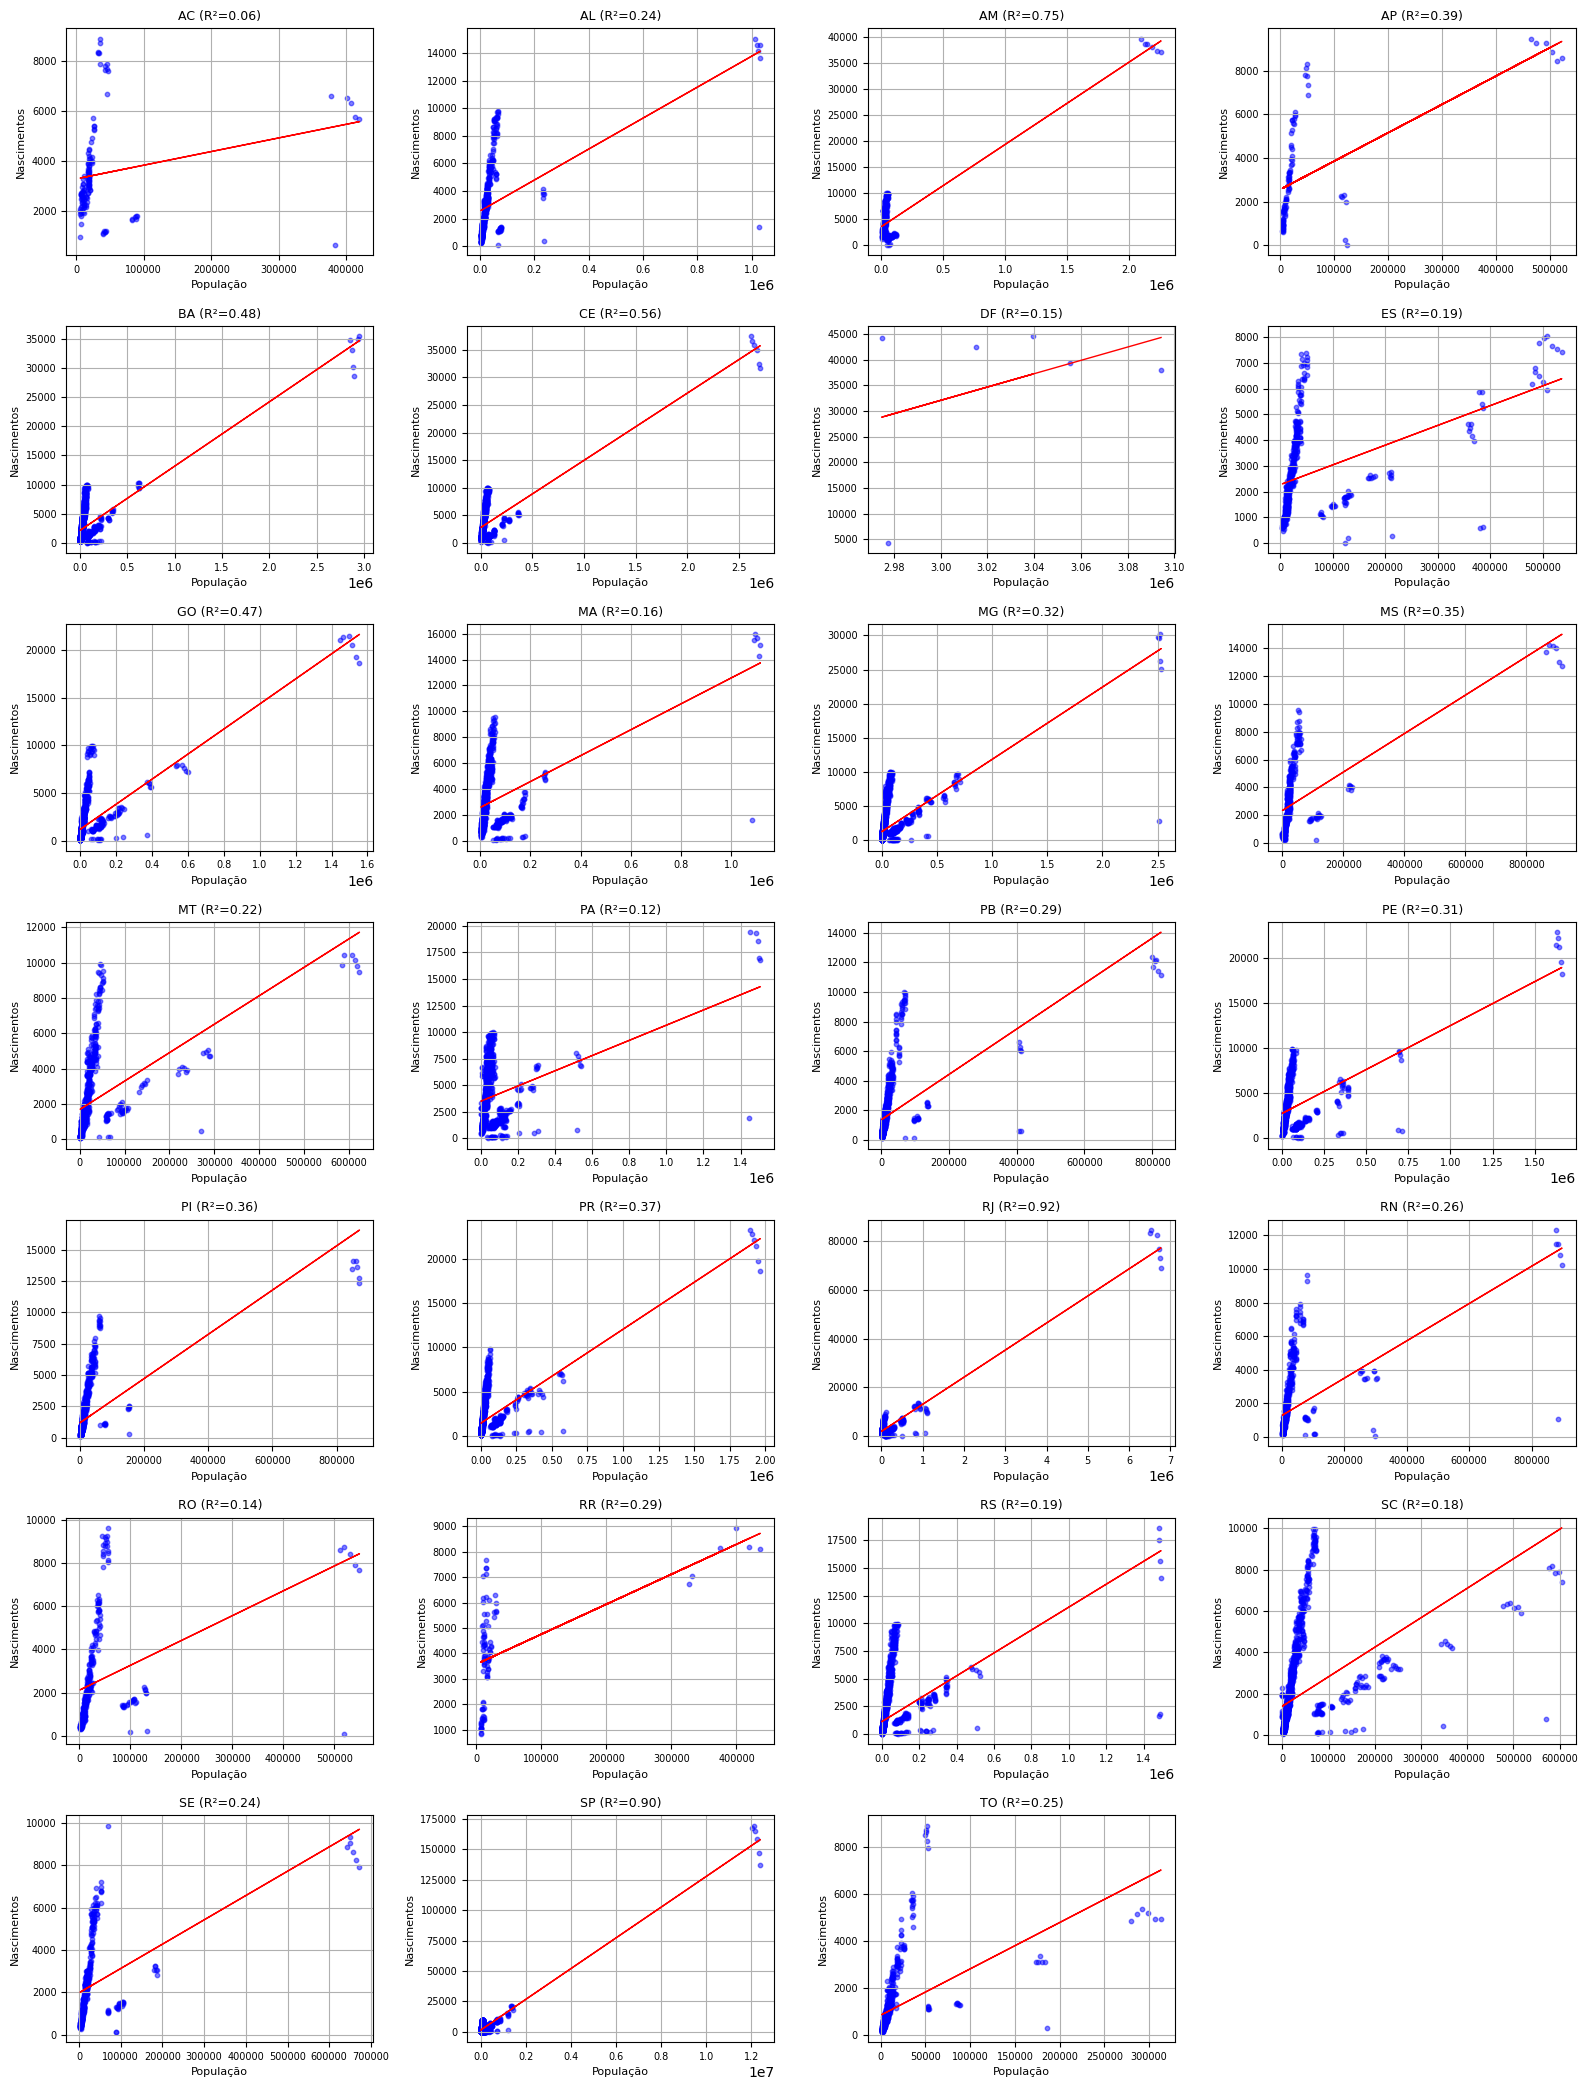

In [129]:
ufs = sorted(df_br['UF'].unique())

# Tamanho do grid
n_ufs = len(ufs)
n_cols = 4
n_rows = int(np.ceil(n_ufs / n_cols))

# Cria figura e eixos
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*3))
axs = axs.flatten()  # Facilita o acesso aos subplots com 1D

for i, uf in enumerate(ufs):
    df_uf = df_br[df_br['UF'] == uf]

    X_uf = df_uf[['Populacao']]
    y_uf = df_uf['NrNascimentos']

    ax = axs[i]  # Subplot correspondente

    if len(df_uf) < 5:
        ax.text(0.5, 0.5, f'Dados insuficientes\n({len(df_uf)} mun.)',
                ha='center', va='center', fontsize=8)
        ax.set_title(uf)
        ax.axis('off')
        continue

    model_uf = LinearRegression()
    model_uf.fit(X_uf, y_uf)
    y_pred_uf = model_uf.predict(X_uf)
    r2_uf = r2_score(y_uf, y_pred_uf)

    # Gráfico no subplot
    ax.scatter(df_uf['Populacao'], df_uf['NrNascimentos'], color='blue', alpha=0.5, s=10, label='Dados')
    ax.plot(df_uf['Populacao'], y_pred_uf, color='red', linewidth=1, label='Regressão')
    ax.set_title(f'{uf} (R²={r2_uf:.2f})', fontsize=9)
    ax.set_xlabel('População', fontsize=8)
    ax.set_ylabel('Nascimentos', fontsize=8)
    ax.tick_params(axis='both', labelsize=7)
    ax.grid(True)

# Esconde subplots extras, se houver
for j in range(i+1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

Após a visualização desses dados, utilizarei de alguns estados para análise a seguir:

O coeficiente de determinação R² indica quanto da variação no número de nascimentos pode ser explicada pela população do município. Ele varia entre 0 (nenhuma explicação) e 1 (explicação perfeita).

* Estados como o Rio de Janeiro (R² = 0.92) apresentam uma forte relação linear entre população e nascimentos. Isso sugere que, nos municípios fluminenses, o número de nascimentos cresce proporcionalmente com o tamanho da população — provavelmente por haver uma distribuição mais homogênea dos serviços de saúde e perfil demográfico.

* Já no Paraná (R² = 0.37), essa relação é mais fraca, o que pode indicar maior variabilidade em fatores que afetam os nascimentos — como estrutura etária, acesso a maternidade, políticas públicas, ou até migração interna.

* No Acre (R² = 0.06), praticamente não há relação linear entre população e número de nascimentos. Isso pode ocorrer em estados com pequena população, grande heterogeneidade entre municípios, ou dados inconsistentes (ex: subnotificação, dados administrativos irregulares).

<br>A análise mostra que a população é um bom preditor de nascimentos em alguns estados, mas não em todos. Portanto, modelos mais robustos ou com múltiplas variáveis (como idade média, renda, acesso à saúde) podem ser necessários para explicar melhor essa relação em estados com R² baixos.

##NrNascimentos em função de QtEmpresas e VlProducaoPecuaria

Nesta etapa da análise, foi investigada a relação entre o número de nascimentos em um município e variáveis econômicas locais. A variável dependente utilizada foi o número de nascimentos (NrNascimentos), e as variáveis explicativas escolhidas foram o número de empresas registradas (QtEmpresas) e o valor da produção pecuária (VlProducaoPecuaria), que representam aspectos da atividade econômica municipal. Após a seleção das colunas relevantes, foram removidas as observações com dados ausentes para garantir a consistência da análise. Em seguida, foi ajustado um modelo de regressão linear com intercepto, utilizando a biblioteca statsmodels. O modelo fornece estimativas dos coeficientes e medidas de ajuste, permitindo avaliar a influência das variáveis econômicas sobre os nascimentos. Para diagnosticar possíveis desvios dos pressupostos do modelo, foi gerado um gráfico de resíduos suavizado, útil para identificar padrões de heterocedasticidade ou não linearidade.

                            OLS Regression Results                            
Dep. Variable:          NrNascimentos   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                 2.600e+04
Date:                Wed, 04 Jun 2025   Prob (F-statistic):               0.00
Time:                        16:44:21   Log-Likelihood:            -3.0240e+05
No. Observations:               33420   AIC:                         6.048e+05
Df Residuals:                   33417   BIC:                         6.048e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1392.6725     12

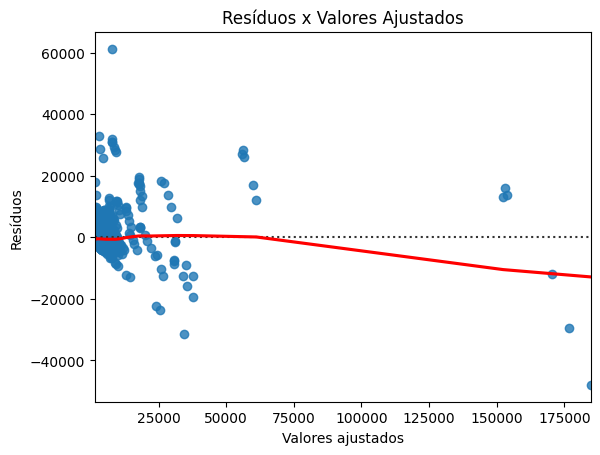

In [ ]:
# Selecionar as colunas relevantes
df = df_br[['NrNascimentos', 'QtEmpresas', 'VlProducaoPecuaria']]

# Remover linhas com valores ausentes
df = df.dropna()

# Definir variáveis independentes (X) e dependente (y)
X = df[['QtEmpresas', 'VlProducaoPecuaria']]
y = df['NrNascimentos']

# Adicionar constante (intercepto) ao modelo
X = sm.add_constant(X)

# Criar o modelo de regressão linear
modelo = sm.OLS(y, X).fit()

# Exibir o resumo dos resultados
print(modelo.summary())

# -------------------------------
# Plotar gráfico de resíduos
sns.residplot(x=modelo.fittedvalues, y=modelo.resid, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Valores ajustados')
plt.ylabel('Resíduos')
plt.title('Resíduos x Valores Ajustados')
plt.show()